# Import stuff

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import sklearn
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

# Without SMOTE

## Data Processing

### Import df

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Surjya Sir Work/RupturesDatasets/7 Signals/FinalRupturesDataset.csv')

### Optimise df

In [ ]:
df

Unnamed: 0  Video    Start      End  ValenceStart  ValenceEnd  \
0              0      1  2151027  2156027         5.236       6.932   
1              1      1  2156027  2161027         6.932       6.932   
2              2      1  2161027  2166027         6.932       6.942   
3              3      1  2166027  2171026         6.942       6.942   
4              4      1  2171026  2176026         6.942       6.946   
...          ...    ...      ...      ...           ...         ...   
7378        7378      8  2036136  2041136         1.405       1.384   
7379        7379      8  2041136  2046137         1.384       1.344   
7380        7380      8  2046137  2051136         1.344       1.462   
7381        7381      8  2051136  2056137         1.462       1.493   
7382        7382      8  2056137  2061137         1.493       1.689   

      ArousalStart  ArousalEnd  gsrStart  gsrEnd  ...  rspStart  rspEnd  \
0            4.997       4.850     8.962   8.851  ...    40.368  41.878   
1            4.850       4.850     8.851   9.041  ...    41.878  40.116   
2            4.850       4.982     9.041   8.895  ...    40.116  40.735   
3            4.982       4.983     8.895   8.891  ...    40.735  41.374   
4            4.983       5.001     8.891   8.769  ...    41.374  39.835   
...            ...         ...       ...     ...  ...       ...     ...   
7378         7.859       7.653    41.046  41.993  ...    44.530  44.162   
7379         7.653       7.462    41.993  41.212  ...    44.162  44.239   
7380         7.462       7.455    41.212  41.094  ...    44.239  45.633   
7381         7.455       7.511    41.094  41.563  ...    45.633  45.382   
7382         7.511       8.139    41.563  42.955  ...    45.382  46.417   

      emg_zygoStart  emg_zygoEnd  emg_coruStart  emg_coruEnd  emg_trapStart  \
0             6.837        7.617          5.974        6.385          6.837   
1             7.617        7.534          6.385        6.302          6.754   
2             7.534        7.699          6.302        6.179          6.754   
3             7.699        7.494          6.179        6.302          7.001   
4             7.494        7.288          6.302        6.385          7.042   
...             ...          ...            ...          ...            ...   
7378          5.645        5.030          6.179        6.302         13.982   
7379          5.030        5.276          6.302        6.549         13.120   
7380          5.276        4.906          6.549        7.699         11.108   
7381          4.906        4.865          7.699        6.549         20.224   
7382          4.865        4.906          6.549        6.549         15.461   

      emg_trapEnd  user  Probe  
0           6.754     6      0  
1           6.754     6      0  
2           7.001     6      0  
3           7.042     6      0  
4           6.713     6      0  
...           ...   ...    ...  
7378       13.120    27      0  
7379       11.108    27      0  
7380       20.224    27      0  
7381       15.461    27      0  
7382       15.543    27      1  

[7383 rows x 24 columns]

In [ ]:
df = df.drop(columns=["Unnamed: 0", "Start", "End", "ValenceStart",	"ValenceEnd", "ArousalStart", "ArousalEnd"], axis=1)
#df = df.drop(columns=["Unnamed: 0", "Start", "End"], axis=1)

In [ ]:
df

Video  gsrStart  gsrEnd  sktStart  sktEnd  bvpStart  bvpEnd  rspStart  \
0         1     8.962   8.851    27.935  27.920    37.795  38.754    40.368   
1         1     8.851   9.041    27.920  27.924    38.754  35.431    41.878   
2         1     9.041   8.895    27.924  27.896    35.431  35.393    40.116   
3         1     8.895   8.891    27.896  27.878    35.393  36.816    40.735   
4         1     8.891   8.769    27.878  27.861    36.816  37.436    41.374   
...     ...       ...     ...       ...     ...       ...     ...       ...   
7378      8    41.046  41.993    25.424  25.431    36.700  37.068    44.530   
7379      8    41.993  41.212    25.431  25.424    37.068  37.475    44.162   
7380      8    41.212  41.094    25.424  25.410    37.475  37.020    44.239   
7381      8    41.094  41.563    25.410  25.403    37.020  35.838    45.633   
7382      8    41.563  42.955    25.403  25.389    35.838  35.828    45.382   

      rspEnd  emg_zygoStart  emg_zygoEnd  emg_coruStart  emg_coruEnd  \
0     41.878          6.837        7.617          5.974        6.385   
1     40.116          7.617        7.534          6.385        6.302   
2     40.735          7.534        7.699          6.302        6.179   
3     41.374          7.699        7.494          6.179        6.302   
4     39.835          7.494        7.288          6.302        6.385   
...      ...            ...          ...            ...          ...   
7378  44.162          5.645        5.030          6.179        6.302   
7379  44.239          5.030        5.276          6.302        6.549   
7380  45.633          5.276        4.906          6.549        7.699   
7381  45.382          4.906        4.865          7.699        6.549   
7382  46.417          4.865        4.906          6.549        6.549   

      emg_trapStart  emg_trapEnd  user  Probe  
0             6.837        6.754     6      0  
1             6.754        6.754     6      0  
2             6.754        7.001     6      0  
3             7.001        7.042     6      0  
4             7.042        6.713     6      0  
...             ...          ...   ...    ...  
7378         13.982       13.120    27      0  
7379         13.120       11.108    27      0  
7380         11.108       20.224    27      0  
7381         20.224       15.461    27      0  
7382         15.461       15.543    27      1  

[7383 rows x 17 columns]

In [ ]:
df['valence_acc_video'] = 0
df['arousal_acc_video'] = 0

In [ ]:
df

Video  gsrStart  gsrEnd  sktStart  sktEnd  bvpStart  bvpEnd  rspStart  \
0         1     8.962   8.851    27.935  27.920    37.795  38.754    40.368   
1         1     8.851   9.041    27.920  27.924    38.754  35.431    41.878   
2         1     9.041   8.895    27.924  27.896    35.431  35.393    40.116   
3         1     8.895   8.891    27.896  27.878    35.393  36.816    40.735   
4         1     8.891   8.769    27.878  27.861    36.816  37.436    41.374   
...     ...       ...     ...       ...     ...       ...     ...       ...   
7378      8    41.046  41.993    25.424  25.431    36.700  37.068    44.530   
7379      8    41.993  41.212    25.431  25.424    37.068  37.475    44.162   
7380      8    41.212  41.094    25.424  25.410    37.475  37.020    44.239   
7381      8    41.094  41.563    25.410  25.403    37.020  35.838    45.633   
7382      8    41.563  42.955    25.403  25.389    35.838  35.828    45.382   

      rspEnd  emg_zygoStart  emg_zygoEnd  emg_coruStart  emg_coruEnd  \
0     41.878          6.837        7.617          5.974        6.385   
1     40.116          7.617        7.534          6.385        6.302   
2     40.735          7.534        7.699          6.302        6.179   
3     41.374          7.699        7.494          6.179        6.302   
4     39.835          7.494        7.288          6.302        6.385   
...      ...            ...          ...            ...          ...   
7378  44.162          5.645        5.030          6.179        6.302   
7379  44.239          5.030        5.276          6.302        6.549   
7380  45.633          5.276        4.906          6.549        7.699   
7381  45.382          4.906        4.865          7.699        6.549   
7382  46.417          4.865        4.906          6.549        6.549   

      emg_trapStart  emg_trapEnd  user  Probe  valence_acc_video  \
0             6.837        6.754     6      0                  0   
1             6.754        6.754     6      0                  0   
2             6.754        7.001     6      0                  0   
3             7.001        7.042     6      0                  0   
4             7.042        6.713     6      0                  0   
...             ...          ...   ...    ...                ...   
7378         13.982       13.120    27      0                  0   
7379         13.120       11.108    27      0                  0   
7380         11.108       20.224    27      0                  0   
7381         20.224       15.461    27      0                  0   
7382         15.461       15.543    27      1                  0   

      arousal_acc_video  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
7378                  0  
7379                  0  
7380                  0  
7381                  0  
7382                  0  

[7383 rows x 19 columns]

New encoding, 
Low - 0 
Med / High - 1

In [ ]:
def basedOnVideoValence(video):
    if int(video) == 1:
        return 1
    if int(video) == 2:
        return 1
    if int(video) == 3:
        return 0
    if int(video) == 4:
        return 0
    if int(video) == 5:
        return 1
    if int(video) == 6:
        return 1
    if int(video) == 7:
        return 0
    if int(video) == 8:
        return 0
    
def basedOnVideoArousal(video):
    if int(video) == 1:
        return 1
    if int(video) == 2:
        return 1
    if int(video) == 3:
        return 0
    if int(video) == 4:
        return 0
    if int(video) == 5:
        return 0
    if int(video) == 6:
        return 0
    if int(video) == 7:
        return 1
    if int(video) == 8:
        return 1

In [ ]:
df['valence_acc_video'] = df.apply(lambda row : basedOnVideoValence(row['Video']), axis = 1)
df['arousal_acc_video'] = df.apply(lambda row : basedOnVideoArousal(row['Video']), axis = 1)

In [ ]:
df

Video  gsrStart  gsrEnd  sktStart  sktEnd  bvpStart  bvpEnd  rspStart  \
0         1     8.962   8.851    27.935  27.920    37.795  38.754    40.368   
1         1     8.851   9.041    27.920  27.924    38.754  35.431    41.878   
2         1     9.041   8.895    27.924  27.896    35.431  35.393    40.116   
3         1     8.895   8.891    27.896  27.878    35.393  36.816    40.735   
4         1     8.891   8.769    27.878  27.861    36.816  37.436    41.374   
...     ...       ...     ...       ...     ...       ...     ...       ...   
7378      8    41.046  41.993    25.424  25.431    36.700  37.068    44.530   
7379      8    41.993  41.212    25.431  25.424    37.068  37.475    44.162   
7380      8    41.212  41.094    25.424  25.410    37.475  37.020    44.239   
7381      8    41.094  41.563    25.410  25.403    37.020  35.838    45.633   
7382      8    41.563  42.955    25.403  25.389    35.838  35.828    45.382   

      rspEnd  emg_zygoStart  emg_zygoEnd  emg_coruStart  emg_coruEnd  \
0     41.878          6.837        7.617          5.974        6.385   
1     40.116          7.617        7.534          6.385        6.302   
2     40.735          7.534        7.699          6.302        6.179   
3     41.374          7.699        7.494          6.179        6.302   
4     39.835          7.494        7.288          6.302        6.385   
...      ...            ...          ...            ...          ...   
7378  44.162          5.645        5.030          6.179        6.302   
7379  44.239          5.030        5.276          6.302        6.549   
7380  45.633          5.276        4.906          6.549        7.699   
7381  45.382          4.906        4.865          7.699        6.549   
7382  46.417          4.865        4.906          6.549        6.549   

      emg_trapStart  emg_trapEnd  user  Probe  valence_acc_video  \
0             6.837        6.754     6      0                  1   
1             6.754        6.754     6      0                  1   
2             6.754        7.001     6      0                  1   
3             7.001        7.042     6      0                  1   
4             7.042        6.713     6      0                  1   
...             ...          ...   ...    ...                ...   
7378         13.982       13.120    27      0                  0   
7379         13.120       11.108    27      0                  0   
7380         11.108       20.224    27      0                  0   
7381         20.224       15.461    27      0                  0   
7382         15.461       15.543    27      1                  0   

      arousal_acc_video  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
...                 ...  
7378                  1  
7379                  1  
7380                  1  
7381                  1  
7382                  1  

[7383 rows x 19 columns]

### X,y using leave 1 use rest

In [ ]:
X_train_all = []
y_train_all = []
X_test_all = []
y_test_all = []

In [ ]:
videos = [1,2,3,4,5,6,7,8]

In [ ]:
users = []
for i in range(1, 31):
  users.append(i)

print(users)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [ ]:
for testuser in users:
  X_train = pd.DataFrame()
  y_train = pd.DataFrame()
  X_test = pd.DataFrame()
  y_test = pd.DataFrame()
  df_new = df[df['user'] != testuser]
  for video in videos:
    df_selected = df_new[df_new['Video'] == video]
    y = df_selected['Probe']
    y = pd.DataFrame(y)
    X = df_selected.drop(columns=["Probe"], axis = 1)
    X_train = X_train.append(X, ignore_index=True)
    y_train = y_train.append(y, ignore_index=True)
  df_new = df[df['user'] == testuser]
  #print(df_new)
  for video in videos:
    df_selected = df_new[df_new['Video'] == video]
    y = df_selected['Probe']
    y = pd.DataFrame(y)
    X = df_selected.drop(columns=["Probe"], axis = 1)
    X_test = X_test.append(X, ignore_index=True)
    y_test = y_test.append(y, ignore_index=True)  
  X_train_all.append(X_train)
  y_train_all.append(y_train)
  X_test_all.append(X_test)
  y_test_all.append(y_test)

In [ ]:
print(len(X_train_all[29]['user'].unique()))

29


In [ ]:
new_X_train_all = []

for i in range(len(X_train_all)):
    df_temp = X_train_all[i]
    df_temp = df_temp.drop(columns=["user", 'Video'], axis = 1)
    new_X_train_all.append(df_temp)

X_train_all = new_X_train_all

new_X_test_all = []

for i in range(len(X_test_all)):
    df_temp = X_test_all[i]
    df_temp = df_temp.drop(columns=["user", 'Video'], axis = 1)
    new_X_test_all.append(df_temp)

X_test_all = new_X_test_all

In [ ]:
X_train_all[2]

gsrStart  gsrEnd  sktStart  sktEnd  bvpStart  bvpEnd  rspStart  rspEnd  \
0        8.962   8.851    27.935  27.920    37.795  38.754    40.368  41.878   
1        8.851   9.041    27.920  27.924    38.754  35.431    41.878  40.116   
2        9.041   8.895    27.924  27.896    35.431  35.393    40.116  40.735   
3        8.895   8.891    27.896  27.878    35.393  36.816    40.735  41.374   
4        8.891   8.769    27.878  27.861    36.816  37.436    41.374  39.835   
...        ...     ...       ...     ...       ...     ...       ...     ...   
7132    41.046  41.993    25.424  25.431    36.700  37.068    44.530  44.162   
7133    41.993  41.212    25.431  25.424    37.068  37.475    44.162  44.239   
7134    41.212  41.094    25.424  25.410    37.475  37.020    44.239  45.633   
7135    41.094  41.563    25.410  25.403    37.020  35.838    45.633  45.382   
7136    41.563  42.955    25.403  25.389    35.838  35.828    45.382  46.417   

      emg_zygoStart  emg_zygoEnd  emg_coruStart  emg_coruEnd  emg_trapStart  \
0             6.837        7.617          5.974        6.385          6.837   
1             7.617        7.534          6.385        6.302          6.754   
2             7.534        7.699          6.302        6.179          6.754   
3             7.699        7.494          6.179        6.302          7.001   
4             7.494        7.288          6.302        6.385          7.042   
...             ...          ...            ...          ...            ...   
7132          5.645        5.030          6.179        6.302         13.982   
7133          5.030        5.276          6.302        6.549         13.120   
7134          5.276        4.906          6.549        7.699         11.108   
7135          4.906        4.865          7.699        6.549         20.224   
7136          4.865        4.906          6.549        6.549         15.461   

      emg_trapEnd  valence_acc_video  arousal_acc_video  
0           6.754                  1                  1  
1           6.754                  1                  1  
2           7.001                  1                  1  
3           7.042                  1                  1  
4           6.713                  1                  1  
...           ...                ...                ...  
7132       13.120                  0                  1  
7133       11.108                  0                  1  
7134       20.224                  0                  1  
7135       15.461                  0                  1  
7136       15.543                  0                  1  

[7137 rows x 16 columns]

In [ ]:
y_test_all[7]

Probe
0        0
1        0
2        0
3        0
4        0
..     ...
238      1
239      0
240      0
241      0
242      0

[243 rows x 1 columns]

## Models

###RandomForest

#### Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
Accuracies = []
ROC_AUCs = []
F1s = []
Precisions = []
TPRs = []
FPRs = []

TPs = []
FPs = []
TNs = []
FNs = []


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.8744571208953857
Random Forest Accuracy = 0.9123505976095617
Random Forest Test time = 0.037836551666259766
(251,)
(251,)
___________________Random Forest Stats _____________________
Accuracy: 0.912351
[[228   0]
 [ 22   1]]
True negatives: 228
True positives: 1
False positives: 0
False negatives: 22
ROC AUC: 0.521739
F1 Score: 0.083333
Precision: 1.000000
TPR: 0.043478
FPR: 0.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.8800406455993652
Random Forest Accuracy = 0.8367346938775511
Random Forest Test time = 0.032483577728271484
(245,)
(245,)
___________________Random Forest Stats _____________________
Accuracy: 0.836735
[[200  20]
 [ 20   5]]
True negatives: 200
True positives: 5
False positives: 20
False negatives: 20
ROC AUC: 0.554545
F1 Score: 0.200000
Precision: 0.200000
TPR: 0.200000
FPR: 0.090909
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.8357388973236084
Random Forest Accuracy = 0.8617886178861789
Random Forest Test time = 0.036215782165527344
(246,)
(246,)
___________________Random Forest Stats _____________________
Accuracy: 0.861789
[[212  10]
 [ 24   0]]
True negatives: 212
True positives: 0
False positives: 10
False negatives: 24
ROC AUC: 0.477477
F1 Score: 0.000000
Precision: 0.000000
TPR: 0.000000
FPR: 0.045045
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.963012456893921
Random Forest Accuracy = 0.8765432098765432
Random Forest Test time = 0.03793168067932129
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.876543
[[210   4]
 [ 26   3]]
True negatives: 210
True positives: 3
False positives: 4
False negatives: 26
ROC AUC: 0.542378
F1 Score: 0.166667
Precision: 0.428571
TPR: 0.103448
FPR: 0.018692
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.8928005695343018
Random Forest Accuracy = 0.8955823293172691
Random Forest Test time = 0.03754138946533203
(249,)
(249,)
___________________Random Forest Stats _____________________
Accuracy: 0.895582
[[222   2]
 [ 24   1]]
True negatives: 222
True positives: 1
False positives: 2
False negatives: 24
ROC AUC: 0.515536
F1 Score: 0.071429
Precision: 0.333333
TPR: 0.040000
FPR: 0.008929
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.9098217487335205
Random Forest Accuracy = 0.9385245901639344
Random Forest Test time = 0.03809857368469238
(244,)
(244,)
___________________Random Forest Stats _____________________
Accuracy: 0.938525
[[225   1]
 [ 14   4]]
True negatives: 225
True positives: 4
False positives: 1
False negatives: 14
ROC AUC: 0.608899
F1 Score: 0.347826
Precision: 0.800000
TPR: 0.222222
FPR: 0.004425
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.9599156379699707
Random Forest Accuracy = 0.7886178861788617
Random Forest Test time = 0.032896995544433594
(246,)
(246,)
___________________Random Forest Stats _____________________
Accuracy: 0.788618
[[183  35]
 [ 17  11]]
True negatives: 183
True positives: 11
False positives: 35
False negatives: 17
ROC AUC: 0.616153
F1 Score: 0.297297
Precision: 0.239130
TPR: 0.392857
FPR: 0.160550
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.881917953491211
Random Forest Accuracy = 0.9053497942386831
Random Forest Test time = 0.03595304489135742
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.905350
[[218   0]
 [ 23   2]]
True negatives: 218
True positives: 2
False positives: 0
False negatives: 23
ROC AUC: 0.540000
F1 Score: 0.148148
Precision: 1.000000
TPR: 0.080000
FPR: 0.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.8888373374938965
Random Forest Accuracy = 0.8975409836065574
Random Forest Test time = 0.04799771308898926
(244,)
(244,)
___________________Random Forest Stats _____________________
Accuracy: 0.897541
[[217   2]
 [ 23   2]]
True negatives: 217
True positives: 2
False positives: 2
False negatives: 23
ROC AUC: 0.535434
F1 Score: 0.137931
Precision: 0.500000
TPR: 0.080000
FPR: 0.009132
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.868762493133545
Random Forest Accuracy = 0.9016393442622951
Random Forest Test time = 0.0361325740814209
(244,)
(244,)
___________________Random Forest Stats _____________________
Accuracy: 0.901639
[[219   1]
 [ 23   1]]
True negatives: 219
True positives: 1
False positives: 1
False negatives: 23
ROC AUC: 0.518561
F1 Score: 0.076923
Precision: 0.500000
TPR: 0.041667
FPR: 0.004545
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.878464460372925
Random Forest Accuracy = 0.9
Random Forest Test time = 0.03780817985534668
(250,)
(250,)
___________________Random Forest Stats _____________________
Accuracy: 0.900000
[[223   2]
 [ 23   2]]
True negatives: 223
True positives: 2
False positives: 2
False negatives: 23
ROC AUC: 0.535556
F1 Score: 0.137931
Precision: 0.500000
TPR: 0.080000
FPR: 0.008889
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.799943447113037
Random Forest Accuracy = 0.8847736625514403
Random Forest Test time = 0.04429745674133301
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.884774
[[215   0]
 [ 28   0]]
True negatives: 215
True positives: 0
False positives: 0
False negatives: 28
ROC AUC: 0.500000
F1 Score: 0.000000
Precision: nan
TPR: 0.000000
FPR: 0.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.883587121963501
Random Forest Accuracy = 0.8804780876494024
Random Forest Test time = 0.03881239891052246
(251,)
(251,)
___________________Random Forest Stats _____________________
Accuracy: 0.880478
[[221   2]
 [ 28   0]]
True negatives: 221
True positives: 0
False positives: 2
False negatives: 28
ROC AUC: 0.495516
F1 Score: 0.000000
Precision: 0.000000
TPR: 0.000000
FPR: 0.008969
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.8787269592285156
Random Forest Accuracy = 0.9053497942386831
Random Forest Test time = 0.03802037239074707
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.905350
[[217   1]
 [ 22   3]]
True negatives: 217
True positives: 3
False positives: 1
False negatives: 22
ROC AUC: 0.557706
F1 Score: 0.206897
Precision: 0.750000
TPR: 0.120000
FPR: 0.004587
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.8938686847686768
Random Forest Accuracy = 0.900398406374502
Random Forest Test time = 0.038782358169555664
(251,)
(251,)
___________________Random Forest Stats _____________________
Accuracy: 0.900398
[[222   0]
 [ 25   4]]
True negatives: 222
True positives: 4
False positives: 0
False negatives: 25
ROC AUC: 0.568966
F1 Score: 0.242424
Precision: 1.000000
TPR: 0.137931
FPR: 0.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.8774054050445557
Random Forest Accuracy = 0.8765432098765432
Random Forest Test time = 0.03910064697265625
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.876543
[[213   0]
 [ 30   0]]
True negatives: 213
True positives: 0
False positives: 0
False negatives: 30
ROC AUC: 0.500000
F1 Score: 0.000000
Precision: nan
TPR: 0.000000
FPR: 0.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.8883659839630127
Random Forest Accuracy = 0.8884462151394422
Random Forest Test time = 0.035746097564697266
(251,)
(251,)
___________________Random Forest Stats _____________________
Accuracy: 0.888446
[[222   0]
 [ 28   1]]
True negatives: 222
True positives: 1
False positives: 0
False negatives: 28
ROC AUC: 0.517241
F1 Score: 0.066667
Precision: 1.000000
TPR: 0.034483
FPR: 0.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 3.482912302017212
Random Forest Accuracy = 0.8975409836065574
Random Forest Test time = 0.03497195243835449
(244,)
(244,)
___________________Random Forest Stats _____________________
Accuracy: 0.897541
[[216   0]
 [ 25   3]]
True negatives: 216
True positives: 3
False positives: 0
False negatives: 25
ROC AUC: 0.553571
F1 Score: 0.193548
Precision: 1.000000
TPR: 0.107143
FPR: 0.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.880424976348877
Random Forest Accuracy = 0.8764940239043825
Random Forest Test time = 0.03686094284057617
(251,)
(251,)
___________________Random Forest Stats _____________________
Accuracy: 0.876494
[[220   3]
 [ 28   0]]
True negatives: 220
True positives: 0
False positives: 3
False negatives: 28
ROC AUC: 0.493274
F1 Score: 0.000000
Precision: 0.000000
TPR: 0.000000
FPR: 0.013453
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.955515146255493
Random Forest Accuracy = 0.897119341563786
Random Forest Test time = 0.03738260269165039
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.897119
[[216   0]
 [ 25   2]]
True negatives: 216
True positives: 2
False positives: 0
False negatives: 25
ROC AUC: 0.537037
F1 Score: 0.137931
Precision: 1.000000
TPR: 0.074074
FPR: 0.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.9118494987487793
Random Forest Accuracy = 0.896414342629482
Random Forest Test time = 0.0325777530670166
(251,)
(251,)
___________________Random Forest Stats _____________________
Accuracy: 0.896414
[[223   1]
 [ 25   2]]
True negatives: 223
True positives: 2
False positives: 1
False negatives: 25
ROC AUC: 0.534805
F1 Score: 0.133333
Precision: 0.666667
TPR: 0.074074
FPR: 0.004464
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.882150650024414
Random Forest Accuracy = 0.9094650205761317
Random Forest Test time = 0.035073280334472656
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.909465
[[221   1]
 [ 21   0]]
True negatives: 221
True positives: 0
False positives: 1
False negatives: 21
ROC AUC: 0.497748
F1 Score: 0.000000
Precision: 0.000000
TPR: 0.000000
FPR: 0.004505
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.873631477355957
Random Forest Accuracy = 0.892
Random Forest Test time = 0.03627276420593262
(250,)
(250,)
___________________Random Forest Stats _____________________
Accuracy: 0.892000
[[222   0]
 [ 27   1]]
True negatives: 222
True positives: 1
False positives: 0
False negatives: 27
ROC AUC: 0.517857
F1 Score: 0.068966
Precision: 1.000000
TPR: 0.035714
FPR: 0.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.9174842834472656
Random Forest Accuracy = 0.896414342629482
Random Forest Test time = 0.036351680755615234
(251,)
(251,)
___________________Random Forest Stats _____________________
Accuracy: 0.896414
[[224   0]
 [ 26   1]]
True negatives: 224
True positives: 1
False positives: 0
False negatives: 26
ROC AUC: 0.518519
F1 Score: 0.071429
Precision: 1.000000
TPR: 0.037037
FPR: 0.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.867095470428467
Random Forest Accuracy = 0.8806584362139918
Random Forest Test time = 0.03772544860839844
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.880658
[[213   0]
 [ 29   1]]
True negatives: 213
True positives: 1
False positives: 0
False negatives: 29
ROC AUC: 0.516667
F1 Score: 0.064516
Precision: 1.000000
TPR: 0.033333
FPR: 0.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.8147976398468018
Random Forest Accuracy = 0.9300411522633745
Random Forest Test time = 0.0359342098236084
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.930041
[[212   4]
 [ 13  14]]
True negatives: 212
True positives: 14
False positives: 4
False negatives: 13
ROC AUC: 0.750000
F1 Score: 0.622222
Precision: 0.777778
TPR: 0.518519
FPR: 0.018519
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.9244728088378906
Random Forest Accuracy = 0.8775510204081632
Random Forest Test time = 0.0364534854888916
(245,)
(245,)
___________________Random Forest Stats _____________________
Accuracy: 0.877551
[[214   0]
 [ 30   1]]
True negatives: 214
True positives: 1
False positives: 0
False negatives: 30
ROC AUC: 0.516129
F1 Score: 0.062500
Precision: 1.000000
TPR: 0.032258
FPR: 0.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.8685076236724854
Random Forest Accuracy = 0.8852459016393442
Random Forest Test time = 0.036611318588256836
(244,)
(244,)
___________________Random Forest Stats _____________________
Accuracy: 0.885246
[[216   0]
 [ 28   0]]
True negatives: 216
True positives: 0
False positives: 0
False negatives: 28
ROC AUC: 0.500000
F1 Score: 0.000000
Precision: nan
TPR: 0.000000
FPR: 0.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y w

Random Forest Train time = 2.8868119716644287
Random Forest Accuracy = 0.8930041152263375
Random Forest Test time = 0.03447270393371582
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.893004
[[214   0]
 [ 26   3]]
True negatives: 214
True positives: 3
False positives: 0
False negatives: 26
ROC AUC: 0.551724
F1 Score: 0.187500
Precision: 1.000000
TPR: 0.103448
FPR: 0.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 2.92524790763855
Random Forest Accuracy = 0.8489795918367347
Random Forest Test time = 0.03703761100769043
(245,)
(245,)
___________________Random Forest Stats _____________________
Accuracy: 0.848980
[[202  16]
 [ 21   6]]
True negatives: 202
True positives: 6
False positives: 16
False negatives: 21
ROC AUC: 0.574414
F1 Score: 0.244898
Precision: 0.272727
TPR: 0.222222
FPR: 0.073394
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


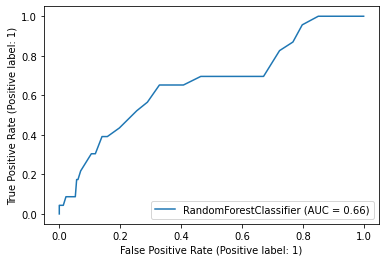

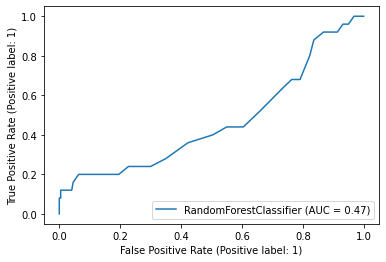

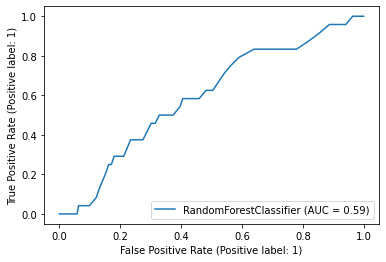

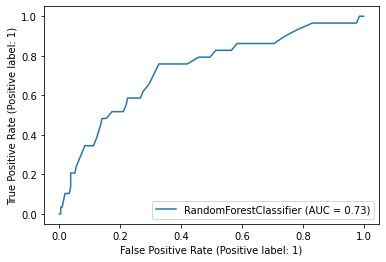

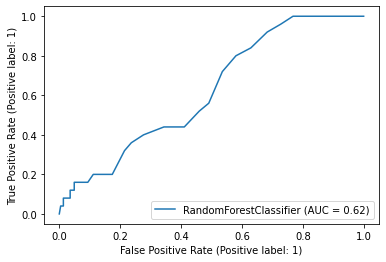

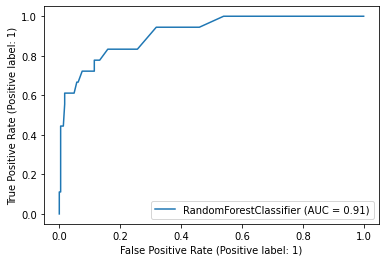

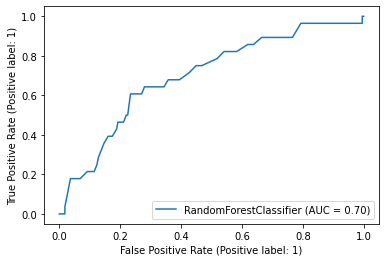

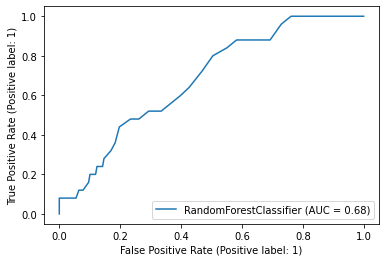

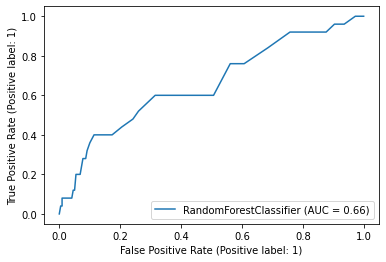

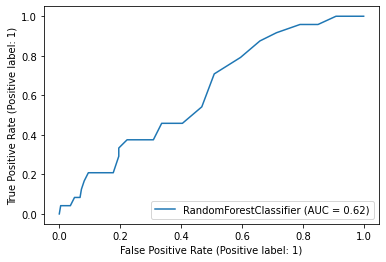

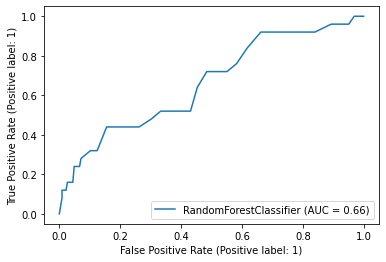

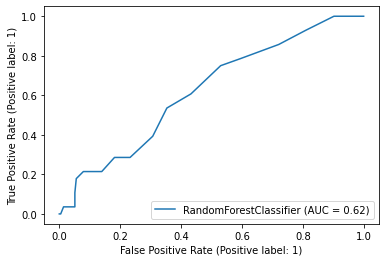

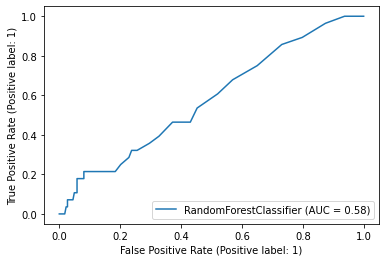

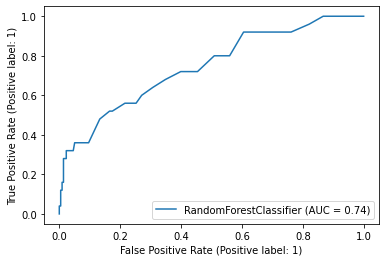

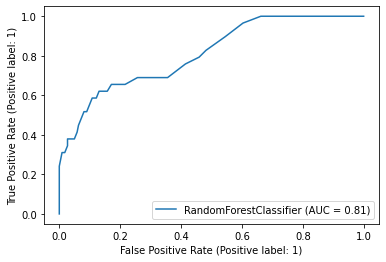

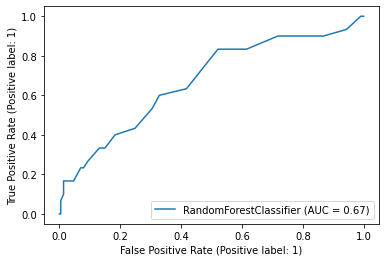

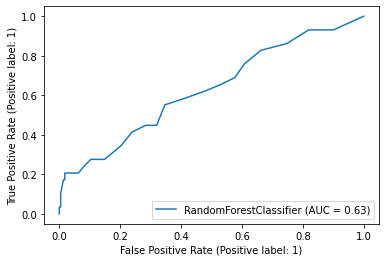

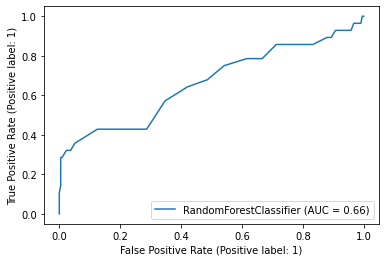

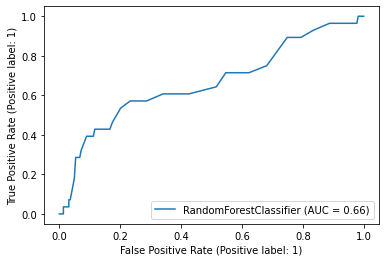

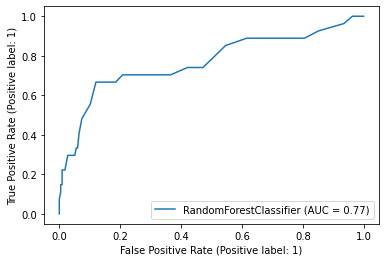

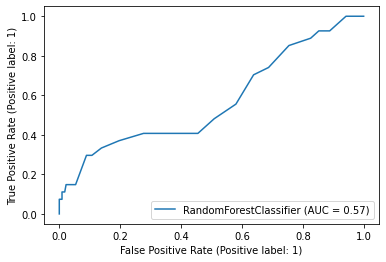

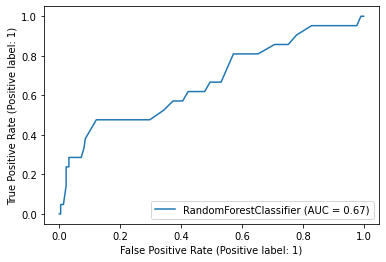

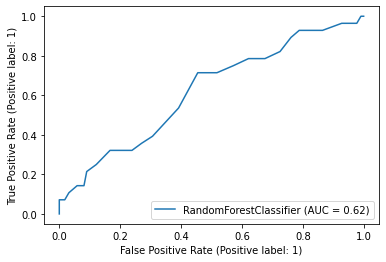

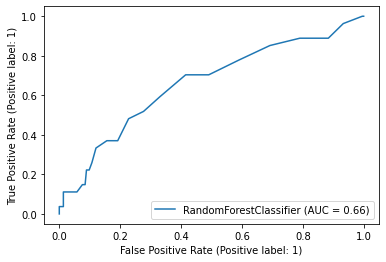

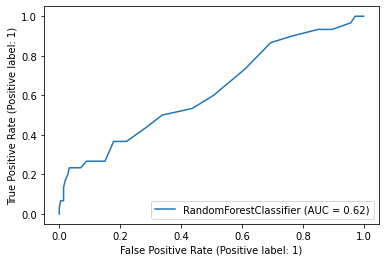

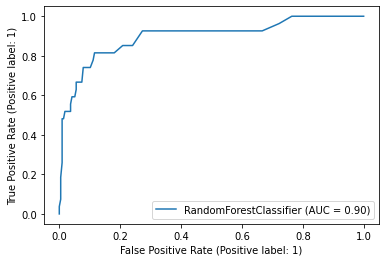

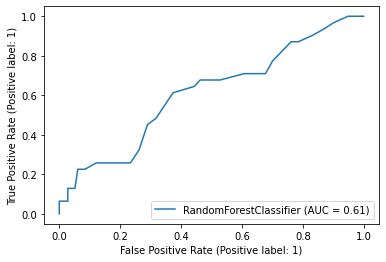

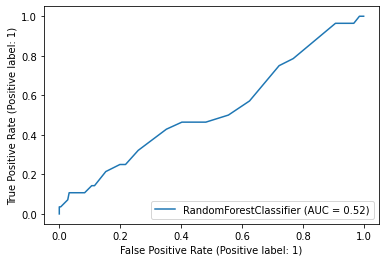

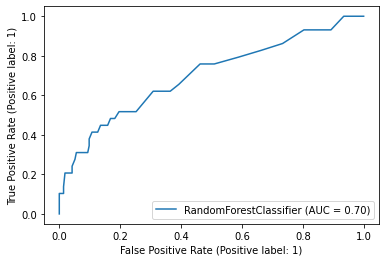

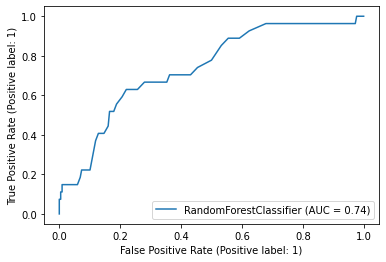

In [ ]:
for i in range(len(X_train_all)):
    X_train = X_train_all[i]
    y_train = y_train_all[i]
    X_test = X_test_all[i]
    y_test = y_test_all[i]
    model_rf = RandomForestClassifier() 
    tic = time.time()
    model_rf.fit(X_train, y_train) 
    toc = time.time()
    print("Random Forest Train time = " + str(toc-tic))
    print("Random Forest Accuracy = "+ str(model_rf.score(X_test, y_test)))
    tic = time.time()
    yhat_probs = model_rf.predict(X_test)
    yhat_classes = (model_rf.predict(X_test) > 0.5).astype("int32")
    toc = time.time()
    print("Random Forest Test time = " + str(toc-tic))
    print(yhat_probs.shape)
    print(yhat_classes.shape)

    print("___________________Random Forest Stats _____________________")

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat_classes)
    print('Accuracy: %f' % accuracy)

    Accuracies.append(accuracy)

    # confusion matrix
    CM = confusion_matrix(y_test, yhat_classes)
    print(CM)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    print('True negatives: %d' % TN)
    print('True positives: %d' % TP)
    print('False positives: %d' % FP)
    print('False negatives: %d' % FN)

    TPs.append(TP)
    FPs.append(FP)
    TNs.append(TN)
    FNs.append(FN)

    # ROC AUC
    auc = roc_auc_score(y_test, yhat_probs)
    print('ROC AUC: %f' % auc)

    ROC_AUCs.append(auc)

    #F1 score
    F1 = (2*TP / (2*TP + FP + FN))
    print('F1 Score: %f' % F1)

    F1s.append(F1)

    # precision tp / (tp + fp)
    precision = TP / (TP + FP)
    print('Precision: %f' % precision)

    Precisions.append(precision)

    # TPR
    tpr = (TP)/(TP + FN)
    print('TPR: %f' % tpr)

    TPRs.append(tpr)

    #FPR
    fpr = (FP)/(FP + TN)
    print('FPR: %f' % fpr)

    FPRs.append(fpr)

    #AUC
    from sklearn.metrics import plot_roc_curve
    plot_roc_curve(model_rf, X_test, y_test)

    print("____________________________________________________________")
    print("____________________________________________________________")

#### Results

74


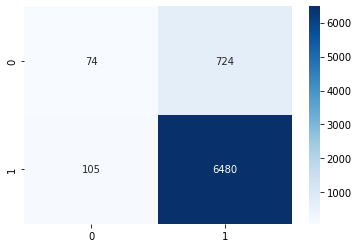

In [ ]:
import seaborn as sns

TPsum = np.sum(TPs)
TNsum = np.sum(TNs)
FPsum = np.sum(FPs)
FNsum = np.sum(FNs)

print(TPsum)

cm_data = [[TPsum, FNsum], [FPsum, TNsum]]
sns.heatmap(cm_data, annot=True, cmap='Blues', fmt='d')

In [ ]:
data = []

for i in range(len(Accuracies)):
  data.append([users[i], Accuracies[i], ROC_AUCs[i], F1s[i], Precisions[i], TPRs[i], FPRs[i], TPs[i], TNs[i], FPs[i], FNs[i]])

In [ ]:
print(len(data[0]))

11


In [ ]:
RFWithoutSMOTE = pd.DataFrame(data, columns=['User Left Out', 'Accuracy', 'ROC_AUC', 'F1', 'Precision', 'TPR', 'FPR', 'TP', 'TN', 'FP', 'FN'])

In [ ]:
df_temp = pd.DataFrame([RFWithoutSMOTE.mean(axis=0).values],  columns=['User Left Out', 'Accuracy', 'ROC_AUC', 'F1', 'Precision', 'TPR', 'FPR', 'TP', 'TN', 'FP', 'FN'], index=['Average'])

In [ ]:
print(df_temp)

         User Left Out  Accuracy   ROC_AUC        F1  Precision       TPR  \
Average           15.5   0.88772  0.538915  0.132344   0.628452  0.093797   

              FPR        TP     TN   FP         FN  
Average  0.015967  2.466667  216.0  3.5  24.133333  


In [ ]:
RFWithoutSMOTE = RFWithoutSMOTE.append(df_temp)

In [ ]:
print(RFWithoutSMOTE)
RFWithoutSMOTE.to_csv('/content/drive/MyDrive/Surjya Sir Work/RupturesResults/RFWithoutSMOTE.csv', index = True)

         User Left Out  Accuracy   ROC_AUC        F1  Precision       TPR  \
0                  1.0  0.912351  0.521739  0.083333   1.000000  0.043478   
1                  2.0  0.836735  0.554545  0.200000   0.200000  0.200000   
2                  3.0  0.861789  0.477477  0.000000   0.000000  0.000000   
3                  4.0  0.876543  0.542378  0.166667   0.428571  0.103448   
4                  5.0  0.895582  0.515536  0.071429   0.333333  0.040000   
5                  6.0  0.938525  0.608899  0.347826   0.800000  0.222222   
6                  7.0  0.788618  0.616153  0.297297   0.239130  0.392857   
7                  8.0  0.905350  0.540000  0.148148   1.000000  0.080000   
8                  9.0  0.897541  0.535434  0.137931   0.500000  0.080000   
9                 10.0  0.901639  0.518561  0.076923   0.500000  0.041667   
10                11.0  0.900000  0.535556  0.137931   0.500000  0.080000   
11                12.0  0.884774  0.500000  0.000000        NaN  0.000000   

###Descision Tree

####Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
Accuracies = []
ROC_AUCs = []
F1s = []
Precisions = []
TPRs = []
FPRs = []


TPs = []
FPs = []
TNs = []
FNs = []

Decision Tree Train time = 0.17027735710144043
Decision Tree Accuracy = 0.6693227091633466
Decision Tree Test time = 0.006122112274169922
(251,)
(251,)
___________________Decision Tree Stats _____________________
Accuracy: 0.669323
[[163  65]
 [ 18   5]]
True negatives: 163
True positives: 5
False positives: 65
False negatives: 18
ROC AUC: 0.466152
F1 Score: 0.107527
Precision: 0.071429
TPR: 0.217391
FPR: 0.285088
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.19141507148742676
Decision Tree Accuracy = 0.49795918367346936
Decision Tree Test time = 0.0036568641662597656
(245,)
(245,)
___________________Decision Tree Stats _____________________
Accuracy: 0.497959
[[108 112]
 [ 11  14]]
True negatives: 108
True positives: 14
False positives: 112
False negatives: 11
ROC AUC: 0.525455
F1 Score: 0.185430
Precision: 0.111111
TPR: 0.560000
FPR: 0.509091
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.18827438354492188
Decision Tree Accuracy = 0.7195121951219512
Decision Tree Test time = 0.0030875205993652344
(246,)
(246,)
___________________Decision Tree Stats _____________________
Accuracy: 0.719512
[[173  49]
 [ 20   4]]
True negatives: 173
True positives: 4
False positives: 49
False negatives: 20
ROC AUC: 0.472973
F1 Score: 0.103896
Precision: 0.075472
TPR: 0.166667
FPR: 0.220721
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.1927814483642578
Decision Tree Accuracy = 0.6790123456790124
Decision Tree Test time = 0.003838062286376953
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.679012
[[155  59]
 [ 19  10]]
True negatives: 155
True positives: 10
False positives: 59
False negatives: 19
ROC AUC: 0.534563
F1 Score: 0.204082
Precision: 0.144928
TPR: 0.344828
FPR: 0.275701
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.19035935401916504
Decision Tree Accuracy = 0.6867469879518072
Decision Tree Test time = 0.0037550926208496094
(249,)
(249,)
___________________Decision Tree Stats _____________________
Accuracy: 0.686747
[[165  59]
 [ 19   6]]
True negatives: 165
True positives: 6
False positives: 59
False negatives: 19
ROC AUC: 0.488304
F1 Score: 0.133333
Precision: 0.092308
TPR: 0.240000
FPR: 0.263393
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.18304443359375
Decision Tree Accuracy = 0.6434426229508197
Decision Tree Test time = 0.0050601959228515625
(244,)
(244,)
___________________Decision Tree Stats _____________________
Accuracy: 0.643443
[[145  81]
 [  6  12]]
True negatives: 145
True positives: 12
False positives: 81
False negatives: 6
ROC AUC: 0.654130
F1 Score: 0.216216
Precision: 0.129032
TPR: 0.666667
FPR: 0.358407
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.2086021900177002
Decision Tree Accuracy = 0.4065040650406504
Decision Tree Test time = 0.005064249038696289
(246,)
(246,)
___________________Decision Tree Stats _____________________
Accuracy: 0.406504
[[ 84 134]
 [ 12  16]]
True negatives: 84
True positives: 16
False positives: 134
False negatives: 12
ROC AUC: 0.478375
F1 Score: 0.179775
Precision: 0.106667
TPR: 0.571429
FPR: 0.614679
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.19172382354736328
Decision Tree Accuracy = 0.7654320987654321
Decision Tree Test time = 0.0037245750427246094
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.765432
[[175  43]
 [ 14  11]]
True negatives: 175
True positives: 11
False positives: 43
False negatives: 14
ROC AUC: 0.621376
F1 Score: 0.278481
Precision: 0.203704
TPR: 0.440000
FPR: 0.197248
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.19831442832946777
Decision Tree Accuracy = 0.6598360655737705
Decision Tree Test time = 0.0041656494140625
(244,)
(244,)
___________________Decision Tree Stats _____________________
Accuracy: 0.659836
[[151  68]
 [ 15  10]]
True negatives: 151
True positives: 10
False positives: 68
False negatives: 15
ROC AUC: 0.544749
F1 Score: 0.194175
Precision: 0.128205
TPR: 0.400000
FPR: 0.310502
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.20961999893188477
Decision Tree Accuracy = 0.8770491803278688
Decision Tree Test time = 0.002880096435546875
(244,)
(244,)
___________________Decision Tree Stats _____________________
Accuracy: 0.877049
[[210  10]
 [ 20   4]]
True negatives: 210
True positives: 4
False positives: 10
False negatives: 20
ROC AUC: 0.560606
F1 Score: 0.210526
Precision: 0.285714
TPR: 0.166667
FPR: 0.045455
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.18771648406982422
Decision Tree Accuracy = 0.8
Decision Tree Test time = 0.00593113899230957
(250,)
(250,)
___________________Decision Tree Stats _____________________
Accuracy: 0.800000
[[190  35]
 [ 15  10]]
True negatives: 190
True positives: 10
False positives: 35
False negatives: 15
ROC AUC: 0.622222
F1 Score: 0.285714
Precision: 0.222222
TPR: 0.400000
FPR: 0.155556
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.20215702056884766
Decision Tree Accuracy = 0.8641975308641975
Decision Tree Test time = 0.003956317901611328
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.864198
[[207   8]
 [ 25   3]]
True negatives: 207
True positives: 3
False positives: 8
False negatives: 25
ROC AUC: 0.534967
F1 Score: 0.153846
Precision: 0.272727
TPR: 0.107143
FPR: 0.037209
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.18367671966552734
Decision Tree Accuracy = 0.796812749003984
Decision Tree Test time = 0.006861209869384766
(251,)
(251,)
___________________Decision Tree Stats _____________________
Accuracy: 0.796813
[[194  29]
 [ 22   6]]
True negatives: 194
True positives: 6
False positives: 29
False negatives: 22
ROC AUC: 0.542120
F1 Score: 0.190476
Precision: 0.171429
TPR: 0.214286
FPR: 0.130045
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.18686938285827637
Decision Tree Accuracy = 0.8518518518518519
Decision Tree Test time = 0.002999544143676758
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.851852
[[200  18]
 [ 18   7]]
True negatives: 200
True positives: 7
False positives: 18
False negatives: 18
ROC AUC: 0.598716
F1 Score: 0.280000
Precision: 0.280000
TPR: 0.280000
FPR: 0.082569
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.20192408561706543
Decision Tree Accuracy = 0.8167330677290837
Decision Tree Test time = 0.0028450489044189453
(251,)
(251,)
___________________Decision Tree Stats _____________________
Accuracy: 0.816733
[[198  24]
 [ 22   7]]
True negatives: 198
True positives: 7
False positives: 24
False negatives: 22
ROC AUC: 0.566636
F1 Score: 0.233333
Precision: 0.225806
TPR: 0.241379
FPR: 0.108108
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.19882607460021973
Decision Tree Accuracy = 0.8189300411522634
Decision Tree Test time = 0.0038383007049560547
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.818930
[[198  15]
 [ 29   1]]
True negatives: 198
True positives: 1
False positives: 15
False negatives: 29
ROC AUC: 0.481455
F1 Score: 0.043478
Precision: 0.062500
TPR: 0.033333
FPR: 0.070423
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.2018599510192871
Decision Tree Accuracy = 0.7609561752988048
Decision Tree Test time = 0.0028371810913085938
(251,)
(251,)
___________________Decision Tree Stats _____________________
Accuracy: 0.760956
[[184  38]
 [ 22   7]]
True negatives: 184
True positives: 7
False positives: 38
False negatives: 22
ROC AUC: 0.535104
F1 Score: 0.189189
Precision: 0.155556
TPR: 0.241379
FPR: 0.171171
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.18891239166259766
Decision Tree Accuracy = 0.7254098360655737
Decision Tree Test time = 0.0036172866821289062
(244,)
(244,)
___________________Decision Tree Stats _____________________
Accuracy: 0.725410
[[171  45]
 [ 22   6]]
True negatives: 171
True positives: 6
False positives: 45
False negatives: 22
ROC AUC: 0.502976
F1 Score: 0.151899
Precision: 0.117647
TPR: 0.214286
FPR: 0.208333
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.18876290321350098
Decision Tree Accuracy = 0.6334661354581673
Decision Tree Test time = 0.004118680953979492
(251,)
(251,)
___________________Decision Tree Stats _____________________
Accuracy: 0.633466
[[152  71]
 [ 21   7]]
True negatives: 152
True positives: 7
False positives: 71
False negatives: 21
ROC AUC: 0.465807
F1 Score: 0.132075
Precision: 0.089744
TPR: 0.250000
FPR: 0.318386
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.19730067253112793
Decision Tree Accuracy = 0.8683127572016461
Decision Tree Test time = 0.003746509552001953
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.868313
[[203  13]
 [ 19   8]]
True negatives: 203
True positives: 8
False positives: 13
False negatives: 19
ROC AUC: 0.618056
F1 Score: 0.333333
Precision: 0.380952
TPR: 0.296296
FPR: 0.060185
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.2015364170074463
Decision Tree Accuracy = 0.398406374501992
Decision Tree Test time = 0.003954887390136719
(251,)
(251,)
___________________Decision Tree Stats _____________________
Accuracy: 0.398406
[[ 87 137]
 [ 14  13]]
True negatives: 87
True positives: 13
False positives: 137
False negatives: 14
ROC AUC: 0.434937
F1 Score: 0.146893
Precision: 0.086667
TPR: 0.481481
FPR: 0.611607
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Decision Tree Train time = 0.1946241855621338
Decision Tree Accuracy = 0.6995884773662552
Decision Tree Test time = 0.0038518905639648438
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.699588
[[161  61]
 [ 12   9]]
True negatives: 161
True positives: 9
False positives: 61
False negatives: 12
ROC AUC: 0.576898
F1 Score: 0.197802
Precision: 0.128571
TPR: 0.428571
FPR: 0.274775
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Decision Tree Train time = 0.19905304908752441
Decision Tree Accuracy = 0.84
Decision Tree Test time = 0.003751039505004883
(250,)
(250,)
___________________Decision Tree Stats _____________________
Accuracy: 0.840000
[[207  15]
 [ 25   3]]
True negatives: 207
True positives: 3
False positives: 15
False negatives: 25
ROC AUC: 0.519788
F1 Score: 0.130435
Precision: 0.166667
TPR: 0.107143
FPR: 0.067568
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Decision Tree Train time = 0.17619800567626953
Decision Tree Accuracy = 0.848605577689243
Decision Tree Test time = 0.005219459533691406
(251,)
(251,)
___________________Decision Tree Stats _____________________
Accuracy: 0.848606
[[208  16]
 [ 22   5]]
True negatives: 208
True positives: 5
False positives: 16
False negatives: 22
ROC AUC: 0.556878
F1 Score: 0.208333
Precision: 0.238095
TPR: 0.185185
FPR: 0.071429
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Decision Tree Train time = 0.19930672645568848
Decision Tree Accuracy = 0.8641975308641975
Decision Tree Test time = 0.002909421920776367
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.864198
[[205   8]
 [ 25   5]]
True negatives: 205
True positives: 5
False positives: 8
False negatives: 25
ROC AUC: 0.564554
F1 Score: 0.232558
Precision: 0.384615
TPR: 0.166667
FPR: 0.037559
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Decision Tree Train time = 0.19691848754882812
Decision Tree Accuracy = 0.7777777777777778
Decision Tree Test time = 0.003996849060058594
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.777778
[[172  44]
 [ 10  17]]
True negatives: 172
True positives: 17
False positives: 44
False negatives: 10
ROC AUC: 0.712963
F1 Score: 0.386364
Precision: 0.278689
TPR: 0.629630
FPR: 0.203704
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Decision Tree Train time = 0.1926286220550537
Decision Tree Accuracy = 0.6653061224489796
Decision Tree Test time = 0.0039060115814208984
(245,)
(245,)
___________________Decision Tree Stats _____________________
Accuracy: 0.665306
[[154  60]
 [ 22   9]]
True negatives: 154
True positives: 9
False positives: 60
False negatives: 22
ROC AUC: 0.504974
F1 Score: 0.180000
Precision: 0.130435
TPR: 0.290323
FPR: 0.280374
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Decision Tree Train time = 0.20136785507202148
Decision Tree Accuracy = 0.8155737704918032
Decision Tree Test time = 0.0037958621978759766
(244,)
(244,)
___________________Decision Tree Stats _____________________
Accuracy: 0.815574
[[196  20]
 [ 25   3]]
True negatives: 196
True positives: 3
False positives: 20
False negatives: 25
ROC AUC: 0.507275
F1 Score: 0.117647
Precision: 0.130435
TPR: 0.107143
FPR: 0.092593
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Decision Tree Train time = 0.1978456974029541
Decision Tree Accuracy = 0.8024691358024691
Decision Tree Test time = 0.004716634750366211
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.802469
[[183  31]
 [ 17  12]]
True negatives: 183
True positives: 12
False positives: 31
False negatives: 17
ROC AUC: 0.634467
F1 Score: 0.333333
Precision: 0.279070
TPR: 0.413793
FPR: 0.144860


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


____________________________________________________________
____________________________________________________________
Decision Tree Train time = 0.19127440452575684
Decision Tree Accuracy = 0.6081632653061224
Decision Tree Test time = 0.002882242202758789
(245,)
(245,)
___________________Decision Tree Stats _____________________
Accuracy: 0.608163
[[131  87]
 [  9  18]]
True negatives: 131
True positives: 18
False positives: 87
False negatives: 9
ROC AUC: 0.633792
F1 Score: 0.272727
Precision: 0.171429
TPR: 0.666667
FPR: 0.399083
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


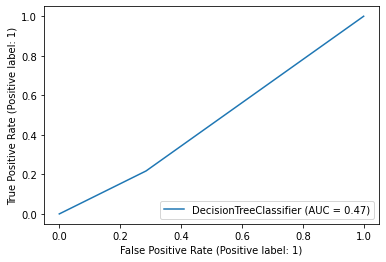

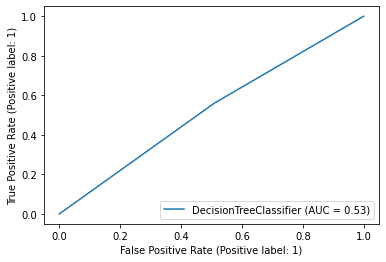

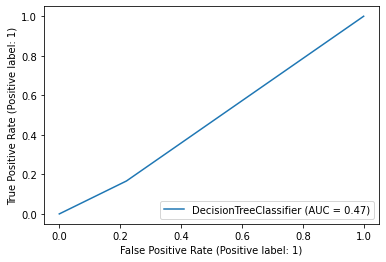

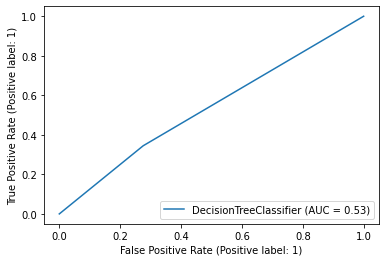

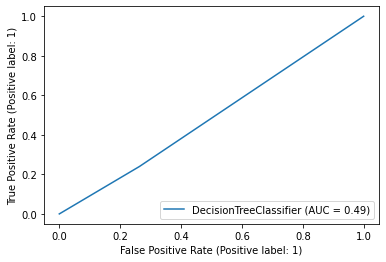

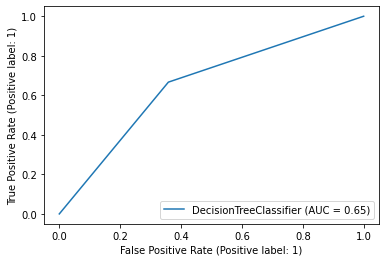

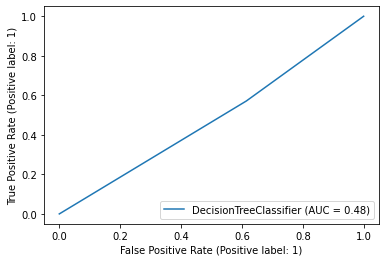

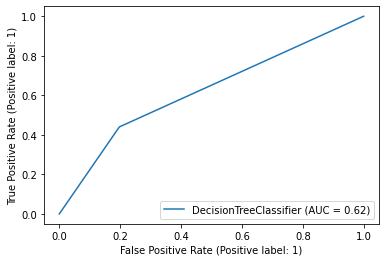

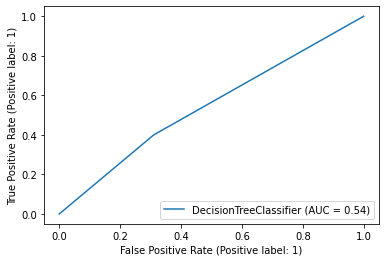

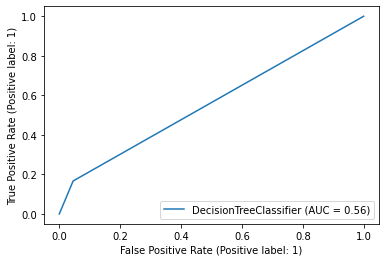

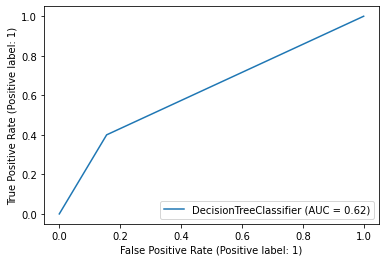

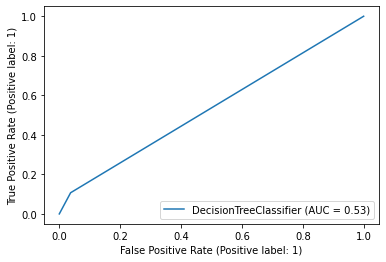

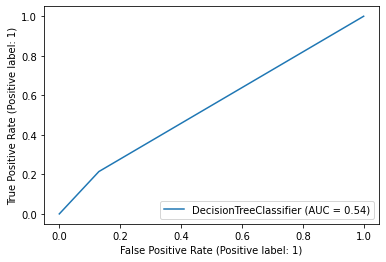

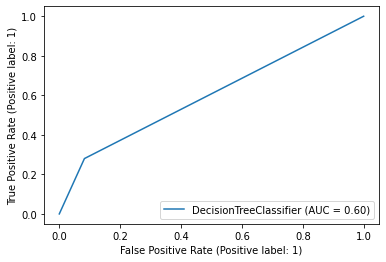

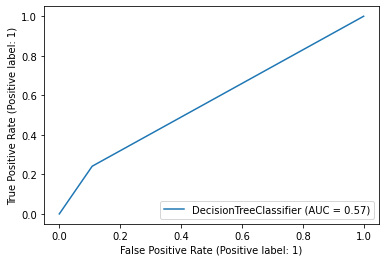

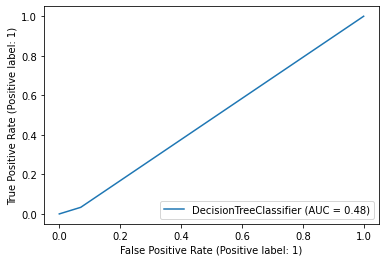

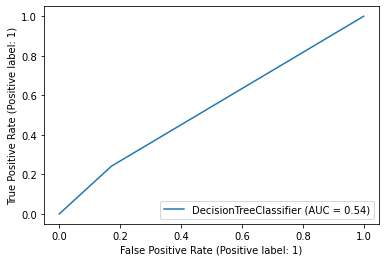

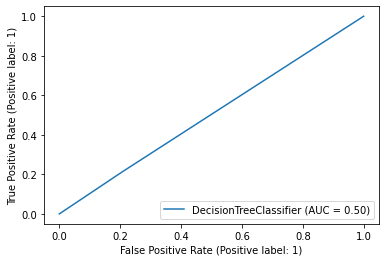

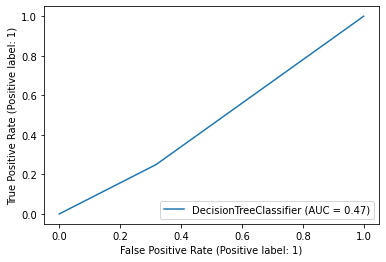

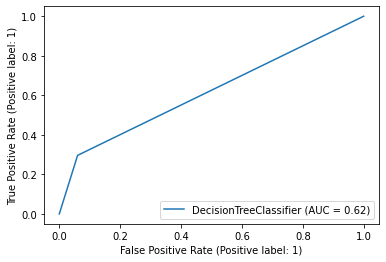

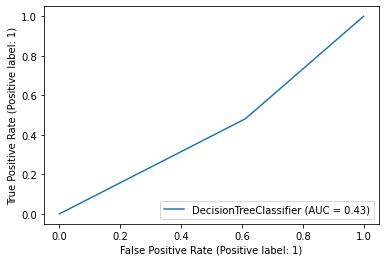

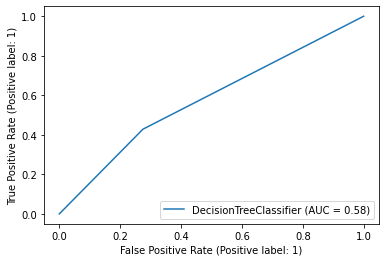

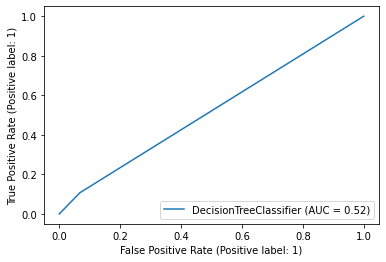

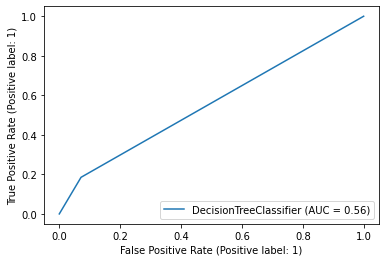

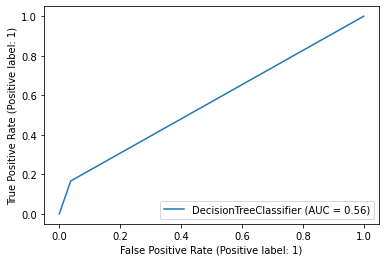

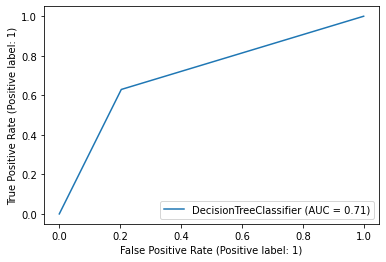

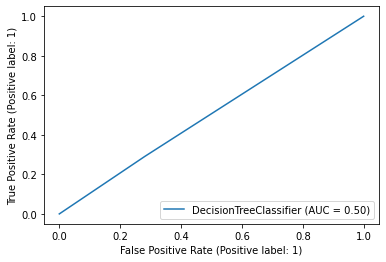

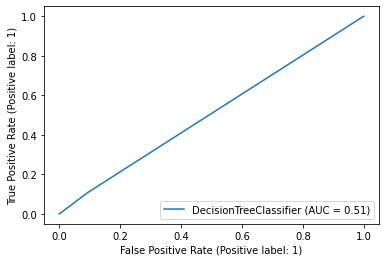

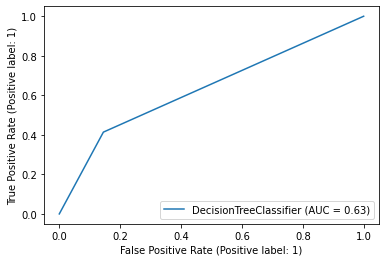

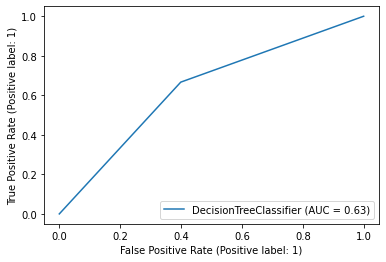

In [ ]:
for i in range(len(X_train_all)):
    X_train = X_train_all[i]
    y_train = y_train_all[i]
    X_test = X_test_all[i]
    y_test = y_test_all[i]
    model_dt = DecisionTreeClassifier()
    tic = time.time()
    model_dt.fit(X_train, y_train) 
    toc = time.time()
    print("Decision Tree Train time = " + str(toc-tic))
    print("Decision Tree Accuracy = "+ str(model_dt.score(X_test, y_test)))
    tic = time.time()
    yhat_probs = model_dt.predict(X_test)
    yhat_classes = (model_dt.predict(X_test) > 0.5).astype("int32")
    toc = time.time()
    print("Decision Tree Test time = " + str(toc-tic))
    print(yhat_probs.shape)
    print(yhat_classes.shape)

    print("___________________Decision Tree Stats _____________________")

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat_classes)
    print('Accuracy: %f' % accuracy)

    Accuracies.append(accuracy)

    # confusion matrix
    CM = confusion_matrix(y_test, yhat_classes)
    print(CM)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    print('True negatives: %d' % TN)
    print('True positives: %d' % TP)
    print('False positives: %d' % FP)
    print('False negatives: %d' % FN)

    TPs.append(TP)
    FPs.append(FP)
    TNs.append(TN)
    FNs.append(FN)

    # ROC AUC
    auc = roc_auc_score(y_test, yhat_probs)
    print('ROC AUC: %f' % auc)

    ROC_AUCs.append(auc)

    #F1 score
    F1 = (2*TP / (2*TP + FP + FN))
    print('F1 Score: %f' % F1)

    F1s.append(F1)

    # precision tp / (tp + fp)
    precision = TP / (TP + FP)
    print('Precision: %f' % precision)

    Precisions.append(precision)

    # TPR
    tpr = (TP)/(TP + FN)
    print('TPR: %f' % tpr)

    TPRs.append(tpr)

    #FPR
    fpr = (FP)/(FP + TN)
    print('FPR: %f' % fpr)

    FPRs.append(fpr)

    #AUC
    from sklearn.metrics import plot_roc_curve
    plot_roc_curve(model_dt, X_test, y_test)

    print("____________________________________________________________")
    print("____________________________________________________________")

#### Results

In [ ]:
data = []

for i in range(len(Accuracies)):
  data.append([users[i], Accuracies[i], ROC_AUCs[i], F1s[i], Precisions[i], TPRs[i], FPRs[i], TPs[i], TNs[i], FPs[i], FNs[i]])

In [ ]:
print(len(data[0]))

11


In [ ]:
DTWithoutSMOTE = pd.DataFrame(data, columns=['User Left Out', 'Accuracy', 'ROC_AUC', 'F1', 'Precision', 'TPR', 'FPR', 'TP', 'TN', 'FP', 'FN'])

In [ ]:
df_temp = pd.DataFrame([DTWithoutSMOTE.mean(axis=0).values],  columns=['User Left Out', 'Accuracy', 'ROC_AUC', 'F1', 'Precision', 'TPR', 'FPR', 'TP', 'TN', 'FP', 'FN'], index=['Average'])

In [ ]:
print(df_temp)

         User Left Out  Accuracy   ROC_AUC        F1  Precision       TPR  \
Average           15.5  0.728719  0.548709  0.200429   0.177394  0.317612   

              FPR        TP     TN    FP         FN  
Average  0.220194  8.266667  171.0  48.5  18.333333  


In [ ]:
DTWithoutSMOTE = DTWithoutSMOTE.append(df_temp)

In [ ]:
print(DTWithoutSMOTE)
DTWithoutSMOTE.to_csv('/content/drive/MyDrive/Surjya Sir Work/RupturesResults/DTWithoutSMOTE.csv', index = True)

         User Left Out  Accuracy   ROC_AUC        F1  Precision       TPR  \
0                  1.0  0.669323  0.466152  0.107527   0.071429  0.217391   
1                  2.0  0.497959  0.525455  0.185430   0.111111  0.560000   
2                  3.0  0.719512  0.472973  0.103896   0.075472  0.166667   
3                  4.0  0.679012  0.534563  0.204082   0.144928  0.344828   
4                  5.0  0.686747  0.488304  0.133333   0.092308  0.240000   
5                  6.0  0.643443  0.654130  0.216216   0.129032  0.666667   
6                  7.0  0.406504  0.478375  0.179775   0.106667  0.571429   
7                  8.0  0.765432  0.621376  0.278481   0.203704  0.440000   
8                  9.0  0.659836  0.544749  0.194175   0.128205  0.400000   
9                 10.0  0.877049  0.560606  0.210526   0.285714  0.166667   
10                11.0  0.800000  0.622222  0.285714   0.222222  0.400000   
11                12.0  0.864198  0.534967  0.153846   0.272727  0.107143   

###Gradient Boost

####Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
Accuracies = []
ROC_AUCs = []
F1s = []
Precisions = []
TPRs = []
FPRs = []


TPs = []
FPs = []
TNs = []
FNs = []

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 26.707945585250854
Gradient Boost Accuracy = 0.7211155378486056
Gradient Boost Test time = 0.00961923599243164
(251,)
(251,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.721116
[[174  54]
 [ 16   7]]
True negatives: 174
True positives: 7
False positives: 54
False negatives: 16
ROC AUC: 0.533753
F1 Score: 0.166667
Precision: 0.114754
TPR: 0.304348
FPR: 0.236842
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 27.05570363998413
Gradient Boost Accuracy = 0.10204081632653061
Gradient Boost Test time = 0.00863337516784668
(245,)
(245,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.102041
[[  0 220]
 [  0  25]]
True negatives: 0
True positives: 25
False positives: 220
False negatives: 0
ROC AUC: 0.500000
F1 Score: 0.185185
Precision: 0.102041
TPR: 1.000000
FPR: 1.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 26.614038228988647
Gradient Boost Accuracy = 0.8902439024390244
Gradient Boost Test time = 0.009430408477783203
(246,)
(246,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.890244
[[215   7]
 [ 20   4]]
True negatives: 215
True positives: 4
False positives: 7
False negatives: 20
ROC AUC: 0.567568
F1 Score: 0.228571
Precision: 0.363636
TPR: 0.166667
FPR: 0.031532
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 26.5754132270813
Gradient Boost Accuracy = 0.831275720164609
Gradient Boost Test time = 0.010757923126220703
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.831276
[[191  23]
 [ 18  11]]
True negatives: 191
True positives: 11
False positives: 23
False negatives: 18
ROC AUC: 0.635917
F1 Score: 0.349206
Precision: 0.323529
TPR: 0.379310
FPR: 0.107477
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 26.540873765945435
Gradient Boost Accuracy = 0.8313253012048193
Gradient Boost Test time = 0.009797334671020508
(249,)
(249,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.831325
[[202  22]
 [ 20   5]]
True negatives: 202
True positives: 5
False positives: 22
False negatives: 20
ROC AUC: 0.550893
F1 Score: 0.192308
Precision: 0.185185
TPR: 0.200000
FPR: 0.098214
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 27.036432027816772
Gradient Boost Accuracy = 0.9467213114754098
Gradient Boost Test time = 0.00901484489440918
(244,)
(244,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.946721
[[221   5]
 [  8  10]]
True negatives: 221
True positives: 10
False positives: 5
False negatives: 8
ROC AUC: 0.766716
F1 Score: 0.606061
Precision: 0.666667
TPR: 0.555556
FPR: 0.022124
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 26.48187279701233
Gradient Boost Accuracy = 0.7398373983739838
Gradient Boost Test time = 0.009891986846923828
(246,)
(246,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.739837
[[168  50]
 [ 14  14]]
True negatives: 168
True positives: 14
False positives: 50
False negatives: 14
ROC AUC: 0.635321
F1 Score: 0.304348
Precision: 0.218750
TPR: 0.500000
FPR: 0.229358
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 26.46101689338684
Gradient Boost Accuracy = 0.8641975308641975
Gradient Boost Test time = 0.009723424911499023
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.864198
[[207  11]
 [ 22   3]]
True negatives: 207
True positives: 3
False positives: 11
False negatives: 22
ROC AUC: 0.534771
F1 Score: 0.153846
Precision: 0.214286
TPR: 0.120000
FPR: 0.050459
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 26.632282972335815
Gradient Boost Accuracy = 0.8524590163934426
Gradient Boost Test time = 0.009511947631835938
(244,)
(244,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.852459
[[200  19]
 [ 17   8]]
True negatives: 200
True positives: 8
False positives: 19
False negatives: 17
ROC AUC: 0.616621
F1 Score: 0.307692
Precision: 0.296296
TPR: 0.320000
FPR: 0.086758
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 26.67791986465454
Gradient Boost Accuracy = 0.9016393442622951
Gradient Boost Test time = 0.010043859481811523
(244,)
(244,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.901639
[[219   1]
 [ 23   1]]
True negatives: 219
True positives: 1
False positives: 1
False negatives: 23
ROC AUC: 0.518561
F1 Score: 0.076923
Precision: 0.500000
TPR: 0.041667
FPR: 0.004545
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 26.62921690940857
Gradient Boost Accuracy = 0.896
Gradient Boost Test time = 0.011852502822875977
(250,)
(250,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.896000
[[218   7]
 [ 19   6]]
True negatives: 218
True positives: 6
False positives: 7
False negatives: 19
ROC AUC: 0.604444
F1 Score: 0.315789
Precision: 0.461538
TPR: 0.240000
FPR: 0.031111
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 26.626922607421875
Gradient Boost Accuracy = 0.8888888888888888
Gradient Boost Test time = 0.010353565216064453
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.888889
[[215   0]
 [ 27   1]]
True negatives: 215
True positives: 1
False positives: 0
False negatives: 27
ROC AUC: 0.517857
F1 Score: 0.068966
Precision: 1.000000
TPR: 0.035714
FPR: 0.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 26.592333793640137
Gradient Boost Accuracy = 0.8844621513944223
Gradient Boost Test time = 0.01021575927734375
(251,)
(251,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.884462
[[220   3]
 [ 26   2]]
True negatives: 220
True positives: 2
False positives: 3
False negatives: 26
ROC AUC: 0.528988
F1 Score: 0.121212
Precision: 0.400000
TPR: 0.071429
FPR: 0.013453
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 26.6829092502594
Gradient Boost Accuracy = 0.8847736625514403
Gradient Boost Test time = 0.01027989387512207
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.884774
[[210   8]
 [ 20   5]]
True negatives: 210
True positives: 5
False positives: 8
False negatives: 20
ROC AUC: 0.581651
F1 Score: 0.263158
Precision: 0.384615
TPR: 0.200000
FPR: 0.036697
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 26.56175422668457
Gradient Boost Accuracy = 0.9043824701195219
Gradient Boost Test time = 0.010688066482543945
(251,)
(251,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.904382
[[219   3]
 [ 21   8]]
True negatives: 219
True positives: 8
False positives: 3
False negatives: 21
ROC AUC: 0.631174
F1 Score: 0.400000
Precision: 0.727273
TPR: 0.275862
FPR: 0.013514
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 26.649908781051636
Gradient Boost Accuracy = 0.8847736625514403
Gradient Boost Test time = 0.009592533111572266
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.884774
[[213   0]
 [ 28   2]]
True negatives: 213
True positives: 2
False positives: 0
False negatives: 28
ROC AUC: 0.533333
F1 Score: 0.125000
Precision: 1.000000
TPR: 0.066667
FPR: 0.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 26.680689334869385
Gradient Boost Accuracy = 0.896414342629482
Gradient Boost Test time = 0.009600639343261719
(251,)
(251,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.896414
[[221   1]
 [ 25   4]]
True negatives: 221
True positives: 4
False positives: 1
False negatives: 25
ROC AUC: 0.566713
F1 Score: 0.235294
Precision: 0.800000
TPR: 0.137931
FPR: 0.004505
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 26.717718601226807
Gradient Boost Accuracy = 0.8647540983606558
Gradient Boost Test time = 0.009956598281860352
(244,)
(244,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.864754
[[204  12]
 [ 21   7]]
True negatives: 204
True positives: 7
False positives: 12
False negatives: 21
ROC AUC: 0.597222
F1 Score: 0.297872
Precision: 0.368421
TPR: 0.250000
FPR: 0.055556
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 26.666476726531982
Gradient Boost Accuracy = 0.848605577689243
Gradient Boost Test time = 0.010358333587646484
(251,)
(251,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.848606
[[202  21]
 [ 17  11]]
True negatives: 202
True positives: 11
False positives: 21
False negatives: 17
ROC AUC: 0.649343
F1 Score: 0.366667
Precision: 0.343750
TPR: 0.392857
FPR: 0.094170
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 26.61137628555298
Gradient Boost Accuracy = 0.8930041152263375
Gradient Boost Test time = 0.009593963623046875
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.893004
[[214   2]
 [ 24   3]]
True negatives: 214
True positives: 3
False positives: 2
False negatives: 24
ROC AUC: 0.550926
F1 Score: 0.187500
Precision: 0.600000
TPR: 0.111111
FPR: 0.009259
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 26.601680040359497
Gradient Boost Accuracy = 0.7370517928286853
Gradient Boost Test time = 0.009815216064453125
(251,)
(251,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.737052
[[177  47]
 [ 19   8]]
True negatives: 177
True positives: 8
False positives: 47
False negatives: 19
ROC AUC: 0.543237
F1 Score: 0.195122
Precision: 0.145455
TPR: 0.296296
FPR: 0.209821
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boost Train time = 26.688424825668335
Gradient Boost Accuracy = 0.8765432098765432
Gradient Boost Test time = 0.009264469146728516
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.876543
[[210  12]
 [ 18   3]]
True negatives: 210
True positives: 3
False positives: 12
False negatives: 18
ROC AUC: 0.544402
F1 Score: 0.166667
Precision: 0.200000
TPR: 0.142857
FPR: 0.054054
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boost Train time = 26.62354326248169
Gradient Boost Accuracy = 0.896
Gradient Boost Test time = 0.009886026382446289
(250,)
(250,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.896000
[[222   0]
 [ 26   2]]
True negatives: 222
True positives: 2
False positives: 0
False negatives: 26
ROC AUC: 0.535714
F1 Score: 0.133333
Precision: 1.000000
TPR: 0.071429
FPR: 0.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boost Train time = 26.621681690216064
Gradient Boost Accuracy = 0.896414342629482
Gradient Boost Test time = 0.009663581848144531
(251,)
(251,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.896414
[[224   0]
 [ 26   1]]
True negatives: 224
True positives: 1
False positives: 0
False negatives: 26
ROC AUC: 0.518519
F1 Score: 0.071429
Precision: 1.000000
TPR: 0.037037
FPR: 0.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boost Train time = 26.589691638946533
Gradient Boost Accuracy = 0.8847736625514403
Gradient Boost Test time = 0.01085805892944336
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.884774
[[212   1]
 [ 27   3]]
True negatives: 212
True positives: 3
False positives: 1
False negatives: 27
ROC AUC: 0.547653
F1 Score: 0.176471
Precision: 0.750000
TPR: 0.100000
FPR: 0.004695
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boost Train time = 26.57977271080017
Gradient Boost Accuracy = 0.9135802469135802
Gradient Boost Test time = 0.01044917106628418
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.913580
[[206  10]
 [ 11  16]]
True negatives: 206
True positives: 16
False positives: 10
False negatives: 11
ROC AUC: 0.773148
F1 Score: 0.603774
Precision: 0.615385
TPR: 0.592593
FPR: 0.046296
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boost Train time = 26.553117990493774
Gradient Boost Accuracy = 0.8734693877551021
Gradient Boost Test time = 0.01060342788696289
(245,)
(245,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.873469
[[213   1]
 [ 30   1]]
True negatives: 213
True positives: 1
False positives: 1
False negatives: 30
ROC AUC: 0.513793
F1 Score: 0.060606
Precision: 0.500000
TPR: 0.032258
FPR: 0.004673
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boost Train time = 26.593774557113647
Gradient Boost Accuracy = 0.8852459016393442
Gradient Boost Test time = 0.010910272598266602
(244,)
(244,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.885246
[[216   0]
 [ 28   0]]
True negatives: 216
True positives: 0
False positives: 0
False negatives: 28
ROC AUC: 0.500000
F1 Score: 0.000000
Precision: nan
TPR: 0.000000
FPR: 0.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector

Gradient Boost Train time = 26.481597185134888
Gradient Boost Accuracy = 0.831275720164609
Gradient Boost Test time = 0.010102510452270508
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.831276
[[190  24]
 [ 17  12]]
True negatives: 190
True positives: 12
False positives: 24
False negatives: 17
ROC AUC: 0.650822
F1 Score: 0.369231
Precision: 0.333333
TPR: 0.413793
FPR: 0.112150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

____________________________________________________________
____________________________________________________________
Gradient Boost Train time = 26.527050971984863
Gradient Boost Accuracy = 0.7591836734693878
Gradient Boost Test time = 0.010612010955810547
(245,)
(245,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.759184
[[173  45]
 [ 14  13]]
True negatives: 173
True positives: 13
False positives: 45
False negatives: 14
ROC AUC: 0.637530
F1 Score: 0.305882
Precision: 0.224138
TPR: 0.481481
FPR: 0.206422
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


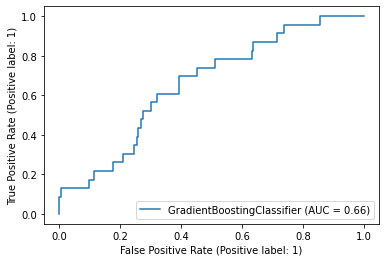

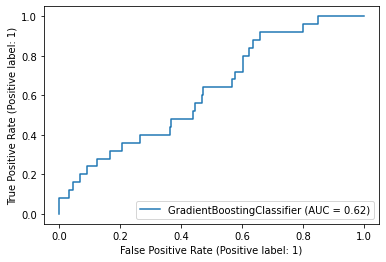

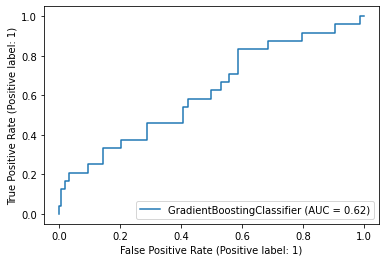

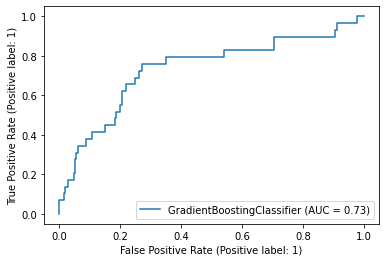

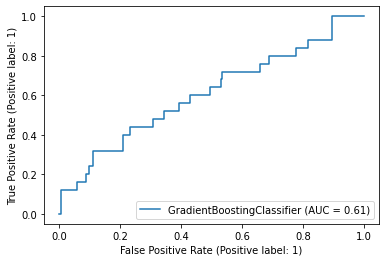

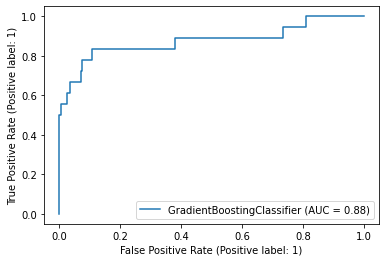

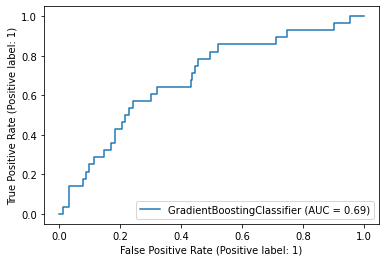

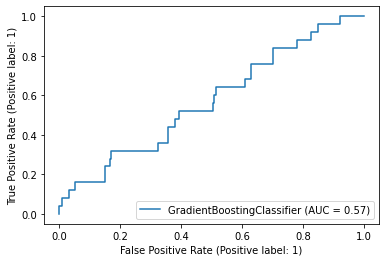

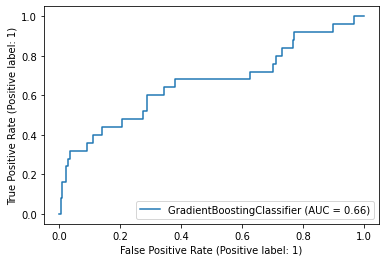

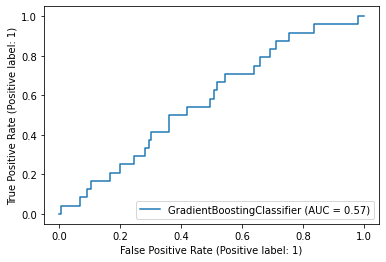

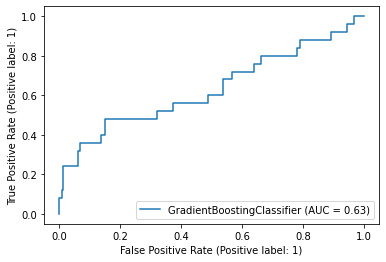

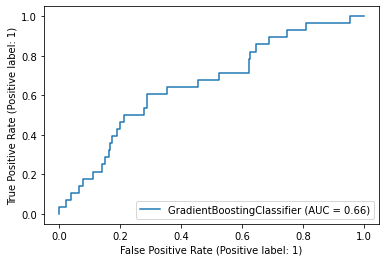

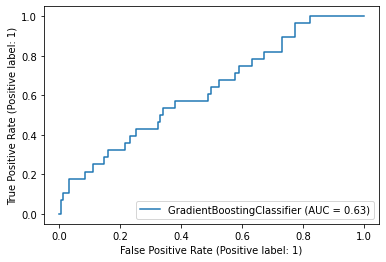

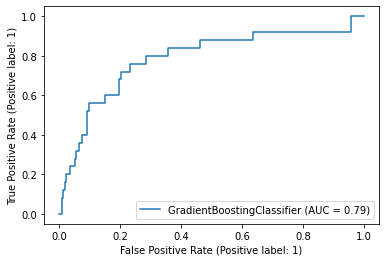

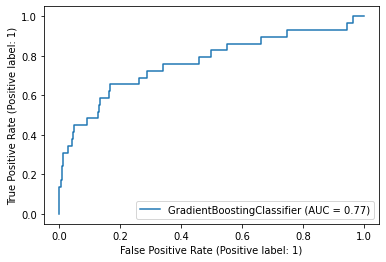

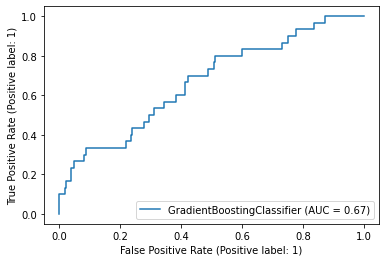

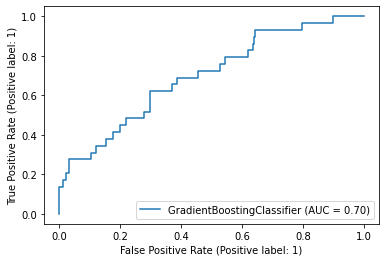

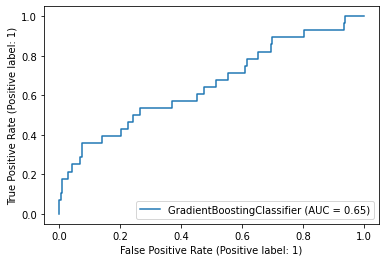

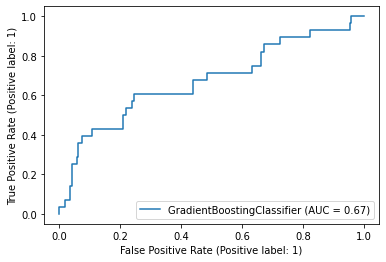

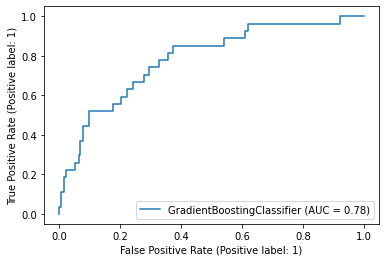

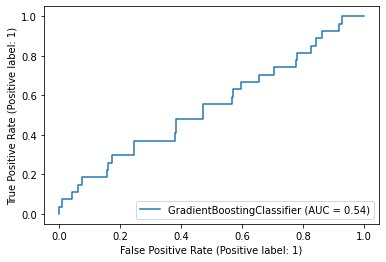

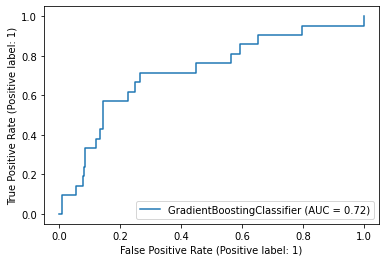

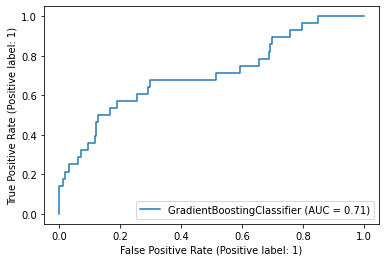

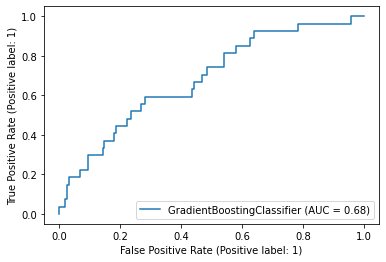

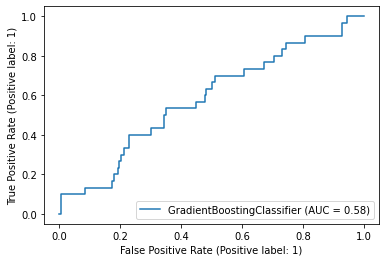

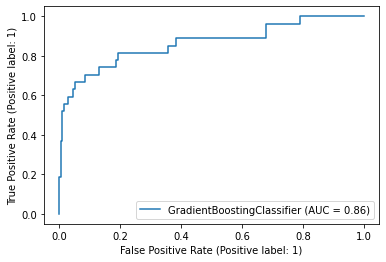

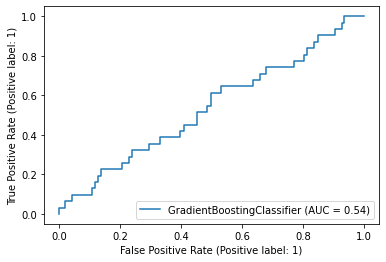

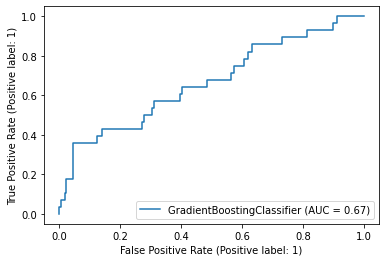

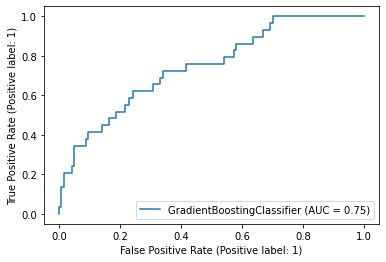

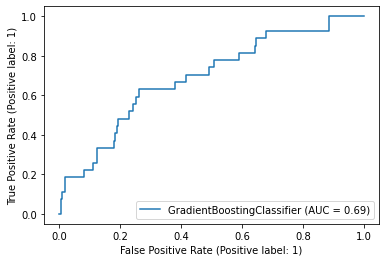

In [ ]:
for i in range(len(X_train_all)):
    X_train = X_train_all[i]
    y_train = y_train_all[i]
    X_test = X_test_all[i]
    y_test = y_test_all[i]
    model_gb = GradientBoostingClassifier(n_estimators = 1000) 
    tic = time.time()
    model_gb.fit(X_train, y_train) 
    toc = time.time()
    print("Gradient Boost Train time = " + str(toc-tic))
    print("Gradient Boost Accuracy = "+ str(model_gb.score(X_test, y_test)))
    tic = time.time()
    yhat_probs = model_gb.predict(X_test)
    yhat_classes = (model_gb.predict(X_test) > 0.5).astype("int32")
    toc = time.time()
    print("Gradient Boost Test time = " + str(toc-tic))
    print(yhat_probs.shape)
    print(yhat_classes.shape)

    print("___________________Gradient Boost Stats _____________________")

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat_classes)
    print('Accuracy: %f' % accuracy)

    Accuracies.append(accuracy)

    # confusion matrix
    CM = confusion_matrix(y_test, yhat_classes)
    print(CM)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    print('True negatives: %d' % TN)
    print('True positives: %d' % TP)
    print('False positives: %d' % FP)
    print('False negatives: %d' % FN)

    TPs.append(TP)
    FPs.append(FP)
    TNs.append(TN)
    FNs.append(FN)
    # ROC AUC
    auc = roc_auc_score(y_test, yhat_probs)
    print('ROC AUC: %f' % auc)

    ROC_AUCs.append(auc)

    #F1 score
    F1 = (2*TP / (2*TP + FP + FN))
    print('F1 Score: %f' % F1)

    F1s.append(F1)

    # precision tp / (tp + fp)
    precision = TP / (TP + FP)
    print('Precision: %f' % precision)

    Precisions.append(precision)

    # TPR
    tpr = (TP)/(TP + FN)
    print('TPR: %f' % tpr)

    TPRs.append(tpr)

    #FPR
    fpr = (FP)/(FP + TN)
    print('FPR: %f' % fpr)

    FPRs.append(fpr)

    #AUC
    from sklearn.metrics import plot_roc_curve
    plot_roc_curve(model_gb, X_test, y_test)

    print("____________________________________________________________")
    print("____________________________________________________________")

#### Results

In [ ]:
data = []

for i in range(len(Accuracies)):
  data.append([users[i], Accuracies[i], ROC_AUCs[i], F1s[i], Precisions[i], TPRs[i], FPRs[i], TPs[i], TNs[i], FPs[i], FNs[i]])

In [ ]:
print(len(data[0]))

11


In [ ]:
GBWithoutSMOTE = pd.DataFrame(data, columns=['User Left Out', 'Accuracy', 'ROC_AUC', 'F1', 'Precision', 'TPR', 'FPR', 'TP', 'TN', 'FP', 'FN'])

In [ ]:
df_temp = pd.DataFrame([GBWithoutSMOTE.mean(axis=0).values],  columns=['User Left Out', 'Accuracy', 'ROC_AUC', 'F1', 'Precision', 'TPR', 'FPR', 'TP', 'TN', 'FP', 'FN'], index=['Average'])

In [ ]:
print(df_temp)

         User Left Out  Accuracy   ROC_AUC        F1  Precision       TPR  \
Average           15.5  0.836015  0.579553  0.234493   0.477209  0.251229   

              FPR        TP     TN    FP         FN  
Average  0.092123  6.533333  199.2  20.3  20.066667  


In [ ]:
GBWithoutSMOTE = GBWithoutSMOTE.append(df_temp)

In [ ]:
print(GBWithoutSMOTE)
GBWithoutSMOTE.to_csv('/content/drive/MyDrive/Surjya Sir Work/RupturesResults/GBWithoutSMOTE.csv', index = True)

         User Left Out  Accuracy   ROC_AUC        F1  Precision       TPR  \
0                  1.0  0.721116  0.533753  0.166667   0.114754  0.304348   
1                  2.0  0.102041  0.500000  0.185185   0.102041  1.000000   
2                  3.0  0.890244  0.567568  0.228571   0.363636  0.166667   
3                  4.0  0.831276  0.635917  0.349206   0.323529  0.379310   
4                  5.0  0.831325  0.550893  0.192308   0.185185  0.200000   
5                  6.0  0.946721  0.766716  0.606061   0.666667  0.555556   
6                  7.0  0.739837  0.635321  0.304348   0.218750  0.500000   
7                  8.0  0.864198  0.534771  0.153846   0.214286  0.120000   
8                  9.0  0.852459  0.616621  0.307692   0.296296  0.320000   
9                 10.0  0.901639  0.518561  0.076923   0.500000  0.041667   
10                11.0  0.896000  0.604444  0.315789   0.461538  0.240000   
11                12.0  0.888889  0.517857  0.068966   1.000000  0.035714   

###3 DNN

#### Model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
Accuracies = []
ROC_AUCs = []
F1s = []
Precisions = []
TPRs = []
FPRs = []


TPs = []
FPs = []
TNs = []
FNs = []

In [ ]:
print(X_train.shape[1])

16


Epoch 1/100
101/101 [==============================] - 1s 5ms/step - loss: 3.1177 - accuracy: 0.5684 - val_loss: 0.4789 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.7644 - accuracy: 0.7719 - val_loss: 0.3977 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.6047 - accuracy: 0.8232 - val_loss: 0.3783 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.5243 - accuracy: 0.8517 - val_loss: 0.3774 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4904 - accuracy: 0.8685 - val_loss: 0.3683 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4579 - accuracy: 0.8774 - val_loss: 0.3720 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/st

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in long_scalars


101/101 [==============================] - 1s 4ms/step - loss: 0.9884 - accuracy: 0.8101 - val_loss: 0.5283 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.5199 - accuracy: 0.8693 - val_loss: 0.4323 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.8833 - val_loss: 0.4091 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4457 - accuracy: 0.8867 - val_loss: 0.3799 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8898 - val_loss: 0.3624 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8901 - val_loss: 0.3688 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in long_scalars


101/101 [==============================] - 1s 4ms/step - loss: 2.3103 - accuracy: 0.7380 - val_loss: 0.4217 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.8368 - val_loss: 0.4618 - val_accuracy: 0.8796 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.8690 - val_loss: 0.4051 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4895 - accuracy: 0.8799 - val_loss: 0.4193 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4501 - accuracy: 0.8808 - val_loss: 0.3998 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4481 - accuracy: 0.8879 - val_loss: 0.3938 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 2ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in long_scalars


101/101 [==============================] - 1s 4ms/step - loss: 0.7799 - accuracy: 0.8375 - val_loss: 0.4075 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4657 - accuracy: 0.8850 - val_loss: 0.3906 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4237 - accuracy: 0.8882 - val_loss: 0.3927 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.3971 - accuracy: 0.8886 - val_loss: 0.3833 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4072 - accuracy: 0.8887 - val_loss: 0.3762 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.3919 - accuracy: 0.8907 - val_loss: 0.3743 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in long_scalars


101/101 [==============================] - 1s 4ms/step - loss: 1.0081 - accuracy: 0.7405 - val_loss: 0.4571 - val_accuracy: 0.8796 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.5026 - accuracy: 0.8700 - val_loss: 0.4127 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4753 - accuracy: 0.8845 - val_loss: 0.3932 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.8872 - val_loss: 0.4060 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.8884 - val_loss: 0.3864 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4129 - accuracy: 0.8901 - val_loss: 0.3818 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in long_scalars


101/101 [==============================] - 1s 4ms/step - loss: 0.8063 - accuracy: 0.8174 - val_loss: 0.3799 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4684 - accuracy: 0.8868 - val_loss: 0.3720 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.8890 - val_loss: 0.3723 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4135 - accuracy: 0.8912 - val_loss: 0.3680 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4025 - accuracy: 0.8915 - val_loss: 0.3697 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.3866 - accuracy: 0.8920 - val_loss: 0.3624 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in long_scalars


101/101 [==============================] - 1s 4ms/step - loss: 0.9683 - accuracy: 0.8103 - val_loss: 0.4075 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.5373 - accuracy: 0.8776 - val_loss: 0.3827 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4673 - accuracy: 0.8869 - val_loss: 0.3775 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4444 - accuracy: 0.8881 - val_loss: 0.3695 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.8891 - val_loss: 0.3656 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4117 - accuracy: 0.8913 - val_loss: 0.3634 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in long_scalars


101/101 [==============================] - 1s 4ms/step - loss: 0.7179 - accuracy: 0.8750 - val_loss: 0.4111 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.8898 - val_loss: 0.4239 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4315 - accuracy: 0.8915 - val_loss: 0.3920 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4184 - accuracy: 0.8918 - val_loss: 0.3751 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4035 - accuracy: 0.8920 - val_loss: 0.3660 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.3871 - accuracy: 0.8929 - val_loss: 0.3688 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in long_scalars


101/101 [==============================] - 1s 4ms/step - loss: 0.8502 - accuracy: 0.8174 - val_loss: 0.4346 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.5026 - accuracy: 0.8680 - val_loss: 0.4145 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.8817 - val_loss: 0.3908 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.8894 - val_loss: 0.3673 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4008 - accuracy: 0.8895 - val_loss: 0.3673 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.3955 - accuracy: 0.8914 - val_loss: 0.3652 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in long_scalars


101/101 [==============================] - 1s 4ms/step - loss: 1.1346 - accuracy: 0.8294 - val_loss: 0.4855 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy: 0.8757 - val_loss: 0.4250 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4573 - accuracy: 0.8830 - val_loss: 0.4031 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4547 - accuracy: 0.8870 - val_loss: 0.4157 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4208 - accuracy: 0.8902 - val_loss: 0.4049 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4160 - accuracy: 0.8906 - val_loss: 0.3935 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in long_scalars


101/101 [==============================] - 1s 4ms/step - loss: 0.8750 - accuracy: 0.7862 - val_loss: 0.3816 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4776 - accuracy: 0.8613 - val_loss: 0.3825 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4641 - accuracy: 0.8780 - val_loss: 0.3884 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4335 - accuracy: 0.8863 - val_loss: 0.3687 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.8850 - val_loss: 0.3701 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4059 - accuracy: 0.8895 - val_loss: 0.3608 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in long_scalars


101/101 [==============================] - 1s 4ms/step - loss: 0.7701 - accuracy: 0.7968 - val_loss: 0.3832 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4937 - accuracy: 0.8769 - val_loss: 0.3921 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4532 - accuracy: 0.8870 - val_loss: 0.3850 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4416 - accuracy: 0.8889 - val_loss: 0.3753 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.8897 - val_loss: 0.3900 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.8900 - val_loss: 0.3695 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in long_scalars


101/101 [==============================] - 1s 5ms/step - loss: 0.6808 - accuracy: 0.7840 - val_loss: 0.3925 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4564 - accuracy: 0.8856 - val_loss: 0.3633 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4154 - accuracy: 0.8904 - val_loss: 0.3681 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.3948 - accuracy: 0.8917 - val_loss: 0.3610 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.8915 - val_loss: 0.3586 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.3773 - accuracy: 0.8925 - val_loss: 0.3569 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


101/101 [==============================] - 1s 5ms/step - loss: 1.4713 - accuracy: 0.7099 - val_loss: 0.5455 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.5886 - accuracy: 0.8327 - val_loss: 0.4113 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.5123 - accuracy: 0.8626 - val_loss: 0.3907 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4634 - accuracy: 0.8783 - val_loss: 0.3716 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4461 - accuracy: 0.8852 - val_loss: 0.3925 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4369 - accuracy: 0.8901 - val_loss: 0.3881 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


101/101 [==============================] - 1s 5ms/step - loss: 0.8113 - accuracy: 0.8425 - val_loss: 0.3906 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4641 - accuracy: 0.8860 - val_loss: 0.3839 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4491 - accuracy: 0.8908 - val_loss: 0.3791 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.8903 - val_loss: 0.3667 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.3985 - accuracy: 0.8927 - val_loss: 0.3645 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.3920 - accuracy: 0.8925 - val_loss: 0.3713 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


101/101 [==============================] - 1s 4ms/step - loss: 1.1095 - accuracy: 0.8373 - val_loss: 0.6141 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.5754 - accuracy: 0.8822 - val_loss: 0.4344 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4764 - accuracy: 0.8867 - val_loss: 0.4056 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4358 - accuracy: 0.8897 - val_loss: 0.3842 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.8898 - val_loss: 0.3908 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4006 - accuracy: 0.8903 - val_loss: 0.3682 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


101/101 [==============================] - 1s 5ms/step - loss: 1.3586 - accuracy: 0.7952 - val_loss: 0.3745 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4641 - accuracy: 0.8900 - val_loss: 0.3765 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.8909 - val_loss: 0.3688 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4087 - accuracy: 0.8915 - val_loss: 0.3678 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.3976 - accuracy: 0.8931 - val_loss: 0.3695 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.3897 - accuracy: 0.8926 - val_loss: 0.3644 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


101/101 [==============================] - 1s 4ms/step - loss: 0.8096 - accuracy: 0.8638 - val_loss: 0.6568 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.5864 - accuracy: 0.8864 - val_loss: 0.4018 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4977 - accuracy: 0.8904 - val_loss: 0.3958 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4487 - accuracy: 0.8911 - val_loss: 0.4217 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.8923 - val_loss: 0.4184 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4118 - accuracy: 0.8922 - val_loss: 0.4180 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


101/101 [==============================] - 1s 5ms/step - loss: 2.0060 - accuracy: 0.7288 - val_loss: 0.6342 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.6237 - accuracy: 0.8507 - val_loss: 0.4395 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.5350 - accuracy: 0.8724 - val_loss: 0.4126 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4706 - accuracy: 0.8839 - val_loss: 0.4055 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4536 - accuracy: 0.8861 - val_loss: 0.4106 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.8893 - val_loss: 0.3949 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


101/101 [==============================] - 2s 4ms/step - loss: 0.9550 - accuracy: 0.7588 - val_loss: 0.4006 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.8601 - val_loss: 0.3927 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.8906 - val_loss: 0.3776 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4053 - accuracy: 0.8921 - val_loss: 0.3677 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4075 - accuracy: 0.8909 - val_loss: 0.3689 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.3912 - accuracy: 0.8925 - val_loss: 0.3624 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


101/101 [==============================] - 1s 4ms/step - loss: 0.7189 - accuracy: 0.8453 - val_loss: 0.3991 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4835 - accuracy: 0.8794 - val_loss: 0.3819 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.8838 - val_loss: 0.3761 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.8875 - val_loss: 0.3755 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 3ms/step - loss: 0.3935 - accuracy: 0.8895 - val_loss: 0.3749 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.3861 - accuracy: 0.8912 - val_loss: 0.3698 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


101/101 [==============================] - 1s 5ms/step - loss: 1.4855 - accuracy: 0.7391 - val_loss: 0.5779 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 2/100
101/101 [==============================] - 0s 4ms/step - loss: 0.5727 - accuracy: 0.8546 - val_loss: 0.4134 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 3/100
101/101 [==============================] - 0s 4ms/step - loss: 0.4961 - accuracy: 0.8678 - val_loss: 0.4065 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4638 - accuracy: 0.8784 - val_loss: 0.4071 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 5/100
101/101 [==============================] - 0s 4ms/step - loss: 0.4490 - accuracy: 0.8843 - val_loss: 0.3968 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 6/100
101/101 [==============================] - 0s 3ms/step - loss: 0.4279 - accuracy: 0.8884 - val_loss: 0.4033 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


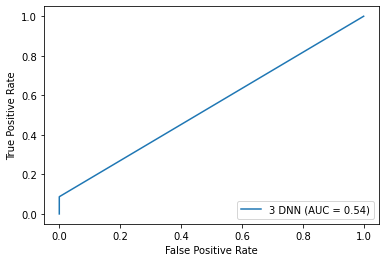

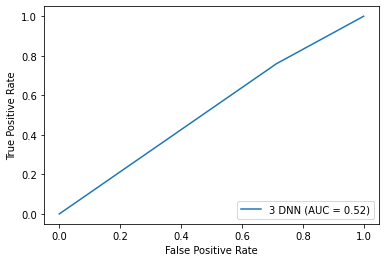

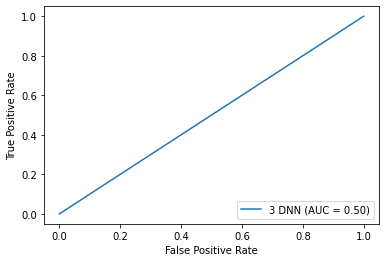

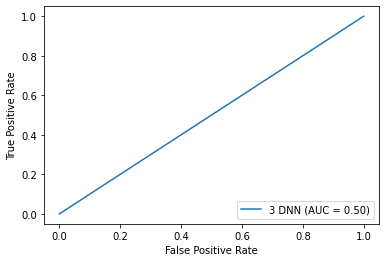

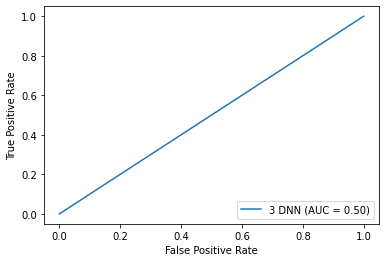

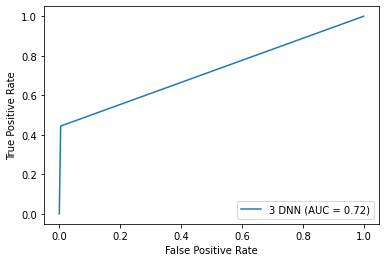

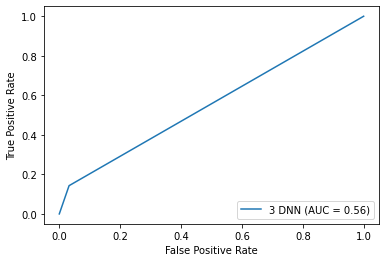

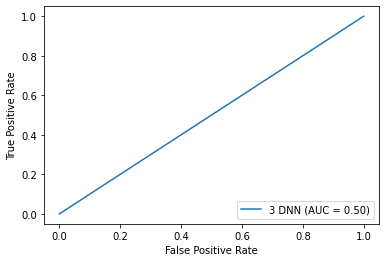

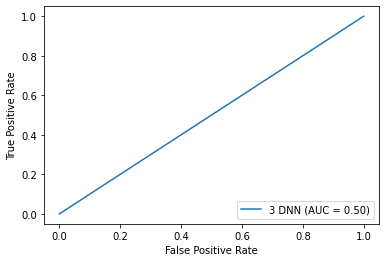

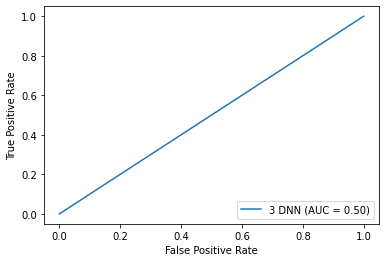

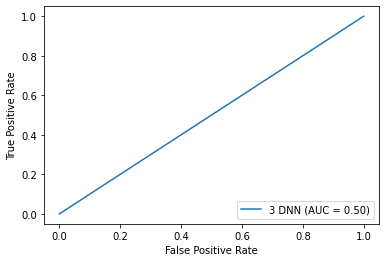

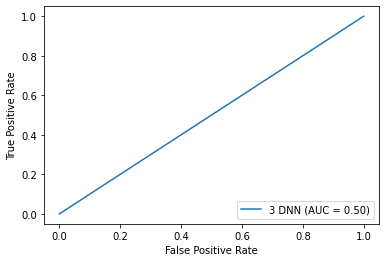

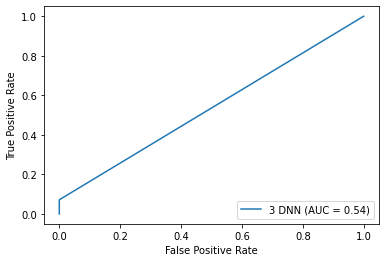

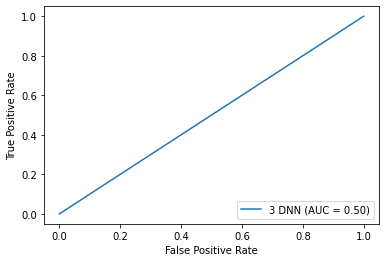

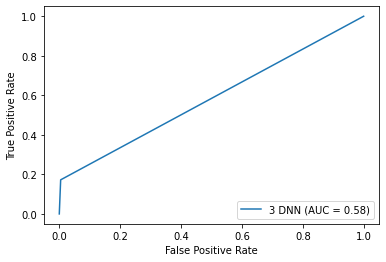

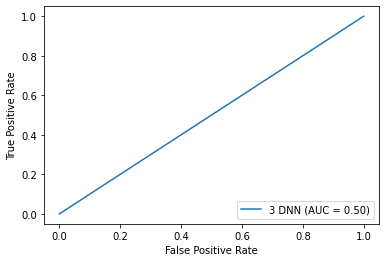

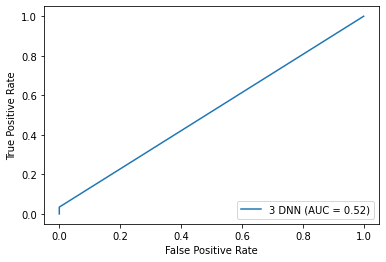

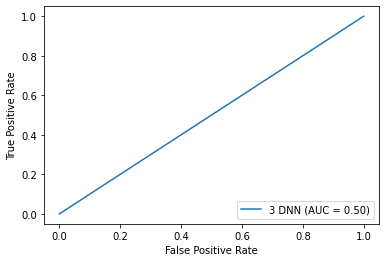

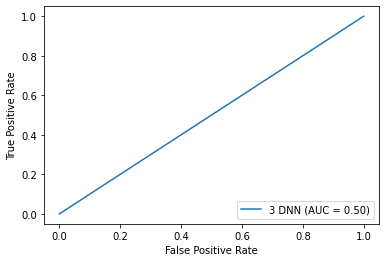

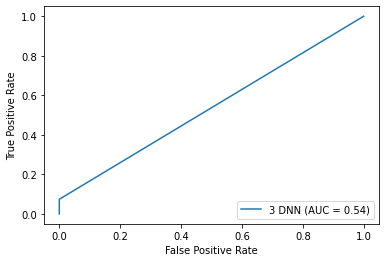

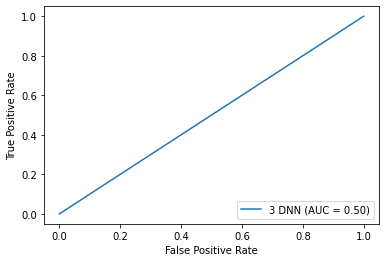

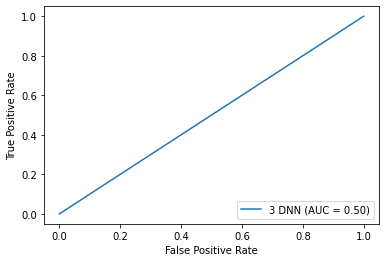

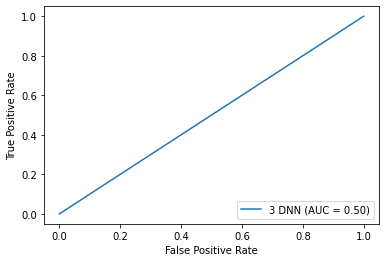

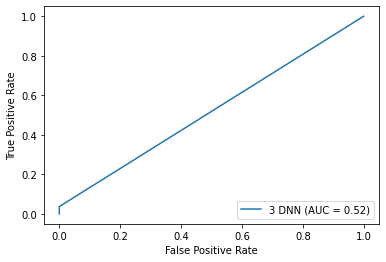

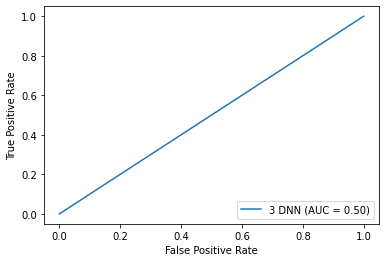

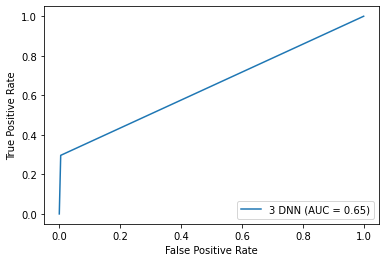

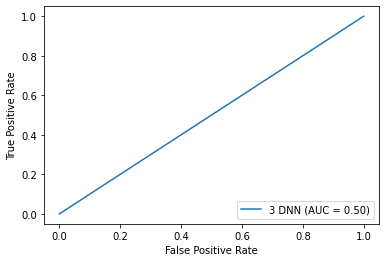

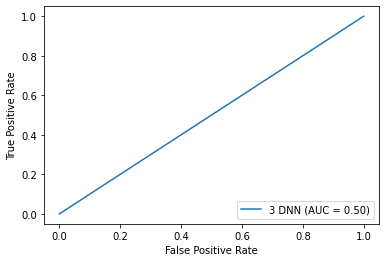

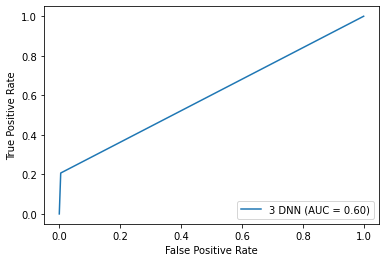

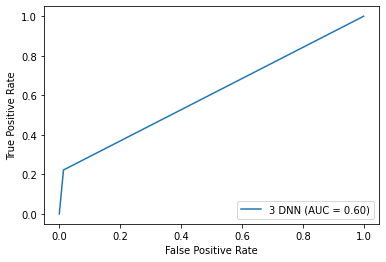

In [ ]:
for i in range(len(X_train_all)):
    X_train = X_train_all[i]
    y_train = y_train_all[i]
    X_test = X_test_all[i]
    y_test = y_test_all[i]
    X_train = np.asarray(X_train).astype('float32')
    y_train = np.asarray(y_train).astype('float32')
    X_test = np.asarray(X_test).astype('float32')
    y_test = np.asarray(y_test).astype('float32')
    model3 = Sequential()

    model3.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model3.add(Dropout(0.3))
    model3.add(Dense(32, activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(8, activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(1, activation='sigmoid'))

    model3.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)
    tic = time.time()
    model3.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.1, callbacks=[reduce_lr])
    toc = time.time()
    print("3 DNN Train time = " + str(toc-tic))
    print("3 DNN Accuracy = "+ str(model3.evaluate(X_test, y_test, verbose=0)[1]))
    tic = time.time()
    yhat_probs = model3.predict(X_test, verbose=0)
    yhat_classes = (model3.predict(X_test) > 0.5).astype("int32")
    toc = time.time()
    print("3 DNN Test time = " + str(toc-tic))
    yhat_probs = yhat_probs[:, 0]
    yhat_classes = yhat_classes[:, 0]
    print(yhat_probs.shape)
    print(yhat_classes.shape)

    print("___________________3 DNN Stats _____________________")

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat_classes)
    print('Accuracy: %f' % accuracy)

    Accuracies.append(accuracy)

    # confusion matrix
    CM = confusion_matrix(y_test, yhat_classes)
    print(CM)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    print('True negatives: %d' % TN)
    print('True positives: %d' % TP)
    print('False positives: %d' % FP)
    print('False negatives: %d' % FN)


    TPs.append(TP)
    FPs.append(FP)
    TNs.append(TN)
    FNs.append(FN)

    # ROC AUC
    auc = roc_auc_score(y_test, yhat_probs)
    print('ROC AUC: %f' % auc)

    ROC_AUCs.append(auc)

    #F1 score
    F1 = (2*TP / (2*TP + FP + FN))
    print('F1 Score: %f' % F1)

    F1s.append(F1)

    # precision tp / (tp + fp)
    precision = TP / (TP + FP)
    print('Precision: %f' % precision)

    Precisions.append(precision)

    # TPR
    tpr = (TP)/(TP + FN)
    print('TPR: %f' % tpr)

    TPRs.append(tpr)

    #FPR
    fpr = (FP)/(FP + TN)
    print('FPR: %f' % fpr)

    FPRs.append(fpr)

    #AUC
    from sklearn import metrics
    fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat_classes)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='3 DNN')
    display.plot()  

    print("____________________________________________________________")
    print("____________________________________________________________")

#### Results

In [ ]:
data = []

for i in range(len(Accuracies)):
  data.append([users[i], Accuracies[i], ROC_AUCs[i], F1s[i], Precisions[i], TPRs[i], FPRs[i], TPs[i], TNs[i], FPs[i], FNs[i]])

In [ ]:
print(len(data[0]))

11


In [ ]:
DNN3WithoutSMOTE = pd.DataFrame(data, columns=['User Left Out', 'Accuracy', 'ROC_AUC', 'F1', 'Precision', 'TPR', 'FPR', 'TP', 'TN', 'FP', 'FN'])

In [ ]:
df_temp = pd.DataFrame([DNN3WithoutSMOTE.mean(axis=0).values],  columns=['User Left Out', 'Accuracy', 'ROC_AUC', 'F1', 'Precision', 'TPR', 'FPR', 'TP', 'TN', 'FP', 'FN'], index=['Average'])

In [ ]:
print(df_temp)

         User Left Out  Accuracy   ROC_AUC        F1  Precision      TPR  \
Average           15.5  0.877336  0.698953  0.098432   0.800543  0.08497   

              FPR        TP     TN   FP         FN  
Average  0.025925  2.133333  213.8  5.7  24.466667  


In [ ]:
DNN3WithoutSMOTE = DNN3WithoutSMOTE.append(df_temp)

In [ ]:
print(DNN3WithoutSMOTE)
DNN3WithoutSMOTE.to_csv('/content/drive/MyDrive/Surjya Sir Work/RupturesResults/DNN3WithoutSMOTE.csv', index = True)

         User Left Out  Accuracy   ROC_AUC        F1  Precision       TPR  \
0                  1.0  0.916335  0.664760  0.160000   1.000000  0.086957   
1                  2.0  0.334694  0.470182  0.189055   0.107955  0.760000   
2                  3.0  0.902439  0.692755  0.000000        NaN  0.000000   
3                  4.0  0.880658  0.790203  0.000000        NaN  0.000000   
4                  5.0  0.899598  0.621786  0.000000        NaN  0.000000   
5                  6.0  0.954918  0.924164  0.592593   0.888889  0.444444   
6                  7.0  0.873984  0.670708  0.205128   0.363636  0.142857   
7                  8.0  0.897119  0.616697  0.000000        NaN  0.000000   
8                  9.0  0.897541  0.663196  0.000000        NaN  0.000000   
9                 10.0  0.901639  0.576326  0.000000        NaN  0.000000   
10                11.0  0.900000  0.734578  0.000000        NaN  0.000000   
11                12.0  0.884774  0.598339  0.000000        NaN  0.000000   

# With SMOTE

## Data Processing

### Import df

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Surjya Sir Work/RupturesDatasets/7 Signals/FinalRupturesDataset.csv')

### Optimise df

In [ ]:
df

Unnamed: 0  Video    Start      End  ValenceStart  ValenceEnd  \
0              0      1  2151027  2156027         5.236       6.932   
1              1      1  2156027  2161027         6.932       6.932   
2              2      1  2161027  2166027         6.932       6.942   
3              3      1  2166027  2171026         6.942       6.942   
4              4      1  2171026  2176026         6.942       6.946   
...          ...    ...      ...      ...           ...         ...   
7378        7378      8  2036136  2041136         1.405       1.384   
7379        7379      8  2041136  2046137         1.384       1.344   
7380        7380      8  2046137  2051136         1.344       1.462   
7381        7381      8  2051136  2056137         1.462       1.493   
7382        7382      8  2056137  2061137         1.493       1.689   

      ArousalStart  ArousalEnd  gsrStart  gsrEnd  ...  rspStart  rspEnd  \
0            4.997       4.850     8.962   8.851  ...    40.368  41.878   
1            4.850       4.850     8.851   9.041  ...    41.878  40.116   
2            4.850       4.982     9.041   8.895  ...    40.116  40.735   
3            4.982       4.983     8.895   8.891  ...    40.735  41.374   
4            4.983       5.001     8.891   8.769  ...    41.374  39.835   
...            ...         ...       ...     ...  ...       ...     ...   
7378         7.859       7.653    41.046  41.993  ...    44.530  44.162   
7379         7.653       7.462    41.993  41.212  ...    44.162  44.239   
7380         7.462       7.455    41.212  41.094  ...    44.239  45.633   
7381         7.455       7.511    41.094  41.563  ...    45.633  45.382   
7382         7.511       8.139    41.563  42.955  ...    45.382  46.417   

      emg_zygoStart  emg_zygoEnd  emg_coruStart  emg_coruEnd  emg_trapStart  \
0             6.837        7.617          5.974        6.385          6.837   
1             7.617        7.534          6.385        6.302          6.754   
2             7.534        7.699          6.302        6.179          6.754   
3             7.699        7.494          6.179        6.302          7.001   
4             7.494        7.288          6.302        6.385          7.042   
...             ...          ...            ...          ...            ...   
7378          5.645        5.030          6.179        6.302         13.982   
7379          5.030        5.276          6.302        6.549         13.120   
7380          5.276        4.906          6.549        7.699         11.108   
7381          4.906        4.865          7.699        6.549         20.224   
7382          4.865        4.906          6.549        6.549         15.461   

      emg_trapEnd  user  Probe  
0           6.754     6      0  
1           6.754     6      0  
2           7.001     6      0  
3           7.042     6      0  
4           6.713     6      0  
...           ...   ...    ...  
7378       13.120    27      0  
7379       11.108    27      0  
7380       20.224    27      0  
7381       15.461    27      0  
7382       15.543    27      1  

[7383 rows x 24 columns]

In [ ]:
df = df.drop(columns=["Unnamed: 0", "Start", "End", "ValenceStart",	"ValenceEnd", "ArousalStart", "ArousalEnd"], axis=1)
#df = df.drop(columns=["Unnamed: 0", "Start", "End"], axis=1)

In [ ]:
df

Video  gsrStart  gsrEnd  sktStart  sktEnd  bvpStart  bvpEnd  rspStart  \
0         1     8.962   8.851    27.935  27.920    37.795  38.754    40.368   
1         1     8.851   9.041    27.920  27.924    38.754  35.431    41.878   
2         1     9.041   8.895    27.924  27.896    35.431  35.393    40.116   
3         1     8.895   8.891    27.896  27.878    35.393  36.816    40.735   
4         1     8.891   8.769    27.878  27.861    36.816  37.436    41.374   
...     ...       ...     ...       ...     ...       ...     ...       ...   
7378      8    41.046  41.993    25.424  25.431    36.700  37.068    44.530   
7379      8    41.993  41.212    25.431  25.424    37.068  37.475    44.162   
7380      8    41.212  41.094    25.424  25.410    37.475  37.020    44.239   
7381      8    41.094  41.563    25.410  25.403    37.020  35.838    45.633   
7382      8    41.563  42.955    25.403  25.389    35.838  35.828    45.382   

      rspEnd  emg_zygoStart  emg_zygoEnd  emg_coruStart  emg_coruEnd  \
0     41.878          6.837        7.617          5.974        6.385   
1     40.116          7.617        7.534          6.385        6.302   
2     40.735          7.534        7.699          6.302        6.179   
3     41.374          7.699        7.494          6.179        6.302   
4     39.835          7.494        7.288          6.302        6.385   
...      ...            ...          ...            ...          ...   
7378  44.162          5.645        5.030          6.179        6.302   
7379  44.239          5.030        5.276          6.302        6.549   
7380  45.633          5.276        4.906          6.549        7.699   
7381  45.382          4.906        4.865          7.699        6.549   
7382  46.417          4.865        4.906          6.549        6.549   

      emg_trapStart  emg_trapEnd  user  Probe  
0             6.837        6.754     6      0  
1             6.754        6.754     6      0  
2             6.754        7.001     6      0  
3             7.001        7.042     6      0  
4             7.042        6.713     6      0  
...             ...          ...   ...    ...  
7378         13.982       13.120    27      0  
7379         13.120       11.108    27      0  
7380         11.108       20.224    27      0  
7381         20.224       15.461    27      0  
7382         15.461       15.543    27      1  

[7383 rows x 17 columns]

In [ ]:
df['valence_acc_video'] = 0
df['arousal_acc_video'] = 0

In [ ]:
df

Video  gsrStart  gsrEnd  sktStart  sktEnd  bvpStart  bvpEnd  rspStart  \
0         1     8.962   8.851    27.935  27.920    37.795  38.754    40.368   
1         1     8.851   9.041    27.920  27.924    38.754  35.431    41.878   
2         1     9.041   8.895    27.924  27.896    35.431  35.393    40.116   
3         1     8.895   8.891    27.896  27.878    35.393  36.816    40.735   
4         1     8.891   8.769    27.878  27.861    36.816  37.436    41.374   
...     ...       ...     ...       ...     ...       ...     ...       ...   
7378      8    41.046  41.993    25.424  25.431    36.700  37.068    44.530   
7379      8    41.993  41.212    25.431  25.424    37.068  37.475    44.162   
7380      8    41.212  41.094    25.424  25.410    37.475  37.020    44.239   
7381      8    41.094  41.563    25.410  25.403    37.020  35.838    45.633   
7382      8    41.563  42.955    25.403  25.389    35.838  35.828    45.382   

      rspEnd  emg_zygoStart  emg_zygoEnd  emg_coruStart  emg_coruEnd  \
0     41.878          6.837        7.617          5.974        6.385   
1     40.116          7.617        7.534          6.385        6.302   
2     40.735          7.534        7.699          6.302        6.179   
3     41.374          7.699        7.494          6.179        6.302   
4     39.835          7.494        7.288          6.302        6.385   
...      ...            ...          ...            ...          ...   
7378  44.162          5.645        5.030          6.179        6.302   
7379  44.239          5.030        5.276          6.302        6.549   
7380  45.633          5.276        4.906          6.549        7.699   
7381  45.382          4.906        4.865          7.699        6.549   
7382  46.417          4.865        4.906          6.549        6.549   

      emg_trapStart  emg_trapEnd  user  Probe  valence_acc_video  \
0             6.837        6.754     6      0                  0   
1             6.754        6.754     6      0                  0   
2             6.754        7.001     6      0                  0   
3             7.001        7.042     6      0                  0   
4             7.042        6.713     6      0                  0   
...             ...          ...   ...    ...                ...   
7378         13.982       13.120    27      0                  0   
7379         13.120       11.108    27      0                  0   
7380         11.108       20.224    27      0                  0   
7381         20.224       15.461    27      0                  0   
7382         15.461       15.543    27      1                  0   

      arousal_acc_video  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
7378                  0  
7379                  0  
7380                  0  
7381                  0  
7382                  0  

[7383 rows x 19 columns]

New encoding, 
Low - 0 
Med / High - 1

In [ ]:
def basedOnVideoValence(video):
    if int(video) == 1:
        return 1
    if int(video) == 2:
        return 1
    if int(video) == 3:
        return 0
    if int(video) == 4:
        return 0
    if int(video) == 5:
        return 1
    if int(video) == 6:
        return 1
    if int(video) == 7:
        return 0
    if int(video) == 8:
        return 0
    
def basedOnVideoArousal(video):
    if int(video) == 1:
        return 1
    if int(video) == 2:
        return 1
    if int(video) == 3:
        return 0
    if int(video) == 4:
        return 0
    if int(video) == 5:
        return 0
    if int(video) == 6:
        return 0
    if int(video) == 7:
        return 1
    if int(video) == 8:
        return 1

In [ ]:
df['valence_acc_video'] = df.apply(lambda row : basedOnVideoValence(row['Video']), axis = 1)
df['arousal_acc_video'] = df.apply(lambda row : basedOnVideoArousal(row['Video']), axis = 1)

In [ ]:
df

Video  gsrStart  gsrEnd  sktStart  sktEnd  bvpStart  bvpEnd  rspStart  \
0         1     8.962   8.851    27.935  27.920    37.795  38.754    40.368   
1         1     8.851   9.041    27.920  27.924    38.754  35.431    41.878   
2         1     9.041   8.895    27.924  27.896    35.431  35.393    40.116   
3         1     8.895   8.891    27.896  27.878    35.393  36.816    40.735   
4         1     8.891   8.769    27.878  27.861    36.816  37.436    41.374   
...     ...       ...     ...       ...     ...       ...     ...       ...   
7378      8    41.046  41.993    25.424  25.431    36.700  37.068    44.530   
7379      8    41.993  41.212    25.431  25.424    37.068  37.475    44.162   
7380      8    41.212  41.094    25.424  25.410    37.475  37.020    44.239   
7381      8    41.094  41.563    25.410  25.403    37.020  35.838    45.633   
7382      8    41.563  42.955    25.403  25.389    35.838  35.828    45.382   

      rspEnd  emg_zygoStart  emg_zygoEnd  emg_coruStart  emg_coruEnd  \
0     41.878          6.837        7.617          5.974        6.385   
1     40.116          7.617        7.534          6.385        6.302   
2     40.735          7.534        7.699          6.302        6.179   
3     41.374          7.699        7.494          6.179        6.302   
4     39.835          7.494        7.288          6.302        6.385   
...      ...            ...          ...            ...          ...   
7378  44.162          5.645        5.030          6.179        6.302   
7379  44.239          5.030        5.276          6.302        6.549   
7380  45.633          5.276        4.906          6.549        7.699   
7381  45.382          4.906        4.865          7.699        6.549   
7382  46.417          4.865        4.906          6.549        6.549   

      emg_trapStart  emg_trapEnd  user  Probe  valence_acc_video  \
0             6.837        6.754     6      0                  1   
1             6.754        6.754     6      0                  1   
2             6.754        7.001     6      0                  1   
3             7.001        7.042     6      0                  1   
4             7.042        6.713     6      0                  1   
...             ...          ...   ...    ...                ...   
7378         13.982       13.120    27      0                  0   
7379         13.120       11.108    27      0                  0   
7380         11.108       20.224    27      0                  0   
7381         20.224       15.461    27      0                  0   
7382         15.461       15.543    27      1                  0   

      arousal_acc_video  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
...                 ...  
7378                  1  
7379                  1  
7380                  1  
7381                  1  
7382                  1  

[7383 rows x 19 columns]

### X,y using leave 1 use rest

In [ ]:
X_train_all = []
y_train_all = []
X_test_all = []
y_test_all = []

In [ ]:
videos = [1,2,3,4,5,6,7,8]

In [ ]:
users = []
for i in range(1, 31):
  users.append(i)

print(users)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [ ]:
for testuser in users:
  X_train = pd.DataFrame()
  y_train = pd.DataFrame()
  X_test = pd.DataFrame()
  y_test = pd.DataFrame()
  df_new = df[df['user'] != testuser]
  for video in videos:
    df_selected = df_new[df_new['Video'] == video]
    y = df_selected['Probe']
    y = pd.DataFrame(y)
    X = df_selected.drop(columns=["Probe"], axis = 1)
    X_train = X_train.append(X, ignore_index=True)
    y_train = y_train.append(y, ignore_index=True)
  df_new = df[df['user'] == testuser]
  #print(df_new)
  for video in videos:
    df_selected = df_new[df_new['Video'] == video]
    y = df_selected['Probe']
    y = pd.DataFrame(y)
    X = df_selected.drop(columns=["Probe"], axis = 1)
    X_test = X_test.append(X, ignore_index=True)
    y_test = y_test.append(y, ignore_index=True)  
  X_train_all.append(X_train)
  y_train_all.append(y_train)
  X_test_all.append(X_test)
  y_test_all.append(y_test)

In [ ]:
print(len(X_train_all[29]['user'].unique()))

29


In [ ]:
new_X_train_all = []

for i in range(len(X_train_all)):
    df_temp = X_train_all[i]
    df_temp = df_temp.drop(columns=["user", 'Video'], axis = 1)
    new_X_train_all.append(df_temp)

X_train_all = new_X_train_all

new_X_test_all = []

for i in range(len(X_test_all)):
    df_temp = X_test_all[i]
    df_temp = df_temp.drop(columns=["user", 'Video'], axis = 1)
    new_X_test_all.append(df_temp)

X_test_all = new_X_test_all

In [ ]:
X_train_all[2]

gsrStart  gsrEnd  sktStart  sktEnd  bvpStart  bvpEnd  rspStart  rspEnd  \
0        8.962   8.851    27.935  27.920    37.795  38.754    40.368  41.878   
1        8.851   9.041    27.920  27.924    38.754  35.431    41.878  40.116   
2        9.041   8.895    27.924  27.896    35.431  35.393    40.116  40.735   
3        8.895   8.891    27.896  27.878    35.393  36.816    40.735  41.374   
4        8.891   8.769    27.878  27.861    36.816  37.436    41.374  39.835   
...        ...     ...       ...     ...       ...     ...       ...     ...   
7132    41.046  41.993    25.424  25.431    36.700  37.068    44.530  44.162   
7133    41.993  41.212    25.431  25.424    37.068  37.475    44.162  44.239   
7134    41.212  41.094    25.424  25.410    37.475  37.020    44.239  45.633   
7135    41.094  41.563    25.410  25.403    37.020  35.838    45.633  45.382   
7136    41.563  42.955    25.403  25.389    35.838  35.828    45.382  46.417   

      emg_zygoStart  emg_zygoEnd  emg_coruStart  emg_coruEnd  emg_trapStart  \
0             6.837        7.617          5.974        6.385          6.837   
1             7.617        7.534          6.385        6.302          6.754   
2             7.534        7.699          6.302        6.179          6.754   
3             7.699        7.494          6.179        6.302          7.001   
4             7.494        7.288          6.302        6.385          7.042   
...             ...          ...            ...          ...            ...   
7132          5.645        5.030          6.179        6.302         13.982   
7133          5.030        5.276          6.302        6.549         13.120   
7134          5.276        4.906          6.549        7.699         11.108   
7135          4.906        4.865          7.699        6.549         20.224   
7136          4.865        4.906          6.549        6.549         15.461   

      emg_trapEnd  valence_acc_video  arousal_acc_video  
0           6.754                  1                  1  
1           6.754                  1                  1  
2           7.001                  1                  1  
3           7.042                  1                  1  
4           6.713                  1                  1  
...           ...                ...                ...  
7132       13.120                  0                  1  
7133       11.108                  0                  1  
7134       20.224                  0                  1  
7135       15.461                  0                  1  
7136       15.543                  0                  1  

[7137 rows x 16 columns]

In [ ]:
y_test_all[7]

Probe
0        0
1        0
2        0
3        0
4        0
..     ...
238      1
239      0
240      0
241      0
242      0

[243 rows x 1 columns]

### SMOTE

In [ ]:
print(X_train_all[0])

      gsrStart  gsrEnd  sktStart  sktEnd  bvpStart  bvpEnd  rspStart  rspEnd  \
0        8.962   8.851    27.935  27.920    37.795  38.754    40.368  41.878   
1        8.851   9.041    27.920  27.924    38.754  35.431    41.878  40.116   
2        9.041   8.895    27.924  27.896    35.431  35.393    40.116  40.735   
3        8.895   8.891    27.896  27.878    35.393  36.816    40.735  41.374   
4        8.891   8.769    27.878  27.861    36.816  37.436    41.374  39.835   
...        ...     ...       ...     ...       ...     ...       ...     ...   
7127    41.046  41.993    25.424  25.431    36.700  37.068    44.530  44.162   
7128    41.993  41.212    25.431  25.424    37.068  37.475    44.162  44.239   
7129    41.212  41.094    25.424  25.410    37.475  37.020    44.239  45.633   
7130    41.094  41.563    25.410  25.403    37.020  35.838    45.633  45.382   
7131    41.563  42.955    25.403  25.389    35.838  35.828    45.382  46.417   

      emg_zygoStart  emg_zygoEnd  emg_c

In [ ]:
from imblearn.over_sampling import SMOTE
new_X_train_all = []
new_y_train_all = []

for i in range(len(X_train_all)):
  X_resampled, y_resampled = SMOTE('auto').fit_resample(X_train_all[i], y_train_all[i])
  new_X_train_all.append(X_resampled)
  new_y_train_all.append(y_resampled)

X_train_all = new_X_train_all
y_train_all = new_y_train_all

# new_X_test_all = []
# new_y_test_all = []

# for i in range(len(X_train_all)):
#   X_resampled, y_resampled = SMOTE('minority').fit_resample(X_test_all[i], y_test_all[i])
#   new_X_test_all.append(X_resampled)
#   new_y_test_all.append(y_resampled)

# X_test_all = new_X_test_all
# y_test_all = new_y_test_all

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=auto as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=auto as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=auto as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=auto as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: Future

In [ ]:
print(X_train_all[0])

        gsrStart     gsrEnd   sktStart     sktEnd   bvpStart     bvpEnd  \
0       8.962000   8.851000  27.935000  27.920000  37.795000  38.754000   
1       8.851000   9.041000  27.920000  27.924000  38.754000  35.431000   
2       9.041000   8.895000  27.924000  27.896000  35.431000  35.393000   
3       8.895000   8.891000  27.896000  27.878000  35.393000  36.816000   
4       8.891000   8.769000  27.878000  27.861000  36.816000  37.436000   
...          ...        ...        ...        ...        ...        ...   
12709  14.470599  15.431477  30.122522  30.122929  35.252632  34.582040   
12710  33.779973  35.587779  29.154360  29.167819  38.125015  36.424999   
12711  39.385736  38.687472  29.810952  29.815417  38.523045  35.694120   
12712  33.292473  33.107540  26.666990  26.665111  38.097669  36.697218   
12713  16.752726  16.457143  33.177996  33.166746  36.084227  36.158514   

        rspStart     rspEnd  emg_zygoStart  emg_zygoEnd  emg_coruStart  \
0      40.368000  41.8780

## Models

###RandomForest

#### Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
Accuracies = []
ROC_AUCs = []
F1s = []
Precisions = []
TPRs = []
FPRs = []

TPs = []
FPs = []
TNs = []
FNs = []


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.789798259735107
Random Forest Accuracy = 0.8366533864541833
Random Forest Test time = 0.04245805740356445
(251,)
(251,)
___________________Random Forest Stats _____________________
Accuracy: 0.836653
[[205  23]
 [ 18   5]]
True negatives: 205
True positives: 5
False positives: 23
False negatives: 18
ROC AUC: 0.558257
F1 Score: 0.196078
Precision: 0.178571
TPR: 0.217391
FPR: 0.100877
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.721473693847656
Random Forest Accuracy = 0.763265306122449
Random Forest Test time = 0.03603863716125488
(245,)
(245,)
___________________Random Forest Stats _____________________
Accuracy: 0.763265
[[180  40]
 [ 18   7]]
True negatives: 180
True positives: 7
False positives: 40
False negatives: 18
ROC AUC: 0.549091
F1 Score: 0.194444
Precision: 0.148936
TPR: 0.280000
FPR: 0.181818
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.802474737167358
Random Forest Accuracy = 0.6341463414634146
Random Forest Test time = 0.03705120086669922
(246,)
(246,)
___________________Random Forest Stats _____________________
Accuracy: 0.634146
[[146  76]
 [ 14  10]]
True negatives: 146
True positives: 10
False positives: 76
False negatives: 14
ROC AUC: 0.537162
F1 Score: 0.181818
Precision: 0.116279
TPR: 0.416667
FPR: 0.342342
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.815572261810303
Random Forest Accuracy = 0.6502057613168725
Random Forest Test time = 0.04339146614074707
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.650206
[[141  73]
 [ 12  17]]
True negatives: 141
True positives: 17
False positives: 73
False negatives: 12
ROC AUC: 0.622543
F1 Score: 0.285714
Precision: 0.188889
TPR: 0.586207
FPR: 0.341121
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.822132110595703
Random Forest Accuracy = 0.7751004016064257
Random Forest Test time = 0.041892290115356445
(249,)
(249,)
___________________Random Forest Stats _____________________
Accuracy: 0.775100
[[189  35]
 [ 21   4]]
True negatives: 189
True positives: 4
False positives: 35
False negatives: 21
ROC AUC: 0.501875
F1 Score: 0.125000
Precision: 0.102564
TPR: 0.160000
FPR: 0.156250
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.735624313354492
Random Forest Accuracy = 0.6065573770491803
Random Forest Test time = 0.04268479347229004
(244,)
(244,)
___________________Random Forest Stats _____________________
Accuracy: 0.606557
[[136  90]
 [  6  12]]
True negatives: 136
True positives: 12
False positives: 90
False negatives: 6
ROC AUC: 0.634218
F1 Score: 0.200000
Precision: 0.117647
TPR: 0.666667
FPR: 0.398230
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.831964731216431
Random Forest Accuracy = 0.2764227642276423
Random Forest Test time = 0.04038834571838379
(246,)
(246,)
___________________Random Forest Stats _____________________
Accuracy: 0.276423
[[ 44 174]
 [  4  24]]
True negatives: 44
True positives: 24
False positives: 174
False negatives: 4
ROC AUC: 0.529489
F1 Score: 0.212389
Precision: 0.121212
TPR: 0.857143
FPR: 0.798165
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.682123899459839
Random Forest Accuracy = 0.7242798353909465
Random Forest Test time = 0.04001498222351074
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.724280
[[169  49]
 [ 18   7]]
True negatives: 169
True positives: 7
False positives: 49
False negatives: 18
ROC AUC: 0.527615
F1 Score: 0.172840
Precision: 0.125000
TPR: 0.280000
FPR: 0.224771
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.826689004898071
Random Forest Accuracy = 0.8688524590163934
Random Forest Test time = 0.04001951217651367
(244,)
(244,)
___________________Random Forest Stats _____________________
Accuracy: 0.868852
[[210   9]
 [ 23   2]]
True negatives: 210
True positives: 2
False positives: 9
False negatives: 23
ROC AUC: 0.519452
F1 Score: 0.111111
Precision: 0.181818
TPR: 0.080000
FPR: 0.041096
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.758636951446533
Random Forest Accuracy = 0.7991803278688525
Random Forest Test time = 0.03884172439575195
(244,)
(244,)
___________________Random Forest Stats _____________________
Accuracy: 0.799180
[[189  31]
 [ 18   6]]
True negatives: 189
True positives: 6
False positives: 31
False negatives: 18
ROC AUC: 0.554545
F1 Score: 0.196721
Precision: 0.162162
TPR: 0.250000
FPR: 0.140909
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.719336271286011
Random Forest Accuracy = 0.812
Random Forest Test time = 0.05063581466674805
(250,)
(250,)
___________________Random Forest Stats _____________________
Accuracy: 0.812000
[[196  29]
 [ 18   7]]
True negatives: 196
True positives: 7
False positives: 29
False negatives: 18
ROC AUC: 0.575556
F1 Score: 0.229508
Precision: 0.194444
TPR: 0.280000
FPR: 0.128889
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.803124189376831
Random Forest Accuracy = 0.8641975308641975
Random Forest Test time = 0.036138057708740234
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.864198
[[209   6]
 [ 27   1]]
True negatives: 209
True positives: 1
False positives: 6
False negatives: 27
ROC AUC: 0.503904
F1 Score: 0.057143
Precision: 0.142857
TPR: 0.035714
FPR: 0.027907
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.75658655166626
Random Forest Accuracy = 0.7768924302788844
Random Forest Test time = 0.04100465774536133
(251,)
(251,)
___________________Random Forest Stats _____________________
Accuracy: 0.776892
[[186  37]
 [ 19   9]]
True negatives: 186
True positives: 9
False positives: 37
False negatives: 19
ROC AUC: 0.577755
F1 Score: 0.243243
Precision: 0.195652
TPR: 0.321429
FPR: 0.165919
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.70689582824707
Random Forest Accuracy = 0.8477366255144033
Random Forest Test time = 0.03934812545776367
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.847737
[[198  20]
 [ 17   8]]
True negatives: 198
True positives: 8
False positives: 20
False negatives: 17
ROC AUC: 0.614128
F1 Score: 0.301887
Precision: 0.285714
TPR: 0.320000
FPR: 0.091743
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.779801368713379
Random Forest Accuracy = 0.7888446215139442
Random Forest Test time = 0.041426897048950195
(251,)
(251,)
___________________Random Forest Stats _____________________
Accuracy: 0.788845
[[182  40]
 [ 13  16]]
True negatives: 182
True positives: 16
False positives: 40
False negatives: 13
ROC AUC: 0.685772
F1 Score: 0.376471
Precision: 0.285714
TPR: 0.551724
FPR: 0.180180
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.717498302459717
Random Forest Accuracy = 0.8765432098765432
Random Forest Test time = 0.03787422180175781
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.876543
[[212   1]
 [ 29   1]]
True negatives: 212
True positives: 1
False positives: 1
False negatives: 29
ROC AUC: 0.514319
F1 Score: 0.062500
Precision: 0.500000
TPR: 0.033333
FPR: 0.004695
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.720961332321167
Random Forest Accuracy = 0.7529880478087649
Random Forest Test time = 0.03857612609863281
(251,)
(251,)
___________________Random Forest Stats _____________________
Accuracy: 0.752988
[[181  41]
 [ 21   8]]
True negatives: 181
True positives: 8
False positives: 41
False negatives: 21
ROC AUC: 0.545589
F1 Score: 0.205128
Precision: 0.163265
TPR: 0.275862
FPR: 0.184685
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.733490228652954
Random Forest Accuracy = 0.8852459016393442
Random Forest Test time = 0.036330223083496094
(244,)
(244,)
___________________Random Forest Stats _____________________
Accuracy: 0.885246
[[215   1]
 [ 27   1]]
True negatives: 215
True positives: 1
False positives: 1
False negatives: 27
ROC AUC: 0.515542
F1 Score: 0.066667
Precision: 0.500000
TPR: 0.035714
FPR: 0.004630
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.799183368682861
Random Forest Accuracy = 0.8844621513944223
Random Forest Test time = 0.03636956214904785
(251,)
(251,)
___________________Random Forest Stats _____________________
Accuracy: 0.884462
[[221   2]
 [ 27   1]]
True negatives: 221
True positives: 1
False positives: 2
False negatives: 27
ROC AUC: 0.513373
F1 Score: 0.064516
Precision: 0.333333
TPR: 0.035714
FPR: 0.008969
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.799988746643066
Random Forest Accuracy = 0.6707818930041153
Random Forest Test time = 0.0402066707611084
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.670782
[[145  71]
 [  9  18]]
True negatives: 145
True positives: 18
False positives: 71
False negatives: 9
ROC AUC: 0.668981
F1 Score: 0.310345
Precision: 0.202247
TPR: 0.666667
FPR: 0.328704
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 5.137473821640015
Random Forest Accuracy = 0.896414342629482
Random Forest Test time = 0.03496360778808594
(251,)
(251,)
___________________Random Forest Stats _____________________
Accuracy: 0.896414
[[223   1]
 [ 25   2]]
True negatives: 223
True positives: 2
False positives: 1
False negatives: 25
ROC AUC: 0.534805
F1 Score: 0.133333
Precision: 0.666667
TPR: 0.074074
FPR: 0.004464
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.704829454421997
Random Forest Accuracy = 0.7325102880658436
Random Forest Test time = 0.0379641056060791
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.732510
[[169  53]
 [ 12   9]]
True negatives: 169
True positives: 9
False positives: 53
False negatives: 12
ROC AUC: 0.594916
F1 Score: 0.216867
Precision: 0.145161
TPR: 0.428571
FPR: 0.238739
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.800879955291748
Random Forest Accuracy = 0.9
Random Forest Test time = 0.038421630859375
(250,)
(250,)
___________________Random Forest Stats _____________________
Accuracy: 0.900000
[[221   1]
 [ 24   4]]
True negatives: 221
True positives: 4
False positives: 1
False negatives: 24
ROC AUC: 0.569176
F1 Score: 0.242424
Precision: 0.800000
TPR: 0.142857
FPR: 0.004505
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.812872409820557
Random Forest Accuracy = 0.7848605577689243
Random Forest Test time = 0.04284381866455078
(251,)
(251,)
___________________Random Forest Stats _____________________
Accuracy: 0.784861
[[186  38]
 [ 16  11]]
True negatives: 186
True positives: 11
False positives: 38
False negatives: 16
ROC AUC: 0.618882
F1 Score: 0.289474
Precision: 0.224490
TPR: 0.407407
FPR: 0.169643
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.82739782333374
Random Forest Accuracy = 0.8065843621399177
Random Forest Test time = 0.037539005279541016
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.806584
[[191  22]
 [ 25   5]]
True negatives: 191
True positives: 5
False positives: 22
False negatives: 25
ROC AUC: 0.531690
F1 Score: 0.175439
Precision: 0.185185
TPR: 0.166667
FPR: 0.103286
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.664193391799927
Random Forest Accuracy = 0.8395061728395061
Random Forest Test time = 0.039449453353881836
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.839506
[[193  23]
 [ 16  11]]
True negatives: 193
True positives: 11
False positives: 23
False negatives: 16
ROC AUC: 0.650463
F1 Score: 0.360656
Precision: 0.323529
TPR: 0.407407
FPR: 0.106481
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.812336683273315
Random Forest Accuracy = 0.7959183673469388
Random Forest Test time = 0.03872323036193848
(245,)
(245,)
___________________Random Forest Stats _____________________
Accuracy: 0.795918
[[186  28]
 [ 22   9]]
True negatives: 186
True positives: 9
False positives: 28
False negatives: 22
ROC AUC: 0.579741
F1 Score: 0.264706
Precision: 0.243243
TPR: 0.290323
FPR: 0.130841
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.759487867355347
Random Forest Accuracy = 0.8852459016393442
Random Forest Test time = 0.038057804107666016
(244,)
(244,)
___________________Random Forest Stats _____________________
Accuracy: 0.885246
[[215   1]
 [ 27   1]]
True negatives: 215
True positives: 1
False positives: 1
False negatives: 27
ROC AUC: 0.515542
F1 Score: 0.066667
Precision: 0.500000
TPR: 0.035714
FPR: 0.004630
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.644108772277832
Random Forest Accuracy = 0.8765432098765432
Random Forest Test time = 0.03860664367675781
(243,)
(243,)
___________________Random Forest Stats _____________________
Accuracy: 0.876543
[[209   5]
 [ 25   4]]
True negatives: 209
True positives: 4
False positives: 5
False negatives: 25
ROC AUC: 0.557283
F1 Score: 0.210526
Precision: 0.444444
TPR: 0.137931
FPR: 0.023364
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Train time = 4.807457208633423
Random Forest Accuracy = 0.8081632653061225
Random Forest Test time = 0.04071354866027832
(245,)
(245,)
___________________Random Forest Stats _____________________
Accuracy: 0.808163
[[188  30]
 [ 17  10]]
True negatives: 188
True positives: 10
False positives: 30
False negatives: 17
ROC AUC: 0.616378
F1 Score: 0.298507
Precision: 0.250000
TPR: 0.370370
FPR: 0.137615
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


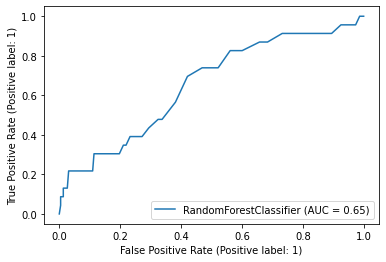

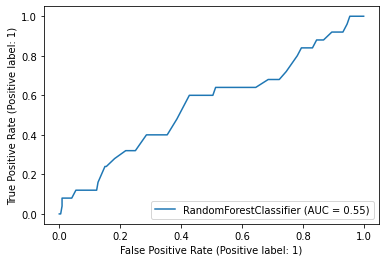

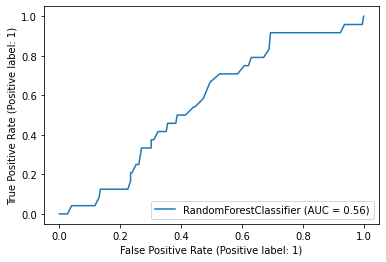

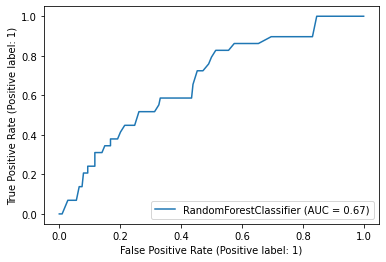

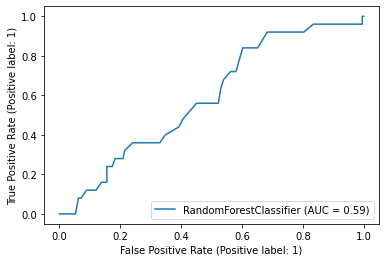

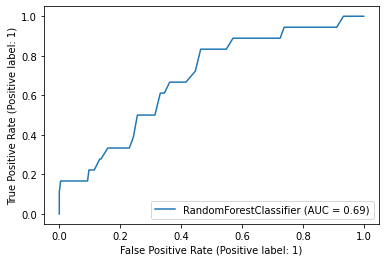

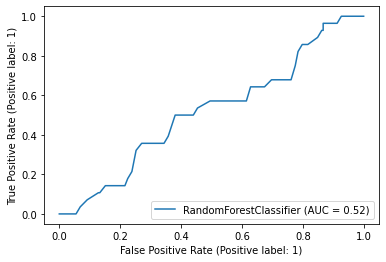

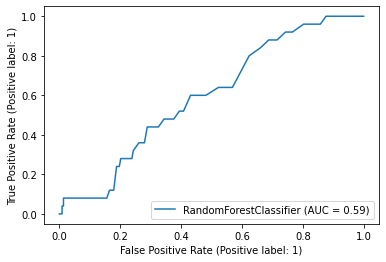

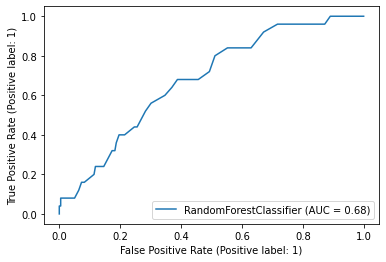

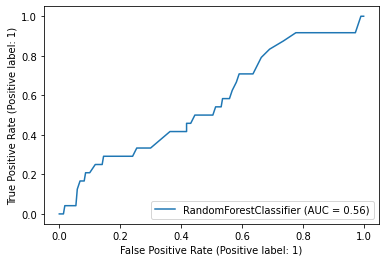

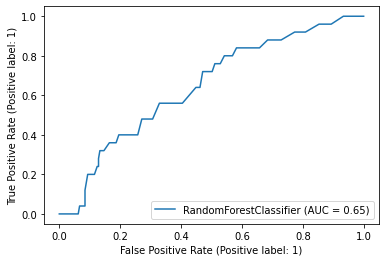

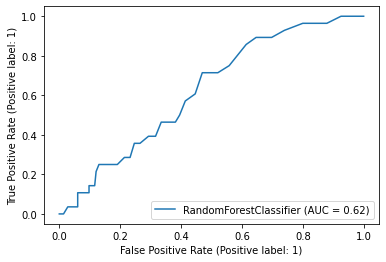

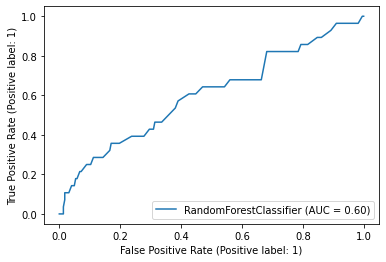

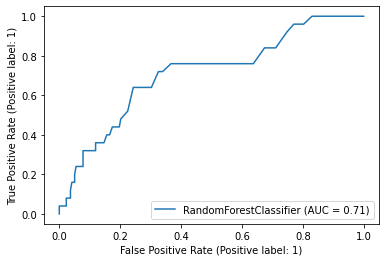

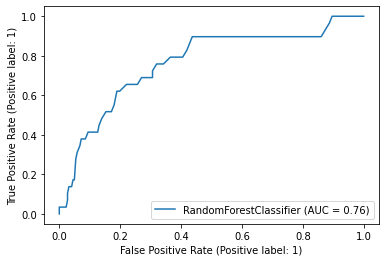

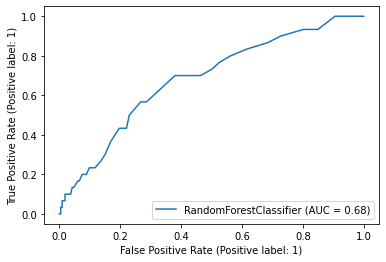

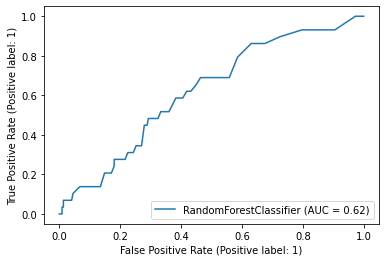

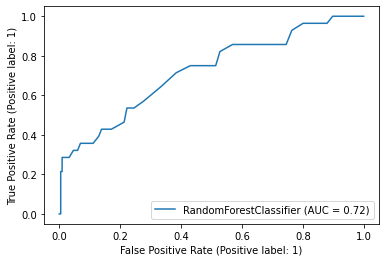

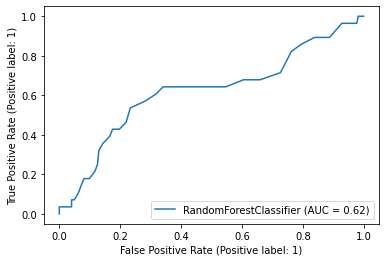

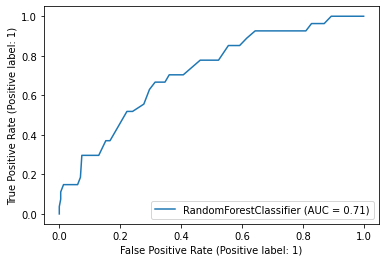

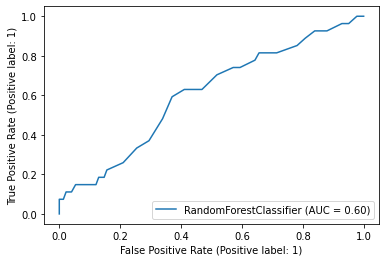

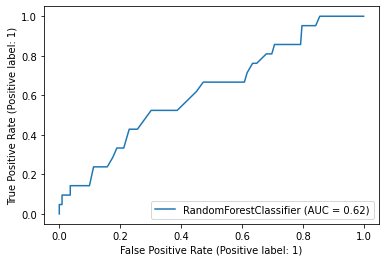

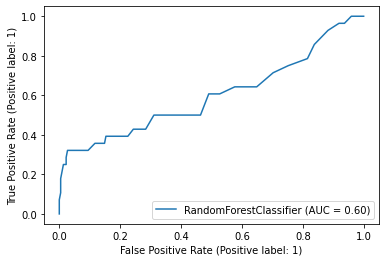

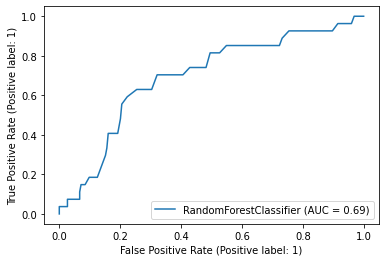

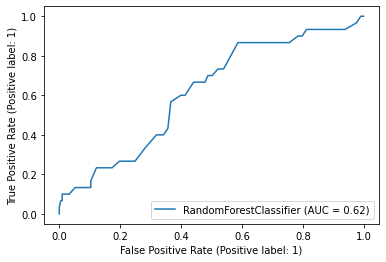

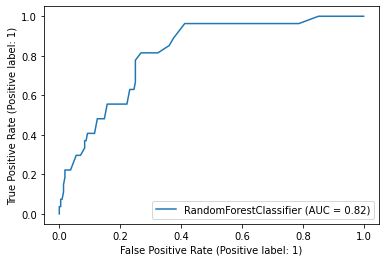

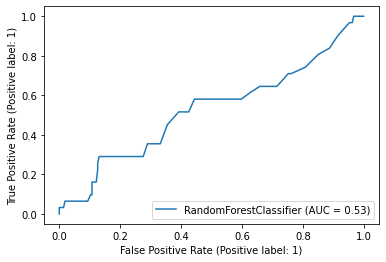

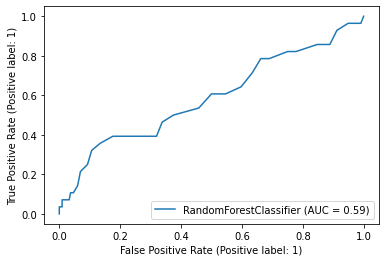

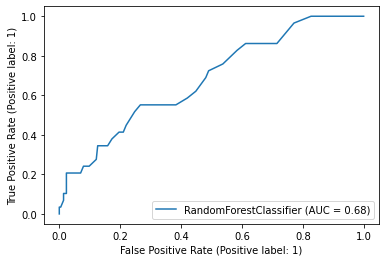

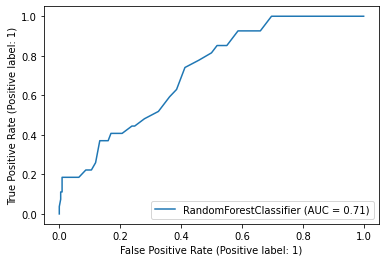

In [ ]:
for i in range(len(X_train_all)):
    X_train = X_train_all[i]
    y_train = y_train_all[i]
    X_test = X_test_all[i]
    y_test = y_test_all[i]
    model_rf = RandomForestClassifier() 
    tic = time.time()
    model_rf.fit(X_train, y_train) 
    toc = time.time()
    print("Random Forest Train time = " + str(toc-tic))
    print("Random Forest Accuracy = "+ str(model_rf.score(X_test, y_test)))
    tic = time.time()
    yhat_probs = model_rf.predict(X_test)
    yhat_classes = (model_rf.predict(X_test) > 0.5).astype("int32")
    toc = time.time()
    print("Random Forest Test time = " + str(toc-tic))
    print(yhat_probs.shape)
    print(yhat_classes.shape)

    print("___________________Random Forest Stats _____________________")

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat_classes)
    print('Accuracy: %f' % accuracy)

    Accuracies.append(accuracy)

    # confusion matrix
    CM = confusion_matrix(y_test, yhat_classes)
    print(CM)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    print('True negatives: %d' % TN)
    print('True positives: %d' % TP)
    print('False positives: %d' % FP)
    print('False negatives: %d' % FN)

    TPs.append(TP)
    FPs.append(FP)
    TNs.append(TN)
    FNs.append(FN)

    # ROC AUC
    auc = roc_auc_score(y_test, yhat_probs)
    print('ROC AUC: %f' % auc)

    ROC_AUCs.append(auc)

    #F1 score
    F1 = (2*TP / (2*TP + FP + FN))
    print('F1 Score: %f' % F1)

    F1s.append(F1)

    # precision tp / (tp + fp)
    precision = TP / (TP + FP)
    print('Precision: %f' % precision)

    Precisions.append(precision)

    # TPR
    tpr = (TP)/(TP + FN)
    print('TPR: %f' % tpr)

    TPRs.append(tpr)

    #FPR
    fpr = (FP)/(FP + TN)
    print('FPR: %f' % fpr)

    FPRs.append(fpr)

    #AUC
    from sklearn.metrics import plot_roc_curve
    plot_roc_curve(model_rf, X_test, y_test)

    print("____________________________________________________________")
    print("____________________________________________________________")

#### Results

230


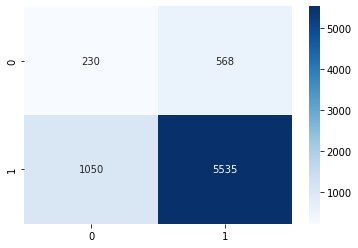

In [ ]:
import seaborn as sns

TPsum = np.sum(TPs)
TNsum = np.sum(TNs)
FPsum = np.sum(FPs)
FNsum = np.sum(FNs)

print(TPsum)

cm_data = [[TPsum, FNsum], [FPsum, TNsum]]
sns.heatmap(cm_data, annot=True, cmap='Blues', fmt='d')

In [ ]:
data = []

for i in range(len(Accuracies)):
  data.append([users[i], Accuracies[i], ROC_AUCs[i], F1s[i], Precisions[i], TPRs[i], FPRs[i], TPs[i], TNs[i], FPs[i], FNs[i]])

In [ ]:
print(len(data[0]))

11


In [ ]:
RFWithoutSMOTE = pd.DataFrame(data, columns=['User Left Out', 'Accuracy', 'ROC_AUC', 'F1', 'Precision', 'TPR', 'FPR', 'TP', 'TN', 'FP', 'FN'])

In [ ]:
df_temp = pd.DataFrame([RFWithoutSMOTE.mean(axis=0).values],  columns=['User Left Out', 'Accuracy', 'ROC_AUC', 'F1', 'Precision', 'TPR', 'FPR', 'TP', 'TN', 'FP', 'FN'], index=['Average'])

In [ ]:
print(df_temp)

         User Left Out  Accuracy   ROC_AUC        F1  Precision       TPR  \
Average           15.5   0.78067  0.567268  0.201737   0.267634  0.293718   

              FPR        TP     TN    FP         FN  
Average  0.159182  7.666667  184.5  35.0  18.933333  


In [ ]:
RFWithoutSMOTE = RFWithoutSMOTE.append(df_temp)

In [ ]:
print(RFWithoutSMOTE)
RFWithoutSMOTE.to_csv('/content/drive/MyDrive/Surjya Sir Work/RupturesResults/RFWithSMOTE.csv', index = True)

         User Left Out  Accuracy   ROC_AUC        F1  Precision       TPR  \
0                  1.0  0.836653  0.558257  0.196078   0.178571  0.217391   
1                  2.0  0.763265  0.549091  0.194444   0.148936  0.280000   
2                  3.0  0.634146  0.537162  0.181818   0.116279  0.416667   
3                  4.0  0.650206  0.622543  0.285714   0.188889  0.586207   
4                  5.0  0.775100  0.501875  0.125000   0.102564  0.160000   
5                  6.0  0.606557  0.634218  0.200000   0.117647  0.666667   
6                  7.0  0.276423  0.529489  0.212389   0.121212  0.857143   
7                  8.0  0.724280  0.527615  0.172840   0.125000  0.280000   
8                  9.0  0.868852  0.519452  0.111111   0.181818  0.080000   
9                 10.0  0.799180  0.554545  0.196721   0.162162  0.250000   
10                11.0  0.812000  0.575556  0.229508   0.194444  0.280000   
11                12.0  0.864198  0.503904  0.057143   0.142857  0.035714   

###Descision Tree

####Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
Accuracies = []
ROC_AUCs = []
F1s = []
Precisions = []
TPRs = []
FPRs = []


TPs = []
FPs = []
TNs = []
FNs = []

Decision Tree Train time = 0.2853238582611084
Decision Tree Accuracy = 0.545816733067729
Decision Tree Test time = 0.0053675174713134766
(251,)
(251,)
___________________Decision Tree Stats _____________________
Accuracy: 0.545817
[[124 104]
 [ 10  13]]
True negatives: 124
True positives: 13
False positives: 104
False negatives: 10
ROC AUC: 0.554539
F1 Score: 0.185714
Precision: 0.111111
TPR: 0.565217
FPR: 0.456140
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.2984647750854492
Decision Tree Accuracy = 0.6
Decision Tree Test time = 0.0037794113159179688
(245,)
(245,)
___________________Decision Tree Stats _____________________
Accuracy: 0.600000
[[140  80]
 [ 18   7]]
True negatives: 140
True positives: 7
False positives: 80
False negatives: 18
ROC AUC: 0.458182
F1 Score: 0.125000
Precision: 0.080460
TPR: 0.280000
FPR: 0.363636
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.2828373908996582
Decision Tree Accuracy = 0.6463414634146342
Decision Tree Test time = 0.004644632339477539
(246,)
(246,)
___________________Decision Tree Stats _____________________
Accuracy: 0.646341
[[148  74]
 [ 13  11]]
True negatives: 148
True positives: 11
False positives: 74
False negatives: 13
ROC AUC: 0.562500
F1 Score: 0.201835
Precision: 0.129412
TPR: 0.458333
FPR: 0.333333
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.27437853813171387
Decision Tree Accuracy = 0.5555555555555556
Decision Tree Test time = 0.0065882205963134766
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.555556
[[121  93]
 [ 15  14]]
True negatives: 121
True positives: 14
False positives: 93
False negatives: 15
ROC AUC: 0.524090
F1 Score: 0.205882
Precision: 0.130841
TPR: 0.482759
FPR: 0.434579
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.2756781578063965
Decision Tree Accuracy = 0.5823293172690763
Decision Tree Test time = 0.00394439697265625
(249,)
(249,)
___________________Decision Tree Stats _____________________
Accuracy: 0.582329
[[128  96]
 [  8  17]]
True negatives: 128
True positives: 17
False positives: 96
False negatives: 8
ROC AUC: 0.625714
F1 Score: 0.246377
Precision: 0.150442
TPR: 0.680000
FPR: 0.428571
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.28646159172058105
Decision Tree Accuracy = 0.5860655737704918
Decision Tree Test time = 0.0037734508514404297
(244,)
(244,)
___________________Decision Tree Stats _____________________
Accuracy: 0.586066
[[131  95]
 [  6  12]]
True negatives: 131
True positives: 12
False positives: 95
False negatives: 6
ROC AUC: 0.623156
F1 Score: 0.192000
Precision: 0.112150
TPR: 0.666667
FPR: 0.420354
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.2816038131713867
Decision Tree Accuracy = 0.34552845528455284
Decision Tree Test time = 0.003864765167236328
(246,)
(246,)
___________________Decision Tree Stats _____________________
Accuracy: 0.345528
[[ 63 155]
 [  6  22]]
True negatives: 63
True positives: 22
False positives: 155
False negatives: 6
ROC AUC: 0.537353
F1 Score: 0.214634
Precision: 0.124294
TPR: 0.785714
FPR: 0.711009
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.28610754013061523
Decision Tree Accuracy = 0.6831275720164609
Decision Tree Test time = 0.004258155822753906
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.683128
[[157  61]
 [ 16   9]]
True negatives: 157
True positives: 9
False positives: 61
False negatives: 16
ROC AUC: 0.540092
F1 Score: 0.189474
Precision: 0.128571
TPR: 0.360000
FPR: 0.279817
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.29883456230163574
Decision Tree Accuracy = 0.6762295081967213
Decision Tree Test time = 0.004019498825073242
(244,)
(244,)
___________________Decision Tree Stats _____________________
Accuracy: 0.676230
[[161  58]
 [ 21   4]]
True negatives: 161
True positives: 4
False positives: 58
False negatives: 21
ROC AUC: 0.447580
F1 Score: 0.091954
Precision: 0.064516
TPR: 0.160000
FPR: 0.264840
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.2836480140686035
Decision Tree Accuracy = 0.7581967213114754
Decision Tree Test time = 0.002936840057373047
(244,)
(244,)
___________________Decision Tree Stats _____________________
Accuracy: 0.758197
[[181  39]
 [ 20   4]]
True negatives: 181
True positives: 4
False positives: 39
False negatives: 20
ROC AUC: 0.494697
F1 Score: 0.119403
Precision: 0.093023
TPR: 0.166667
FPR: 0.177273
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.2770531177520752
Decision Tree Accuracy = 0.676
Decision Tree Test time = 0.0038797855377197266
(250,)
(250,)
___________________Decision Tree Stats _____________________
Accuracy: 0.676000
[[158  67]
 [ 14  11]]
True negatives: 158
True positives: 11
False positives: 67
False negatives: 14
ROC AUC: 0.571111
F1 Score: 0.213592
Precision: 0.141026
TPR: 0.440000
FPR: 0.297778
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.27822375297546387
Decision Tree Accuracy = 0.7818930041152263
Decision Tree Test time = 0.003930330276489258
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.781893
[[184  31]
 [ 22   6]]
True negatives: 184
True positives: 6
False positives: 31
False negatives: 22
ROC AUC: 0.535050
F1 Score: 0.184615
Precision: 0.162162
TPR: 0.214286
FPR: 0.144186
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.29735612869262695
Decision Tree Accuracy = 0.6772908366533864
Decision Tree Test time = 0.004019498825073242
(251,)
(251,)
___________________Decision Tree Stats _____________________
Accuracy: 0.677291
[[159  64]
 [ 17  11]]
True negatives: 159
True positives: 11
False positives: 64
False negatives: 17
ROC AUC: 0.552931
F1 Score: 0.213592
Precision: 0.146667
TPR: 0.392857
FPR: 0.286996
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.28949952125549316
Decision Tree Accuracy = 0.7325102880658436
Decision Tree Test time = 0.0028150081634521484
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.732510
[[171  47]
 [ 18   7]]
True negatives: 171
True positives: 7
False positives: 47
False negatives: 18
ROC AUC: 0.532202
F1 Score: 0.177215
Precision: 0.129630
TPR: 0.280000
FPR: 0.215596
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.2985970973968506
Decision Tree Accuracy = 0.7171314741035857
Decision Tree Test time = 0.0037441253662109375
(251,)
(251,)
___________________Decision Tree Stats _____________________
Accuracy: 0.717131
[[161  61]
 [ 10  19]]
True negatives: 161
True positives: 19
False positives: 61
False negatives: 10
ROC AUC: 0.690199
F1 Score: 0.348624
Precision: 0.237500
TPR: 0.655172
FPR: 0.274775
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.2870349884033203
Decision Tree Accuracy = 0.8065843621399177
Decision Tree Test time = 0.00397491455078125
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.806584
[[193  20]
 [ 27   3]]
True negatives: 193
True positives: 3
False positives: 20
False negatives: 27
ROC AUC: 0.503052
F1 Score: 0.113208
Precision: 0.130435
TPR: 0.100000
FPR: 0.093897
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.28780245780944824
Decision Tree Accuracy = 0.7091633466135459
Decision Tree Test time = 0.003721475601196289
(251,)
(251,)
___________________Decision Tree Stats _____________________
Accuracy: 0.709163
[[166  56]
 [ 17  12]]
True negatives: 166
True positives: 12
False positives: 56
False negatives: 17
ROC AUC: 0.580770
F1 Score: 0.247423
Precision: 0.176471
TPR: 0.413793
FPR: 0.252252
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.2827279567718506
Decision Tree Accuracy = 0.75
Decision Tree Test time = 0.0029571056365966797
(244,)
(244,)
___________________Decision Tree Stats _____________________
Accuracy: 0.750000
[[177  39]
 [ 22   6]]
True negatives: 177
True positives: 6
False positives: 39
False negatives: 22
ROC AUC: 0.516865
F1 Score: 0.164384
Precision: 0.133333
TPR: 0.214286
FPR: 0.180556
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.2627224922180176
Decision Tree Accuracy = 0.7569721115537849
Decision Tree Test time = 0.0035543441772460938
(251,)
(251,)
___________________Decision Tree Stats _____________________
Accuracy: 0.756972
[[181  42]
 [ 19   9]]
True negatives: 181
True positives: 9
False positives: 42
False negatives: 19
ROC AUC: 0.566544
F1 Score: 0.227848
Precision: 0.176471
TPR: 0.321429
FPR: 0.188341
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.2827486991882324
Decision Tree Accuracy = 0.588477366255144
Decision Tree Test time = 0.0038509368896484375
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.588477
[[128  88]
 [ 12  15]]
True negatives: 128
True positives: 15
False positives: 88
False negatives: 12
ROC AUC: 0.574074
F1 Score: 0.230769
Precision: 0.145631
TPR: 0.555556
FPR: 0.407407
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Decision Tree Train time = 0.29691529273986816
Decision Tree Accuracy = 0.7051792828685259
Decision Tree Test time = 0.004688262939453125
(251,)
(251,)
___________________Decision Tree Stats _____________________
Accuracy: 0.705179
[[163  61]
 [ 13  14]]
True negatives: 163
True positives: 14
False positives: 61
False negatives: 13
ROC AUC: 0.623099
F1 Score: 0.274510
Precision: 0.186667
TPR: 0.518519
FPR: 0.272321
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Decision Tree Train time = 0.3031625747680664
Decision Tree Accuracy = 0.6049382716049383
Decision Tree Test time = 0.003770589828491211
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.604938
[[137  85]
 [ 11  10]]
True negatives: 137
True positives: 10
False positives: 85
False negatives: 11
ROC AUC: 0.546654
F1 Score: 0.172414
Precision: 0.105263
TPR: 0.476190
FPR: 0.382883
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Decision Tree Train time = 0.3118777275085449
Decision Tree Accuracy = 0.74
Decision Tree Test time = 0.003734588623046875
(250,)
(250,)
___________________Decision Tree Stats _____________________
Accuracy: 0.740000
[[177  45]
 [ 20   8]]
True negatives: 177
True positives: 8
False positives: 45
False negatives: 20
ROC AUC: 0.541506
F1 Score: 0.197531
Precision: 0.150943
TPR: 0.285714
FPR: 0.202703
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Decision Tree Train time = 0.28022170066833496
Decision Tree Accuracy = 0.7250996015936255
Decision Tree Test time = 0.0036797523498535156
(251,)
(251,)
___________________Decision Tree Stats _____________________
Accuracy: 0.725100
[[172  52]
 [ 17  10]]
True negatives: 172
True positives: 10
False positives: 52
False negatives: 17
ROC AUC: 0.569114
F1 Score: 0.224719
Precision: 0.161290
TPR: 0.370370
FPR: 0.232143
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Decision Tree Train time = 0.30133056640625
Decision Tree Accuracy = 0.691358024691358
Decision Tree Test time = 0.00551152229309082
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.691358
[[157  56]
 [ 19  11]]
True negatives: 157
True positives: 11
False positives: 56
False negatives: 19
ROC AUC: 0.551878
F1 Score: 0.226804
Precision: 0.164179
TPR: 0.366667
FPR: 0.262911
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Decision Tree Train time = 0.27847862243652344
Decision Tree Accuracy = 0.7818930041152263
Decision Tree Test time = 0.0038602352142333984
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.781893
[[180  36]
 [ 17  10]]
True negatives: 180
True positives: 10
False positives: 36
False negatives: 17
ROC AUC: 0.601852
F1 Score: 0.273973
Precision: 0.217391
TPR: 0.370370
FPR: 0.166667
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Decision Tree Train time = 0.28107261657714844
Decision Tree Accuracy = 0.6571428571428571
Decision Tree Test time = 0.0051898956298828125
(245,)
(245,)
___________________Decision Tree Stats _____________________
Accuracy: 0.657143
[[153  61]
 [ 23   8]]
True negatives: 153
True positives: 8
False positives: 61
False negatives: 23
ROC AUC: 0.486509
F1 Score: 0.160000
Precision: 0.115942
TPR: 0.258065
FPR: 0.285047
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Decision Tree Train time = 0.2771120071411133
Decision Tree Accuracy = 0.8032786885245902
Decision Tree Test time = 0.003933906555175781
(244,)
(244,)
___________________Decision Tree Stats _____________________
Accuracy: 0.803279
[[193  23]
 [ 25   3]]
True negatives: 193
True positives: 3
False positives: 23
False negatives: 25
ROC AUC: 0.500331
F1 Score: 0.111111
Precision: 0.115385
TPR: 0.107143
FPR: 0.106481
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Decision Tree Train time = 0.2837207317352295
Decision Tree Accuracy = 0.7654320987654321
Decision Tree Test time = 0.002875804901123047
(243,)
(243,)
___________________Decision Tree Stats _____________________
Accuracy: 0.765432
[[178  36]
 [ 21   8]]
True negatives: 178
True positives: 8
False positives: 36
False negatives: 21
ROC AUC: 0.553819
F1 Score: 0.219178
Precision: 0.181818
TPR: 0.275862
FPR: 0.168224
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Decision Tree Train time = 0.2930111885070801
Decision Tree Accuracy = 0.6775510204081633
Decision Tree Test time = 0.004377841949462891
(245,)
(245,)
___________________Decision Tree Stats _____________________
Accuracy: 0.677551
[[152  66]
 [ 13  14]]
True negatives: 152
True positives: 14
False positives: 66
False negatives: 13
ROC AUC: 0.607883
F1 Score: 0.261682
Precision: 0.175000
TPR: 0.518519
FPR: 0.302752


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


____________________________________________________________
____________________________________________________________


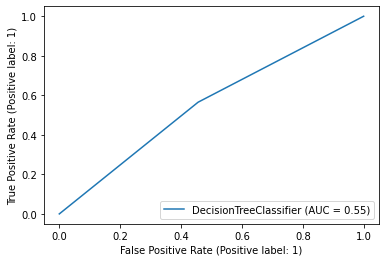

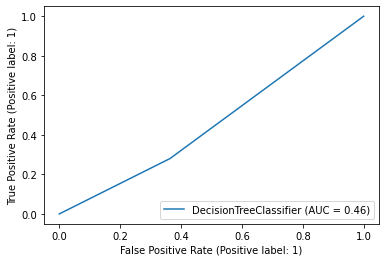

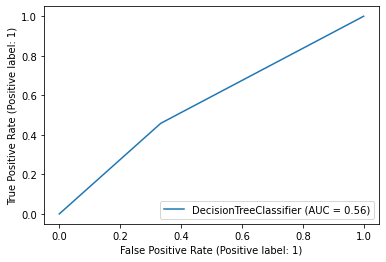

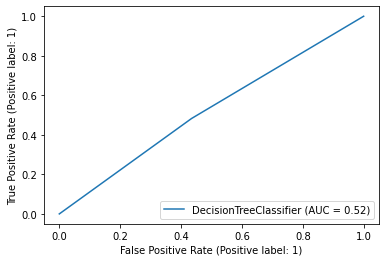

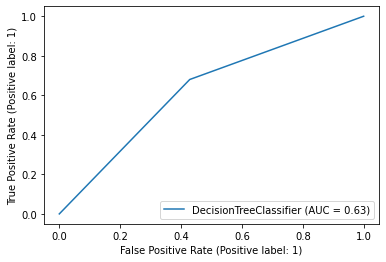

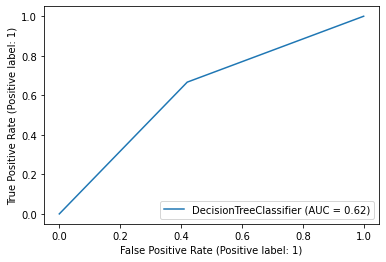

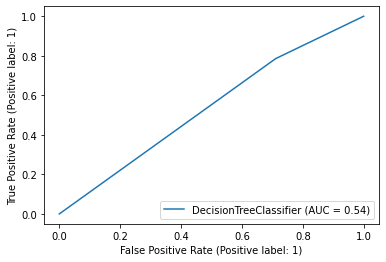

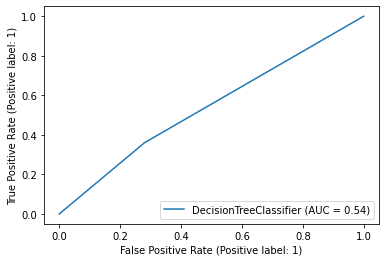

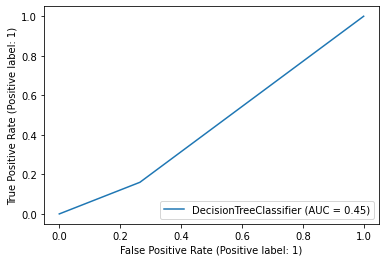

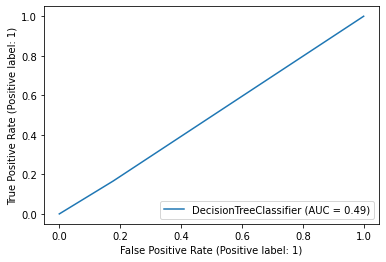

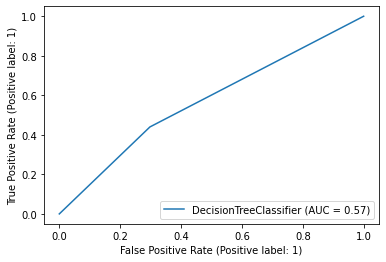

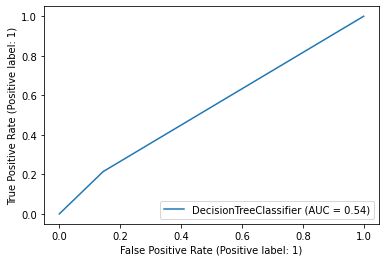

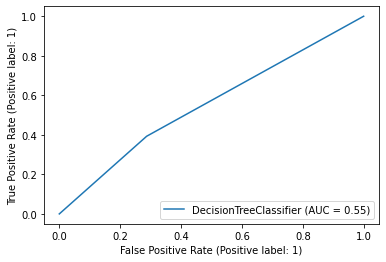

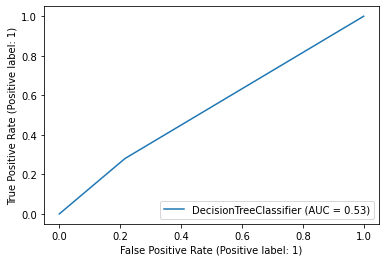

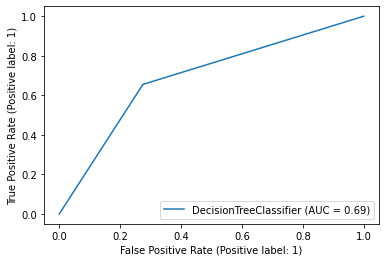

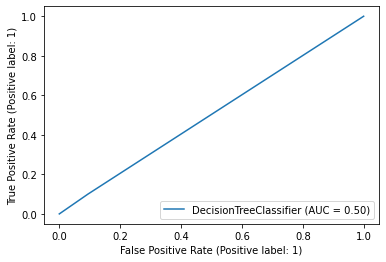

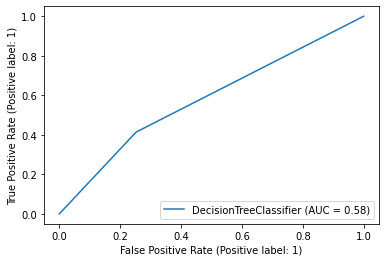

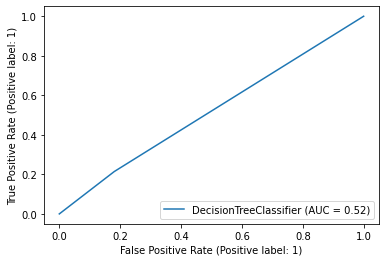

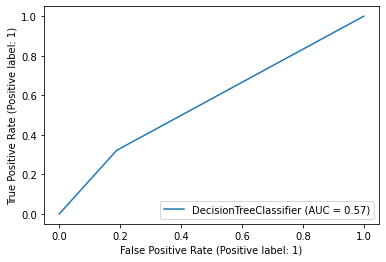

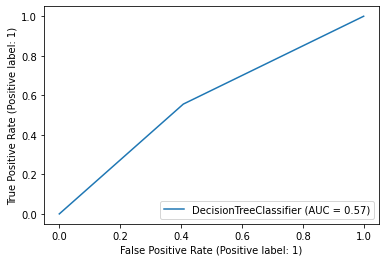

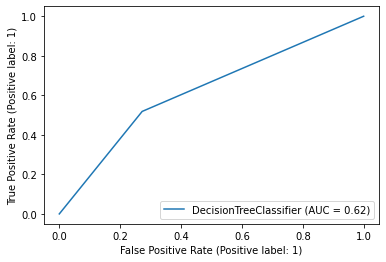

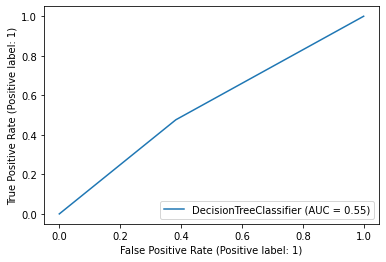

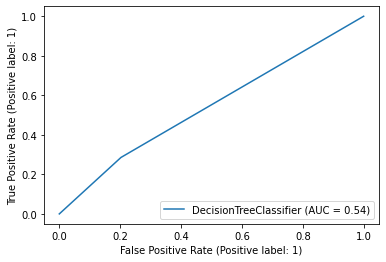

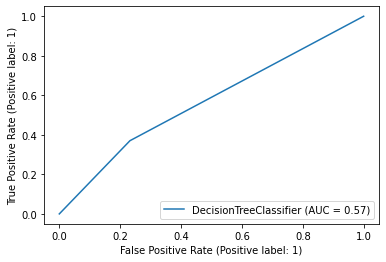

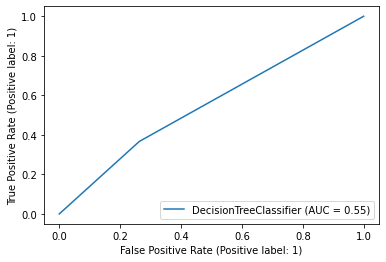

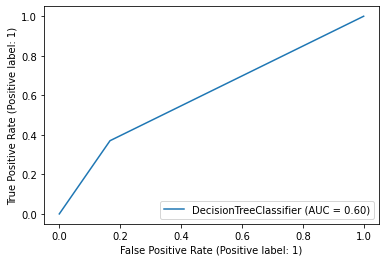

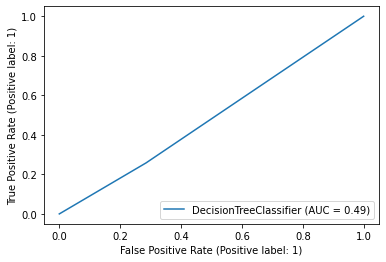

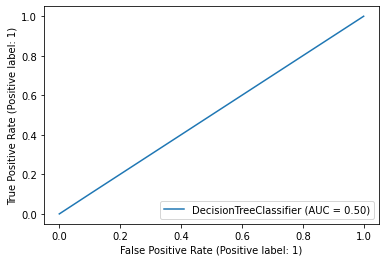

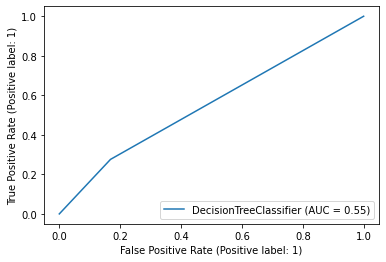

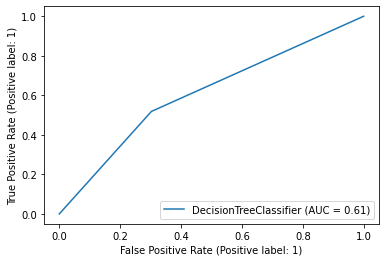

In [ ]:
for i in range(len(X_train_all)):
    X_train = X_train_all[i]
    y_train = y_train_all[i]
    X_test = X_test_all[i]
    y_test = y_test_all[i]
    model_dt = DecisionTreeClassifier()
    tic = time.time()
    model_dt.fit(X_train, y_train) 
    toc = time.time()
    print("Decision Tree Train time = " + str(toc-tic))
    print("Decision Tree Accuracy = "+ str(model_dt.score(X_test, y_test)))
    tic = time.time()
    yhat_probs = model_dt.predict(X_test)
    yhat_classes = (model_dt.predict(X_test) > 0.5).astype("int32")
    toc = time.time()
    print("Decision Tree Test time = " + str(toc-tic))
    print(yhat_probs.shape)
    print(yhat_classes.shape)

    print("___________________Decision Tree Stats _____________________")

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat_classes)
    print('Accuracy: %f' % accuracy)

    Accuracies.append(accuracy)

    # confusion matrix
    CM = confusion_matrix(y_test, yhat_classes)
    print(CM)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    print('True negatives: %d' % TN)
    print('True positives: %d' % TP)
    print('False positives: %d' % FP)
    print('False negatives: %d' % FN)

    TPs.append(TP)
    FPs.append(FP)
    TNs.append(TN)
    FNs.append(FN)

    # ROC AUC
    auc = roc_auc_score(y_test, yhat_probs)
    print('ROC AUC: %f' % auc)

    ROC_AUCs.append(auc)

    #F1 score
    F1 = (2*TP / (2*TP + FP + FN))
    print('F1 Score: %f' % F1)

    F1s.append(F1)

    # precision tp / (tp + fp)
    precision = TP / (TP + FP)
    print('Precision: %f' % precision)

    Precisions.append(precision)

    # TPR
    tpr = (TP)/(TP + FN)
    print('TPR: %f' % tpr)

    TPRs.append(tpr)

    #FPR
    fpr = (FP)/(FP + TN)
    print('FPR: %f' % fpr)

    FPRs.append(fpr)

    #AUC
    from sklearn.metrics import plot_roc_curve
    plot_roc_curve(model_dt, X_test, y_test)

    print("____________________________________________________________")
    print("____________________________________________________________")

#### Results

In [ ]:
data = []

for i in range(len(Accuracies)):
  data.append([users[i], Accuracies[i], ROC_AUCs[i], F1s[i], Precisions[i], TPRs[i], FPRs[i], TPs[i], TNs[i], FPs[i], FNs[i]])

In [ ]:
print(len(data[0]))

11


In [ ]:
DTWithoutSMOTE = pd.DataFrame(data, columns=['User Left Out', 'Accuracy', 'ROC_AUC', 'F1', 'Precision', 'TPR', 'FPR', 'TP', 'TN', 'FP', 'FN'])

In [ ]:
df_temp = pd.DataFrame([DTWithoutSMOTE.mean(axis=0).values],  columns=['User Left Out', 'Accuracy', 'ROC_AUC', 'F1', 'Precision', 'TPR', 'FPR', 'TP', 'TN', 'FP', 'FN'], index=['Average'])

In [ ]:
print(df_temp)

         User Left Out  Accuracy   ROC_AUC        F1  Precision       TPR  \
Average           15.5   0.67757  0.552445  0.200515   0.142601  0.391338   

              FPR         TP          TN         FP         FN  
Average  0.286449  10.266667  156.466667  63.033333  16.333333  


In [ ]:
DTWithoutSMOTE = DTWithoutSMOTE.append(df_temp)

In [ ]:
print(DTWithoutSMOTE)
DTWithoutSMOTE.to_csv('/content/drive/MyDrive/Surjya Sir Work/RupturesResults/DTWithSMOTE.csv', index = True)

         User Left Out  Accuracy   ROC_AUC        F1  Precision       TPR  \
0                  1.0  0.545817  0.554539  0.185714   0.111111  0.565217   
1                  2.0  0.600000  0.458182  0.125000   0.080460  0.280000   
2                  3.0  0.646341  0.562500  0.201835   0.129412  0.458333   
3                  4.0  0.555556  0.524090  0.205882   0.130841  0.482759   
4                  5.0  0.582329  0.625714  0.246377   0.150442  0.680000   
5                  6.0  0.586066  0.623156  0.192000   0.112150  0.666667   
6                  7.0  0.345528  0.537353  0.214634   0.124294  0.785714   
7                  8.0  0.683128  0.540092  0.189474   0.128571  0.360000   
8                  9.0  0.676230  0.447580  0.091954   0.064516  0.160000   
9                 10.0  0.758197  0.494697  0.119403   0.093023  0.166667   
10                11.0  0.676000  0.571111  0.213592   0.141026  0.440000   
11                12.0  0.781893  0.535050  0.184615   0.162162  0.214286   

###Gradient Boost

####Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
Accuracies = []
ROC_AUCs = []
F1s = []
Precisions = []
TPRs = []
FPRs = []


TPs = []
FPs = []
TNs = []
FNs = []

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.67934465408325
Gradient Boost Accuracy = 0.900398406374502
Gradient Boost Test time = 0.011580705642700195
(251,)
(251,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.900398
[[219   9]
 [ 16   7]]
True negatives: 219
True positives: 7
False positives: 9
False negatives: 16
ROC AUC: 0.632437
F1 Score: 0.358974
Precision: 0.437500
TPR: 0.304348
FPR: 0.039474
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.6049370765686
Gradient Boost Accuracy = 0.3673469387755102
Gradient Boost Test time = 0.010693788528442383
(245,)
(245,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.367347
[[ 74 146]
 [  9  16]]
True negatives: 74
True positives: 16
False positives: 146
False negatives: 9
ROC AUC: 0.488182
F1 Score: 0.171123
Precision: 0.098765
TPR: 0.640000
FPR: 0.663636
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.51523423194885
Gradient Boost Accuracy = 0.532520325203252
Gradient Boost Test time = 0.010250568389892578
(246,)
(246,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.532520
[[119 103]
 [ 12  12]]
True negatives: 119
True positives: 12
False positives: 103
False negatives: 12
ROC AUC: 0.518018
F1 Score: 0.172662
Precision: 0.104348
TPR: 0.500000
FPR: 0.463964
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.57400870323181
Gradient Boost Accuracy = 0.6831275720164609
Gradient Boost Test time = 0.010650634765625
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.683128
[[148  66]
 [ 11  18]]
True negatives: 148
True positives: 18
False positives: 66
False negatives: 11
ROC AUC: 0.656139
F1 Score: 0.318584
Precision: 0.214286
TPR: 0.620690
FPR: 0.308411
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.39624905586243
Gradient Boost Accuracy = 0.8835341365461847
Gradient Boost Test time = 0.010775566101074219
(249,)
(249,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.883534
[[218   6]
 [ 23   2]]
True negatives: 218
True positives: 2
False positives: 6
False negatives: 23
ROC AUC: 0.526607
F1 Score: 0.121212
Precision: 0.250000
TPR: 0.080000
FPR: 0.026786
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.35255432128906
Gradient Boost Accuracy = 0.47950819672131145
Gradient Boost Test time = 0.009795904159545898
(244,)
(244,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.479508
[[102 124]
 [  3  15]]
True negatives: 102
True positives: 15
False positives: 124
False negatives: 3
ROC AUC: 0.642330
F1 Score: 0.191083
Precision: 0.107914
TPR: 0.833333
FPR: 0.548673
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.511669397354126
Gradient Boost Accuracy = 0.23170731707317074
Gradient Boost Test time = 0.010263442993164062
(246,)
(246,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.231707
[[ 33 185]
 [  4  24]]
True negatives: 33
True positives: 24
False positives: 185
False negatives: 4
ROC AUC: 0.504260
F1 Score: 0.202532
Precision: 0.114833
TPR: 0.857143
FPR: 0.848624
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.45468306541443
Gradient Boost Accuracy = 0.6378600823045267
Gradient Boost Test time = 0.010197162628173828
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.637860
[[147  71]
 [ 17   8]]
True negatives: 147
True positives: 8
False positives: 71
False negatives: 17
ROC AUC: 0.497156
F1 Score: 0.153846
Precision: 0.101266
TPR: 0.320000
FPR: 0.325688
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.55997037887573
Gradient Boost Accuracy = 0.9016393442622951
Gradient Boost Test time = 0.010192394256591797
(244,)
(244,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.901639
[[216   3]
 [ 21   4]]
True negatives: 216
True positives: 4
False positives: 3
False negatives: 21
ROC AUC: 0.573151
F1 Score: 0.250000
Precision: 0.571429
TPR: 0.160000
FPR: 0.013699
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.496273040771484
Gradient Boost Accuracy = 0.8647540983606558
Gradient Boost Test time = 0.010876178741455078
(244,)
(244,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.864754
[[208  12]
 [ 21   3]]
True negatives: 208
True positives: 3
False positives: 12
False negatives: 21
ROC AUC: 0.535227
F1 Score: 0.153846
Precision: 0.200000
TPR: 0.125000
FPR: 0.054545
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.51635789871216
Gradient Boost Accuracy = 0.8
Gradient Boost Test time = 0.010066032409667969
(250,)
(250,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.800000
[[191  34]
 [ 16   9]]
True negatives: 191
True positives: 9
False positives: 34
False negatives: 16
ROC AUC: 0.604444
F1 Score: 0.264706
Precision: 0.209302
TPR: 0.360000
FPR: 0.151111
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.59566569328308
Gradient Boost Accuracy = 0.8765432098765432
Gradient Boost Test time = 0.01116800308227539
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.876543
[[213   2]
 [ 28   0]]
True negatives: 213
True positives: 0
False positives: 2
False negatives: 28
ROC AUC: 0.495349
F1 Score: 0.000000
Precision: 0.000000
TPR: 0.000000
FPR: 0.009302
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.70155572891235
Gradient Boost Accuracy = 0.8446215139442231
Gradient Boost Test time = 0.011254310607910156
(251,)
(251,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.844622
[[207  16]
 [ 23   5]]
True negatives: 207
True positives: 5
False positives: 16
False negatives: 23
ROC AUC: 0.553411
F1 Score: 0.204082
Precision: 0.238095
TPR: 0.178571
FPR: 0.071749
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.57445979118347
Gradient Boost Accuracy = 0.8765432098765432
Gradient Boost Test time = 0.011786937713623047
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.876543
[[204  14]
 [ 16   9]]
True negatives: 204
True positives: 9
False positives: 14
False negatives: 16
ROC AUC: 0.647890
F1 Score: 0.375000
Precision: 0.391304
TPR: 0.360000
FPR: 0.064220
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.61327147483826
Gradient Boost Accuracy = 0.8406374501992032
Gradient Boost Test time = 0.010451555252075195
(251,)
(251,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.840637
[[196  26]
 [ 14  15]]
True negatives: 196
True positives: 15
False positives: 26
False negatives: 14
ROC AUC: 0.700062
F1 Score: 0.428571
Precision: 0.365854
TPR: 0.517241
FPR: 0.117117
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.51407027244568
Gradient Boost Accuracy = 0.8765432098765432
Gradient Boost Test time = 0.0098114013671875
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.876543
[[211   2]
 [ 28   2]]
True negatives: 211
True positives: 2
False positives: 2
False negatives: 28
ROC AUC: 0.528638
F1 Score: 0.117647
Precision: 0.500000
TPR: 0.066667
FPR: 0.009390
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.67065119743347
Gradient Boost Accuracy = 0.7450199203187251
Gradient Boost Test time = 0.00955820083618164
(251,)
(251,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.745020
[[176  46]
 [ 18  11]]
True negatives: 176
True positives: 11
False positives: 46
False negatives: 18
ROC AUC: 0.586052
F1 Score: 0.255814
Precision: 0.192982
TPR: 0.379310
FPR: 0.207207
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.52346467971802
Gradient Boost Accuracy = 0.8975409836065574
Gradient Boost Test time = 0.00979161262512207
(244,)
(244,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.897541
[[216   0]
 [ 25   3]]
True negatives: 216
True positives: 3
False positives: 0
False negatives: 25
ROC AUC: 0.553571
F1 Score: 0.193548
Precision: 1.000000
TPR: 0.107143
FPR: 0.000000
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.375335693359375
Gradient Boost Accuracy = 0.8406374501992032
Gradient Boost Test time = 0.009861469268798828
(251,)
(251,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.840637
[[206  17]
 [ 23   5]]
True negatives: 206
True positives: 5
False positives: 17
False negatives: 23
ROC AUC: 0.551169
F1 Score: 0.200000
Precision: 0.227273
TPR: 0.178571
FPR: 0.076233
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.32706093788147
Gradient Boost Accuracy = 0.6625514403292181
Gradient Boost Test time = 0.013631105422973633
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.662551
[[136  80]
 [  2  25]]
True negatives: 136
True positives: 25
False positives: 80
False negatives: 2
ROC AUC: 0.777778
F1 Score: 0.378788
Precision: 0.238095
TPR: 0.925926
FPR: 0.370370
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Train time = 58.3821587562561
Gradient Boost Accuracy = 0.8884462151394422
Gradient Boost Test time = 0.009955644607543945
(251,)
(251,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.888446
[[223   1]
 [ 27   0]]
True negatives: 223
True positives: 0
False positives: 1
False negatives: 27
ROC AUC: 0.497768
F1 Score: 0.000000
Precision: 0.000000
TPR: 0.000000
FPR: 0.004464
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boost Train time = 58.48384475708008
Gradient Boost Accuracy = 0.7119341563786008
Gradient Boost Test time = 0.010292291641235352
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.711934
[[165  57]
 [ 13   8]]
True negatives: 165
True positives: 8
False positives: 57
False negatives: 13
ROC AUC: 0.562098
F1 Score: 0.186047
Precision: 0.123077
TPR: 0.380952
FPR: 0.256757
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boost Train time = 58.478071451187134
Gradient Boost Accuracy = 0.872
Gradient Boost Test time = 0.011261224746704102
(250,)
(250,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.872000
[[210  12]
 [ 20   8]]
True negatives: 210
True positives: 8
False positives: 12
False negatives: 20
ROC AUC: 0.615830
F1 Score: 0.333333
Precision: 0.400000
TPR: 0.285714
FPR: 0.054054
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boost Train time = 58.43410563468933
Gradient Boost Accuracy = 0.7768924302788844
Gradient Boost Test time = 0.010402679443359375
(251,)
(251,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.776892
[[186  38]
 [ 18   9]]
True negatives: 186
True positives: 9
False positives: 38
False negatives: 18
ROC AUC: 0.581845
F1 Score: 0.243243
Precision: 0.191489
TPR: 0.333333
FPR: 0.169643
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boost Train time = 58.48178052902222
Gradient Boost Accuracy = 0.7530864197530864
Gradient Boost Test time = 0.009263992309570312
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.753086
[[176  37]
 [ 23   7]]
True negatives: 176
True positives: 7
False positives: 37
False negatives: 23
ROC AUC: 0.529812
F1 Score: 0.189189
Precision: 0.159091
TPR: 0.233333
FPR: 0.173709
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boost Train time = 58.29892659187317
Gradient Boost Accuracy = 0.9300411522633745
Gradient Boost Test time = 0.010529518127441406
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.930041
[[212   4]
 [ 13  14]]
True negatives: 212
True positives: 14
False positives: 4
False negatives: 13
ROC AUC: 0.750000
F1 Score: 0.622222
Precision: 0.777778
TPR: 0.518519
FPR: 0.018519
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boost Train time = 58.51364016532898
Gradient Boost Accuracy = 0.7836734693877551
Gradient Boost Test time = 0.010423898696899414
(245,)
(245,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.783673
[[185  29]
 [ 24   7]]
True negatives: 185
True positives: 7
False positives: 29
False negatives: 24
ROC AUC: 0.545146
F1 Score: 0.208955
Precision: 0.194444
TPR: 0.225806
FPR: 0.135514
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boost Train time = 58.310667991638184
Gradient Boost Accuracy = 0.8811475409836066
Gradient Boost Test time = 0.010734081268310547
(244,)
(244,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.881148
[[215   1]
 [ 28   0]]
True negatives: 215
True positives: 0
False positives: 1
False negatives: 28
ROC AUC: 0.497685
F1 Score: 0.000000
Precision: 0.000000
TPR: 0.000000
FPR: 0.004630
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boost Train time = 58.37864398956299
Gradient Boost Accuracy = 0.8847736625514403
Gradient Boost Test time = 0.01074671745300293
(243,)
(243,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.884774
[[209   5]
 [ 23   6]]
True negatives: 209
True positives: 6
False positives: 5
False negatives: 23
ROC AUC: 0.591766
F1 Score: 0.300000
Precision: 0.545455
TPR: 0.206897
FPR: 0.023364
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boost Train time = 58.15055513381958
Gradient Boost Accuracy = 0.7387755102040816
Gradient Boost Test time = 0.010931253433227539
(245,)
(245,)
___________________Gradient Boost Stats _____________________
Accuracy: 0.738776
[[170  48]
 [ 16  11]]
True negatives: 170
True positives: 11
False positives: 48
False negatives: 16
ROC AUC: 0.593612
F1 Score: 0.255814
Precision: 0.186441
TPR: 0.407407
FPR: 0.220183
____________________________________________________________
____________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


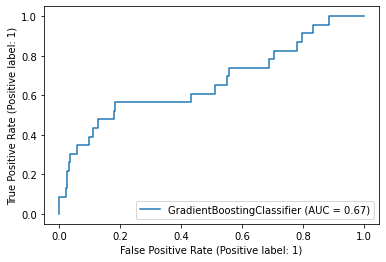

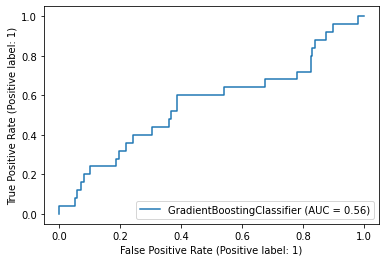

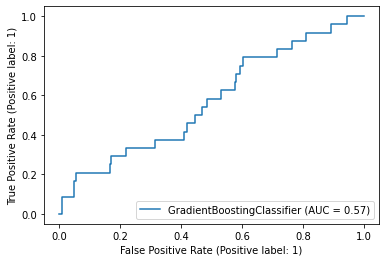

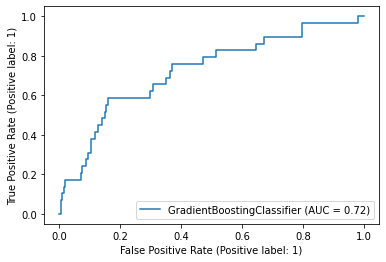

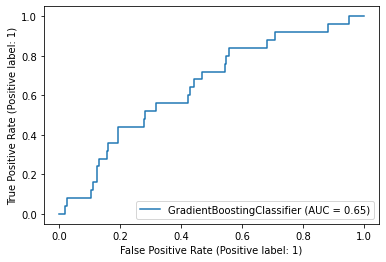

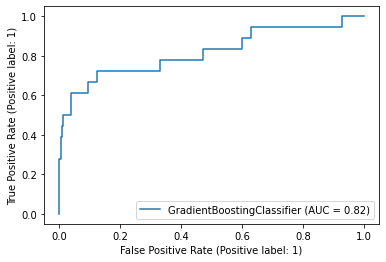

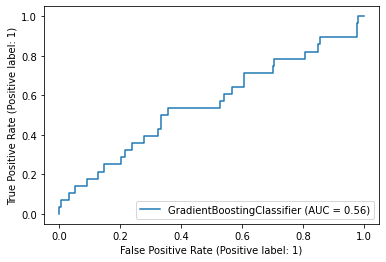

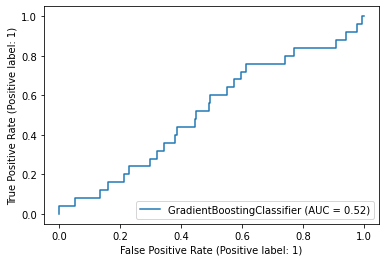

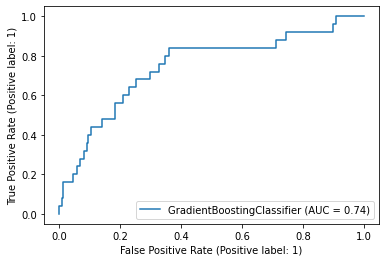

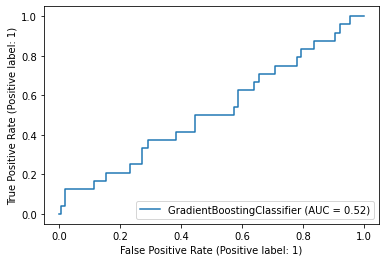

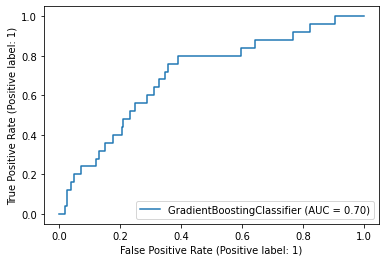

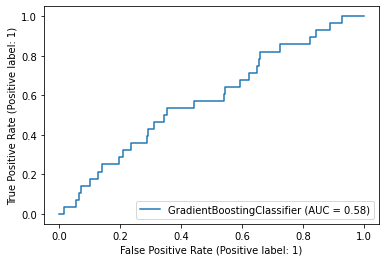

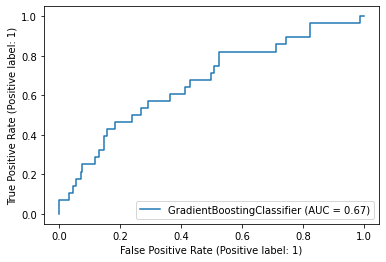

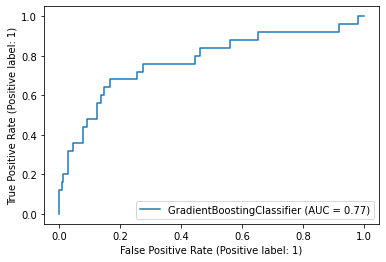

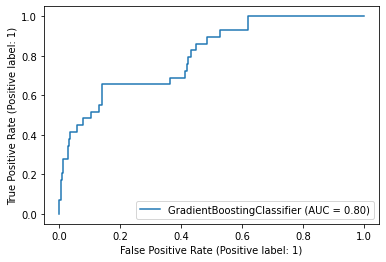

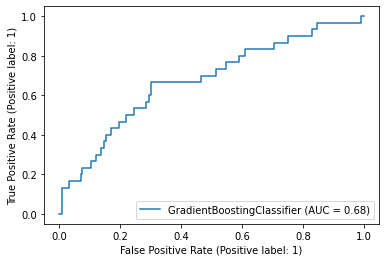

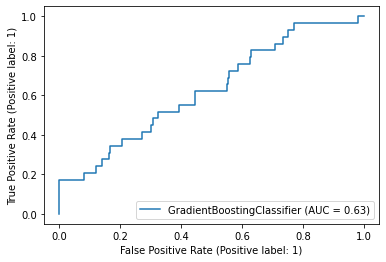

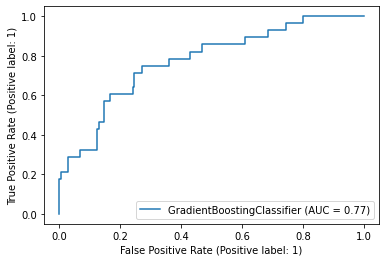

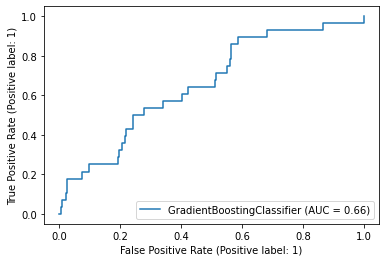

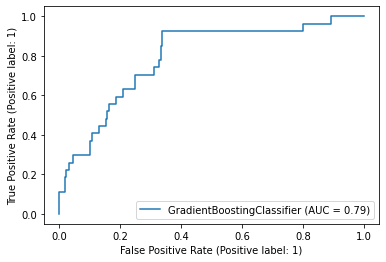

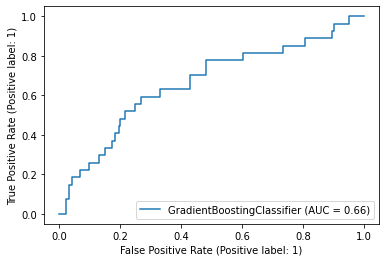

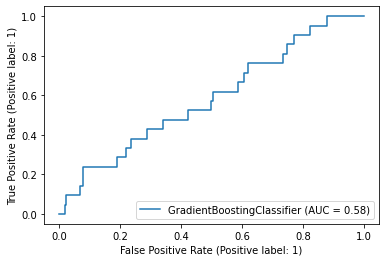

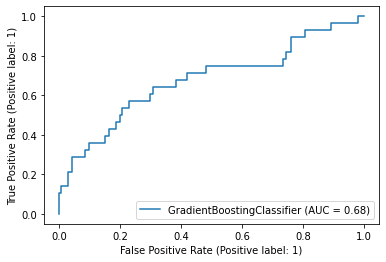

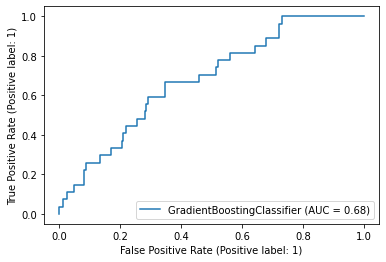

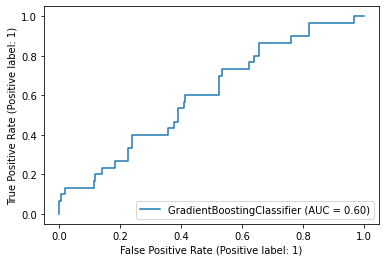

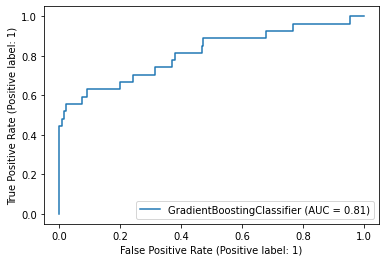

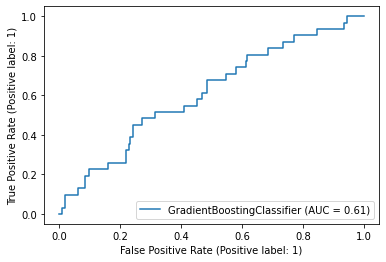

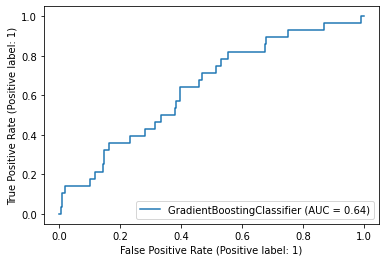

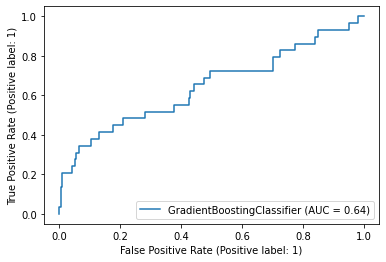

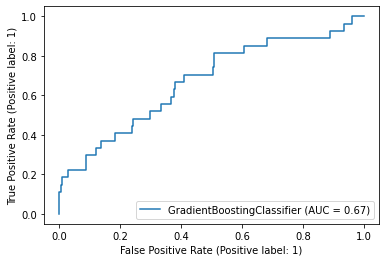

In [ ]:
for i in range(len(X_train_all)):
    X_train = X_train_all[i]
    y_train = y_train_all[i]
    X_test = X_test_all[i]
    y_test = y_test_all[i]
    model_gb = GradientBoostingClassifier(n_estimators = 1000) 
    tic = time.time()
    model_gb.fit(X_train, y_train) 
    toc = time.time()
    print("Gradient Boost Train time = " + str(toc-tic))
    print("Gradient Boost Accuracy = "+ str(model_gb.score(X_test, y_test)))
    tic = time.time()
    yhat_probs = model_gb.predict(X_test)
    yhat_classes = (model_gb.predict(X_test) > 0.5).astype("int32")
    toc = time.time()
    print("Gradient Boost Test time = " + str(toc-tic))
    print(yhat_probs.shape)
    print(yhat_classes.shape)

    print("___________________Gradient Boost Stats _____________________")

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat_classes)
    print('Accuracy: %f' % accuracy)

    Accuracies.append(accuracy)

    # confusion matrix
    CM = confusion_matrix(y_test, yhat_classes)
    print(CM)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    print('True negatives: %d' % TN)
    print('True positives: %d' % TP)
    print('False positives: %d' % FP)
    print('False negatives: %d' % FN)

    TPs.append(TP)
    FPs.append(FP)
    TNs.append(TN)
    FNs.append(FN)
    # ROC AUC
    auc = roc_auc_score(y_test, yhat_probs)
    print('ROC AUC: %f' % auc)

    ROC_AUCs.append(auc)

    #F1 score
    F1 = (2*TP / (2*TP + FP + FN))
    print('F1 Score: %f' % F1)

    F1s.append(F1)

    # precision tp / (tp + fp)
    precision = TP / (TP + FP)
    print('Precision: %f' % precision)

    Precisions.append(precision)

    # TPR
    tpr = (TP)/(TP + FN)
    print('TPR: %f' % tpr)

    TPRs.append(tpr)

    #FPR
    fpr = (FP)/(FP + TN)
    print('FPR: %f' % fpr)

    FPRs.append(fpr)

    #AUC
    from sklearn.metrics import plot_roc_curve
    plot_roc_curve(model_gb, X_test, y_test)

    print("____________________________________________________________")
    print("____________________________________________________________")

#### Results

In [ ]:
data = []

for i in range(len(Accuracies)):
  data.append([users[i], Accuracies[i], ROC_AUCs[i], F1s[i], Precisions[i], TPRs[i], FPRs[i], TPs[i], TNs[i], FPs[i], FNs[i]])

In [ ]:
print(len(data[0]))

11


In [ ]:
GBWithoutSMOTE = pd.DataFrame(data, columns=['User Left Out', 'Accuracy', 'ROC_AUC', 'F1', 'Precision', 'TPR', 'FPR', 'TP', 'TN', 'FP', 'FN'])

In [ ]:
df_temp = pd.DataFrame([GBWithoutSMOTE.mean(axis=0).values],  columns=['User Left Out', 'Accuracy', 'ROC_AUC', 'F1', 'Precision', 'TPR', 'FPR', 'TP', 'TN', 'FP', 'FN'], index=['Average'])

In [ ]:
print(df_temp)

         User Left Out  Accuracy   ROC_AUC        F1  Precision       TPR  \
Average           15.5   0.76546  0.577914  0.228361   0.271367  0.336864   

              FPR        TP     TN    FP         FN  
Average  0.181035  8.766667  179.7  39.8  17.833333  


In [ ]:
GBWithoutSMOTE = GBWithoutSMOTE.append(df_temp)

In [ ]:
print(GBWithoutSMOTE)
GBWithoutSMOTE.to_csv('/content/drive/MyDrive/Surjya Sir Work/RupturesResults/GBWithSMOTE.csv', index = True)

         User Left Out  Accuracy   ROC_AUC        F1  Precision       TPR  \
0                  1.0  0.900398  0.632437  0.358974   0.437500  0.304348   
1                  2.0  0.367347  0.488182  0.171123   0.098765  0.640000   
2                  3.0  0.532520  0.518018  0.172662   0.104348  0.500000   
3                  4.0  0.683128  0.656139  0.318584   0.214286  0.620690   
4                  5.0  0.883534  0.526607  0.121212   0.250000  0.080000   
5                  6.0  0.479508  0.642330  0.191083   0.107914  0.833333   
6                  7.0  0.231707  0.504260  0.202532   0.114833  0.857143   
7                  8.0  0.637860  0.497156  0.153846   0.101266  0.320000   
8                  9.0  0.901639  0.573151  0.250000   0.571429  0.160000   
9                 10.0  0.864754  0.535227  0.153846   0.200000  0.125000   
10                11.0  0.800000  0.604444  0.264706   0.209302  0.360000   
11                12.0  0.876543  0.495349  0.000000   0.000000  0.000000   

###3 DNN

#### Model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
Accuracies = []
ROC_AUCs = []
F1s = []
Precisions = []
TPRs = []
FPRs = []


TPs = []
FPs = []
TNs = []
FNs = []

In [ ]:
print(X_train.shape[1])

16


Epoch 1/100
179/179 [==============================] - 1s 3ms/step - loss: 1.2096 - accuracy: 0.5453 - val_loss: 0.7167 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/100
179/179 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.5566 - val_loss: 0.7489 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/100
179/179 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5547 - val_loss: 0.7745 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/100
179/179 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5559 - val_loss: 0.7899 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/100
179/179 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5554 - val_loss: 0.7971 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 6/100
179/179 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5551 - val_loss: 0.8028 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 7/100
179/179 [===================

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


179/179 [==============================] - 2s 6ms/step - loss: 1.1970 - accuracy: 0.5356 - val_loss: 0.7032 - val_accuracy: 0.0652 - lr: 0.0010
Epoch 2/100
179/179 [==============================] - 1s 4ms/step - loss: 0.7174 - accuracy: 0.5645 - val_loss: 0.7089 - val_accuracy: 0.0338 - lr: 0.0010
Epoch 3/100
179/179 [==============================] - 1s 5ms/step - loss: 0.7017 - accuracy: 0.5696 - val_loss: 0.7442 - val_accuracy: 0.0259 - lr: 0.0010
Epoch 4/100
179/179 [==============================] - 1s 4ms/step - loss: 0.6904 - accuracy: 0.5718 - val_loss: 0.7645 - val_accuracy: 0.0361 - lr: 0.0010
Epoch 5/100
179/179 [==============================] - 1s 4ms/step - loss: 0.6869 - accuracy: 0.5736 - val_loss: 0.7804 - val_accuracy: 0.0393 - lr: 0.0010
Epoch 6/100
179/179 [==============================] - 1s 3ms/step - loss: 0.6823 - accuracy: 0.5769 - val_loss: 0.7800 - val_accuracy: 0.0731 - lr: 0.0010
Epoch 7/100
179/179 [==============================] - 1s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


179/179 [==============================] - 2s 6ms/step - loss: 1.3358 - accuracy: 0.5292 - val_loss: 0.7285 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/100
179/179 [==============================] - 1s 3ms/step - loss: 0.7038 - accuracy: 0.5552 - val_loss: 0.7501 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/100
179/179 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5538 - val_loss: 0.7664 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/100
179/179 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.5548 - val_loss: 0.7812 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/100
179/179 [==============================] - 1s 3ms/step - loss: 0.6885 - accuracy: 0.5560 - val_loss: 0.7921 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 6/100
179/179 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5546 - val_loss: 0.7972 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 7/100
179/179 [==============================]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


179/179 [==============================] - 1s 3ms/step - loss: 1.0020 - accuracy: 0.4855 - val_loss: 0.6971 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/100
179/179 [==============================] - 1s 3ms/step - loss: 0.7054 - accuracy: 0.5560 - val_loss: 0.7317 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/100
179/179 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5545 - val_loss: 0.7649 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/100
179/179 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5553 - val_loss: 0.7705 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/100
179/179 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5559 - val_loss: 0.7893 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 6/100
179/179 [==============================] - 1s 3ms/step - loss: 0.6890 - accuracy: 0.5549 - val_loss: 0.7857 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 7/100
179/179 [==============================]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


180/180 [==============================] - 1s 4ms/step - loss: 1.0838 - accuracy: 0.5160 - val_loss: 0.7198 - val_accuracy: 0.0439 - lr: 0.0010
Epoch 2/100
180/180 [==============================] - 1s 3ms/step - loss: 0.7011 - accuracy: 0.5572 - val_loss: 0.7564 - val_accuracy: 0.0173 - lr: 0.0010
Epoch 3/100
180/180 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5580 - val_loss: 0.7838 - val_accuracy: 0.0141 - lr: 0.0010
Epoch 4/100
180/180 [==============================] - 1s 3ms/step - loss: 0.6887 - accuracy: 0.5612 - val_loss: 0.7973 - val_accuracy: 0.0345 - lr: 0.0010
Epoch 5/100
180/180 [==============================] - 1s 3ms/step - loss: 0.6858 - accuracy: 0.5667 - val_loss: 0.7994 - val_accuracy: 0.0643 - lr: 0.0010
Epoch 6/100
180/180 [==============================] - 1s 3ms/step - loss: 0.6876 - accuracy: 0.5652 - val_loss: 0.8149 - val_accuracy: 0.0369 - lr: 0.0010
Epoch 7/100
180/180 [==============================] - 0s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


180/180 [==============================] - 1s 4ms/step - loss: 1.4117 - accuracy: 0.5068 - val_loss: 0.6578 - val_accuracy: 0.6122 - lr: 0.0010
Epoch 2/100
180/180 [==============================] - 1s 3ms/step - loss: 0.7502 - accuracy: 0.5338 - val_loss: 0.7315 - val_accuracy: 0.0793 - lr: 0.0010
Epoch 3/100
180/180 [==============================] - 1s 3ms/step - loss: 0.7112 - accuracy: 0.5485 - val_loss: 0.7655 - val_accuracy: 0.0024 - lr: 0.0010
Epoch 4/100
180/180 [==============================] - 1s 3ms/step - loss: 0.7047 - accuracy: 0.5519 - val_loss: 0.7826 - val_accuracy: 0.0024 - lr: 0.0010
Epoch 5/100
180/180 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.5584 - val_loss: 0.7970 - val_accuracy: 7.8493e-04 - lr: 0.0010
Epoch 6/100
180/180 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5596 - val_loss: 0.8125 - val_accuracy: 0.0024 - lr: 0.0010
Epoch 7/100
180/180 [==============================] - 0s 3ms/step - los

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


180/180 [==============================] - 1s 3ms/step - loss: 0.8912 - accuracy: 0.4887 - val_loss: 0.6946 - val_accuracy: 0.0431 - lr: 0.0010
Epoch 2/100
180/180 [==============================] - 1s 3ms/step - loss: 0.7030 - accuracy: 0.5516 - val_loss: 0.7263 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/100
180/180 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5548 - val_loss: 0.7536 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/100
180/180 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5546 - val_loss: 0.7762 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/100
180/180 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5559 - val_loss: 0.7891 - val_accuracy: 0.0024 - lr: 0.0010
Epoch 6/100
180/180 [==============================] - 1s 3ms/step - loss: 0.6858 - accuracy: 0.5581 - val_loss: 0.7933 - val_accuracy: 0.0290 - lr: 0.0010
Epoch 7/100
180/180 [==============================] - 0s 3ms/st

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


180/180 [==============================] - 1s 3ms/step - loss: 2.4803 - accuracy: 0.5095 - val_loss: 0.7487 - val_accuracy: 0.0228 - lr: 0.0010
Epoch 2/100
180/180 [==============================] - 1s 3ms/step - loss: 0.7356 - accuracy: 0.5358 - val_loss: 0.7532 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/100
180/180 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.5533 - val_loss: 0.7756 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/100
180/180 [==============================] - 1s 3ms/step - loss: 0.6936 - accuracy: 0.5557 - val_loss: 0.7914 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/100
180/180 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5556 - val_loss: 0.8022 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 6/100
180/180 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5509 - val_loss: 0.8068 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 7/100
180/180 [==============================] - 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


180/180 [==============================] - 1s 4ms/step - loss: 1.0381 - accuracy: 0.5288 - val_loss: 0.7242 - val_accuracy: 0.0157 - lr: 0.0010
Epoch 2/100
180/180 [==============================] - 1s 3ms/step - loss: 0.7133 - accuracy: 0.5552 - val_loss: 0.7514 - val_accuracy: 0.0149 - lr: 0.0010
Epoch 3/100
180/180 [==============================] - 1s 3ms/step - loss: 0.6964 - accuracy: 0.5552 - val_loss: 0.7714 - val_accuracy: 0.0094 - lr: 0.0010
Epoch 4/100
180/180 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.5557 - val_loss: 0.7916 - val_accuracy: 0.0055 - lr: 0.0010
Epoch 5/100
180/180 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5574 - val_loss: 0.8007 - val_accuracy: 0.0024 - lr: 0.0010
Epoch 6/100
180/180 [==============================] - 1s 3ms/step - loss: 0.6875 - accuracy: 0.5566 - val_loss: 0.8046 - val_accuracy: 0.0031 - lr: 0.0010
Epoch 7/100
180/180 [==============================] - 1s 3ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


180/180 [==============================] - 1s 4ms/step - loss: 0.8030 - accuracy: 0.5272 - val_loss: 0.7114 - val_accuracy: 0.0094 - lr: 0.0010
Epoch 2/100
180/180 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.5541 - val_loss: 0.7684 - val_accuracy: 0.0024 - lr: 0.0010
Epoch 3/100
180/180 [==============================] - 1s 3ms/step - loss: 0.6914 - accuracy: 0.5571 - val_loss: 0.7823 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/100
180/180 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5571 - val_loss: 0.8007 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/100
180/180 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5591 - val_loss: 0.7948 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 6/100
180/180 [==============================] - 1s 3ms/step - loss: 0.6880 - accuracy: 0.5573 - val_loss: 0.7880 - val_accuracy: 0.0063 - lr: 0.0010
Epoch 7/100
180/180 [==============================] - 1s 3ms/st

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


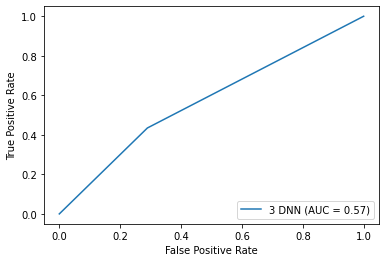

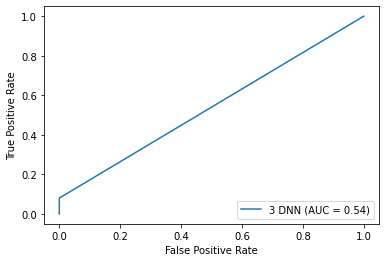

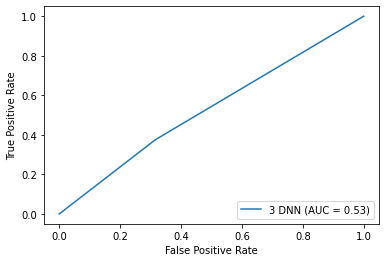

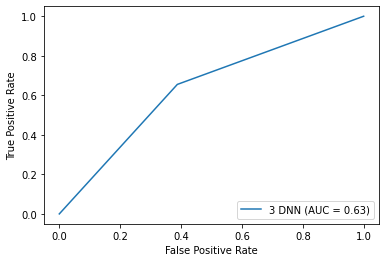

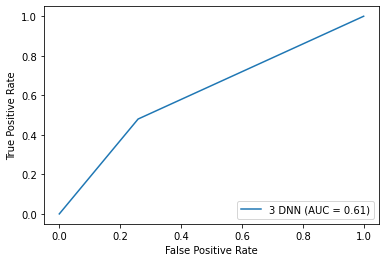

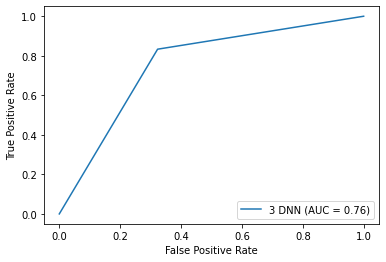

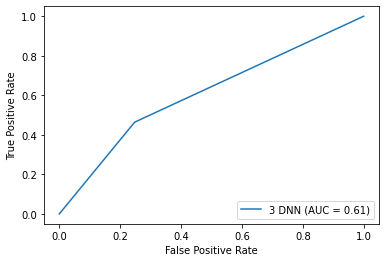

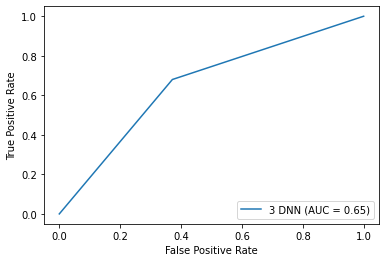

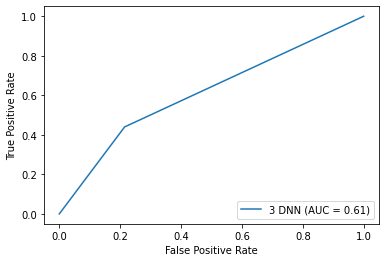

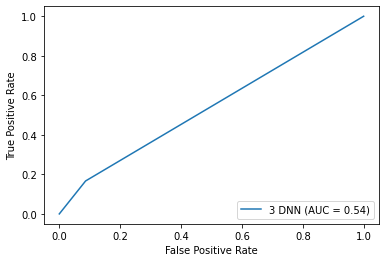

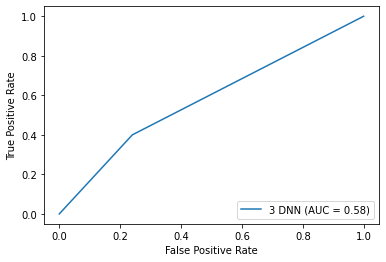

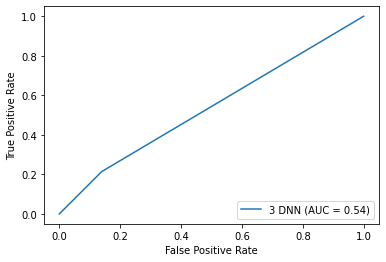

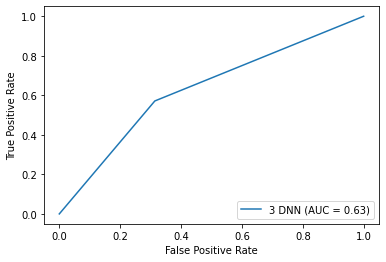

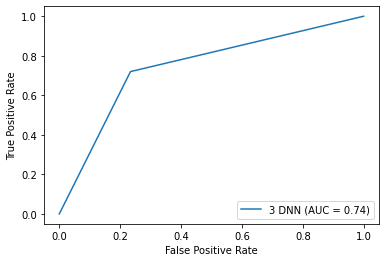

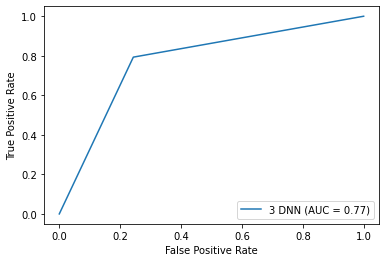

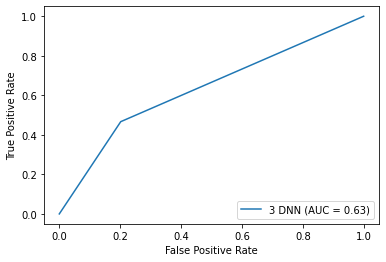

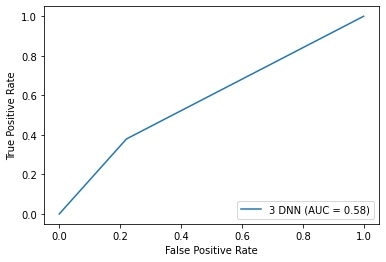

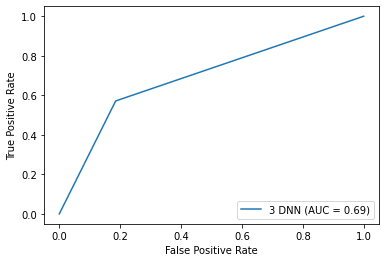

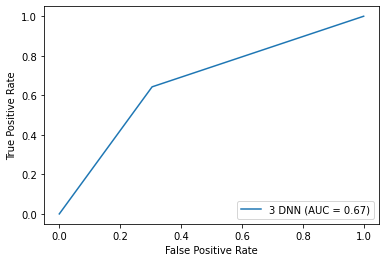

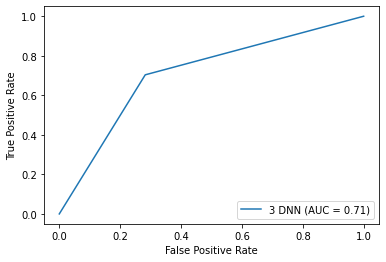

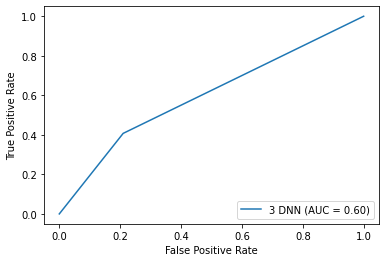

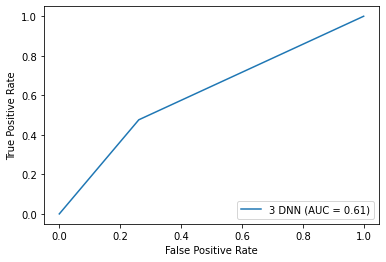

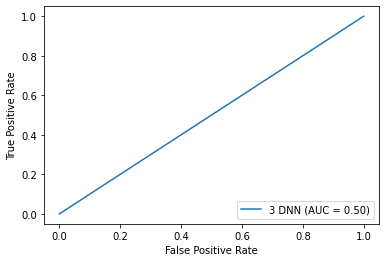

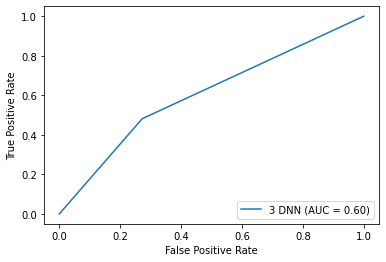

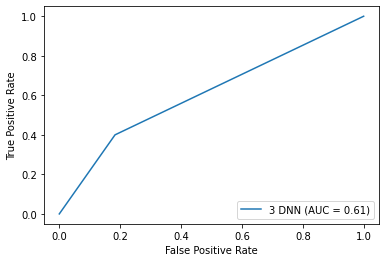

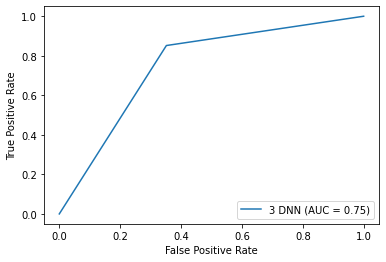

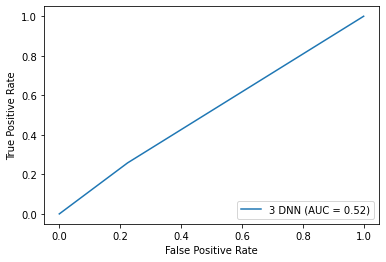

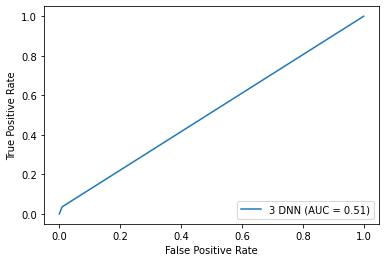

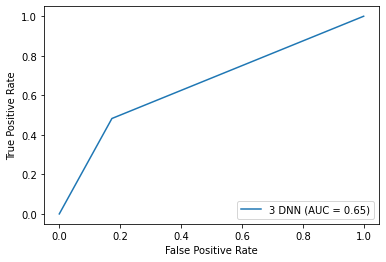

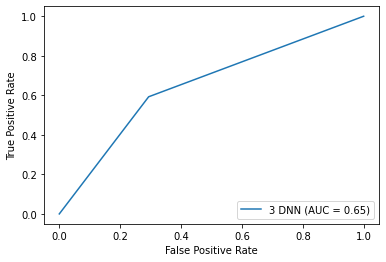

In [ ]:
for i in range(len(X_train_all)):
    X_train = X_train_all[i]
    y_train = y_train_all[i]
    X_test = X_test_all[i]
    y_test = y_test_all[i]
    X_train = np.asarray(X_train).astype('float32')
    y_train = np.asarray(y_train).astype('float32')
    X_test = np.asarray(X_test).astype('float32')
    y_test = np.asarray(y_test).astype('float32')
    model3 = Sequential()

    model3.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model3.add(Dropout(0.3))
    model3.add(Dense(32, activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(8, activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(1, activation='sigmoid'))

    model3.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)
    tic = time.time()
    model3.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.1, callbacks=[reduce_lr])
    toc = time.time()
    print("3 DNN Train time = " + str(toc-tic))
    print("3 DNN Accuracy = "+ str(model3.evaluate(X_test, y_test, verbose=0)[1]))
    tic = time.time()
    yhat_probs = model3.predict(X_test, verbose=0)
    yhat_classes = (model3.predict(X_test) > 0.5).astype("int32")
    toc = time.time()
    print("3 DNN Test time = " + str(toc-tic))
    yhat_probs = yhat_probs[:, 0]
    yhat_classes = yhat_classes[:, 0]
    print(yhat_probs.shape)
    print(yhat_classes.shape)

    print("___________________3 DNN Stats _____________________")

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat_classes)
    print('Accuracy: %f' % accuracy)

    Accuracies.append(accuracy)

    # confusion matrix
    CM = confusion_matrix(y_test, yhat_classes)
    print(CM)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    print('True negatives: %d' % TN)
    print('True positives: %d' % TP)
    print('False positives: %d' % FP)
    print('False negatives: %d' % FN)


    TPs.append(TP)
    FPs.append(FP)
    TNs.append(TN)
    FNs.append(FN)

    # ROC AUC
    auc = roc_auc_score(y_test, yhat_probs)
    print('ROC AUC: %f' % auc)

    ROC_AUCs.append(auc)

    #F1 score
    F1 = (2*TP / (2*TP + FP + FN))
    print('F1 Score: %f' % F1)

    F1s.append(F1)

    # precision tp / (tp + fp)
    precision = TP / (TP + FP)
    print('Precision: %f' % precision)

    Precisions.append(precision)

    # TPR
    tpr = (TP)/(TP + FN)
    print('TPR: %f' % tpr)

    TPRs.append(tpr)

    #FPR
    fpr = (FP)/(FP + TN)
    print('FPR: %f' % fpr)

    FPRs.append(fpr)

    #AUC
    from sklearn import metrics
    fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat_classes)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='3 DNN')
    display.plot()  

    print("____________________________________________________________")
    print("____________________________________________________________")

#### Results

In [ ]:
data = []

for i in range(len(Accuracies)):
  data.append([users[i], Accuracies[i], ROC_AUCs[i], F1s[i], Precisions[i], TPRs[i], FPRs[i], TPs[i], TNs[i], FPs[i], FNs[i]])

In [ ]:
print(len(data[0]))

11


In [ ]:
DNN3WithoutSMOTE = pd.DataFrame(data, columns=['User Left Out', 'Accuracy', 'ROC_AUC', 'F1', 'Precision', 'TPR', 'FPR', 'TP', 'TN', 'FP', 'FN'])

In [ ]:
df_temp = pd.DataFrame([DNN3WithoutSMOTE.mean(axis=0).values],  columns=['User Left Out', 'Accuracy', 'ROC_AUC', 'F1', 'Precision', 'TPR', 'FPR', 'TP', 'TN', 'FP', 'FN'], index=['Average'])

In [ ]:
print(df_temp)

         User Left Out  Accuracy   ROC_AUC        F1  Precision       TPR  \
Average           15.5  0.738656  0.688697  0.258888   0.229843  0.468603   

              FPR         TP     TN    FP         FN  
Average  0.227965  12.366667  169.4  50.1  14.233333  


In [ ]:
DNN3WithoutSMOTE = DNN3WithoutSMOTE.append(df_temp)

In [ ]:
print(DNN3WithoutSMOTE)
DNN3WithoutSMOTE.to_csv('/content/drive/MyDrive/Surjya Sir Work/RupturesResults/DNN3WithSMOTE.csv', index = True)

         User Left Out  Accuracy   ROC_AUC        F1  Precision       TPR  \
0                  1.0  0.685259  0.541190  0.202020   0.131579  0.434783   
1                  2.0  0.906122  0.565455  0.148148   1.000000  0.080000   
2                  3.0  0.654472  0.594782  0.174757   0.113924  0.375000   
3                  4.0  0.617284  0.753464  0.290076   0.186275  0.655172   
4                  5.0  0.714859  0.655536  0.252632   0.171429  0.480000   
5                  6.0  0.688525  0.855703  0.283019   0.170455  0.833333   
6                  7.0  0.719512  0.628768  0.273684   0.194030  0.464286   
7                  8.0  0.633745  0.700183  0.276423   0.173469  0.680000   
8                  9.0  0.750000  0.705114  0.265060   0.189655  0.440000   
9                 10.0  0.840164  0.590530  0.170213   0.173913  0.166667   
10                11.0  0.724000  0.695822  0.224719   0.156250  0.400000   
11                12.0  0.786008  0.618937  0.187500   0.166667  0.214286   